# **Project 2: Ames Iowa Housing Sale Price Prediction**

## Problem Statement

As a seller, wouldn't it be ideal to know how much your property would fetch? What about knowing how else you could increase the value of your property? As a buyer, wouldn't it be insightful to know which characteristics to look out for in a property when you wish to buy it as an investment?  

The Ames, Iowa, Housing dataset has a wide range of information collected from 2006 to 2010 by the Ames Assessor's Office, which was used to assess the value of residential properties sold in Ames. It contains 80 specific characteristics describing the basement, garage, above ground area, the lot, the surroundings and the roof, including the quality, condition and the materials used.

Based on the above dataset, a predictive model will be created based on regression - using Lasso, Ridge, Linear or ElasticNet regression - to determine which characteristics would affect the sale price the most. Through exploratory data analysis (EDA), this notebook will explore the relationship between the different variables and the sales price. Variables which have the highest positive correlation and highest negative correlation will be used to build and train the predictive model. The type of regression to use will also be determined by comparing at least 3 regression metrics and through cross validation score. After a model is selected, the largest positive and negative coefficients will identify the characteristics which influence sale price the most. 

It will then conclude with recommendations which sellers could consider to increase the value of their home. Similarly, buyers can also look into the characteristics which will allow them to buy at a lower value and sell it at a higher value in future.



---
## Executive Summary

During the EDA, the relationship between each variable and sale price was examined closely. The dataset collected was rather extensive and was useful to help identify general trends. However, there are also many collinear features which potentially complicates regression. Hence, with domain knowledge on the dataset, certain variables were removed while some were combined. New variables were also created to combine collinear variables to avoid overfitting. There were many null values but all of them could be imputed through either a linear regression or through deduction. The summary of the findings can be found below:

**Findings:**
- The general trend is that the higher the quality and the condition, the higher the sale prices
- The larger the area, the higher the sale prices
- The more unfinished parts, the lower the sale prices
- Certain materials also fetched higher sale prices than others
- Properties which are sold more recently and are newer tend to fetch higher prices

**Model Evaluation and Selection**

Among Linear Regression, Lasso, Ridge and ElasticNet, a cross validation and metric comparison was done. Lasso was identified to be the most suitable based on Root Mean Squared Error (RMSE) and its R2 score. Another considation was that the model should be able to efficiently identify the essential features which affected the sale prices.

**Results**

Sellers can increase the value of their property by improving the quality and conditions of their home through renovation or refurbishing.

Meanwhile, buyers and/or investors should look out for neighbourhoods which has high property prices and perhaps buy cheap properties to resell in the future. 

---

### Contents:
- [Data Dictionary](#Data-Dictionary)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Prep and Feature Engineering](#Data-Preparation-and-Feature-Engineering)
- [Model Preparation and Selection](#Model-Preparation-and-Selection)
- [Model Fitting & Evaluation](#Model-Fitting-and-Evaluation)
- [Implementing to Test Data (Prediction)](#Implementing-to-Test-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**Import Libraries**

In [1]:
#imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Dictionary

A data dictionary has been included with the dataset. [Click here](./Data%20Dictionary.txt) to view the data dictionary.

However, there are also a few engineered features which are highlighted below:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**total_sf**|float|housing & housing_test|Sum of 1st floor, 2nd floor, basement 1 and basement 2 area (units in Square Feet, where 1 means 1 square feet|
|**property_age**|int|housing & housing_test|The age of the property calculated by deducting the year it was built from the year it was sold (units in years, where 20 means 20 years-old|
|**garage_int**|float|housing & housing_test|The interaction among garage features, including the condition, the area and the finishing. (area x condition x finish, where one unit in each variable will be multiplied twice)|


## Data Import & Cleaning

In [2]:
housing = pd.read_csv('datasets/train.csv')

In [3]:
# check if import is done correctly and have a brief look at the data
housing.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
# Look through data types and null object
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
# identify columns which have null values
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

```Id``` and ```PID```

After comparing examining the data dictionary, the columns "Id" and "PID" are just idenfitiers, the numbers do not have a direct correlation to the price. These columns will be dropped.

In [6]:
housing.drop(columns=["Id", "PID"], inplace=True)

```Alley```

There are only 140 non-null answers. It is highly possible that this information was not collected. It is also almost impossible to impute as there seemed to be no other variables which could determine the type of alley access. This is especially when there are no obvious relationship between type of road access and type of alley access shown in the data. (i.e. it is possible that for someone to have different types of material for each access)

In [7]:
housing['Alley'].fillna('NA', inplace = True)

```Lot Frontage```

There are 330 null values, it is possible to do a prediction on these as there are sufficient variables and data to impute it. I have decided to use multilinear regression to predict its value based on 2 independent variables which could influence the lot frontage. They are the lot area size, the lot configuration.

Below, I plotted the graph between lot frontage and area size.

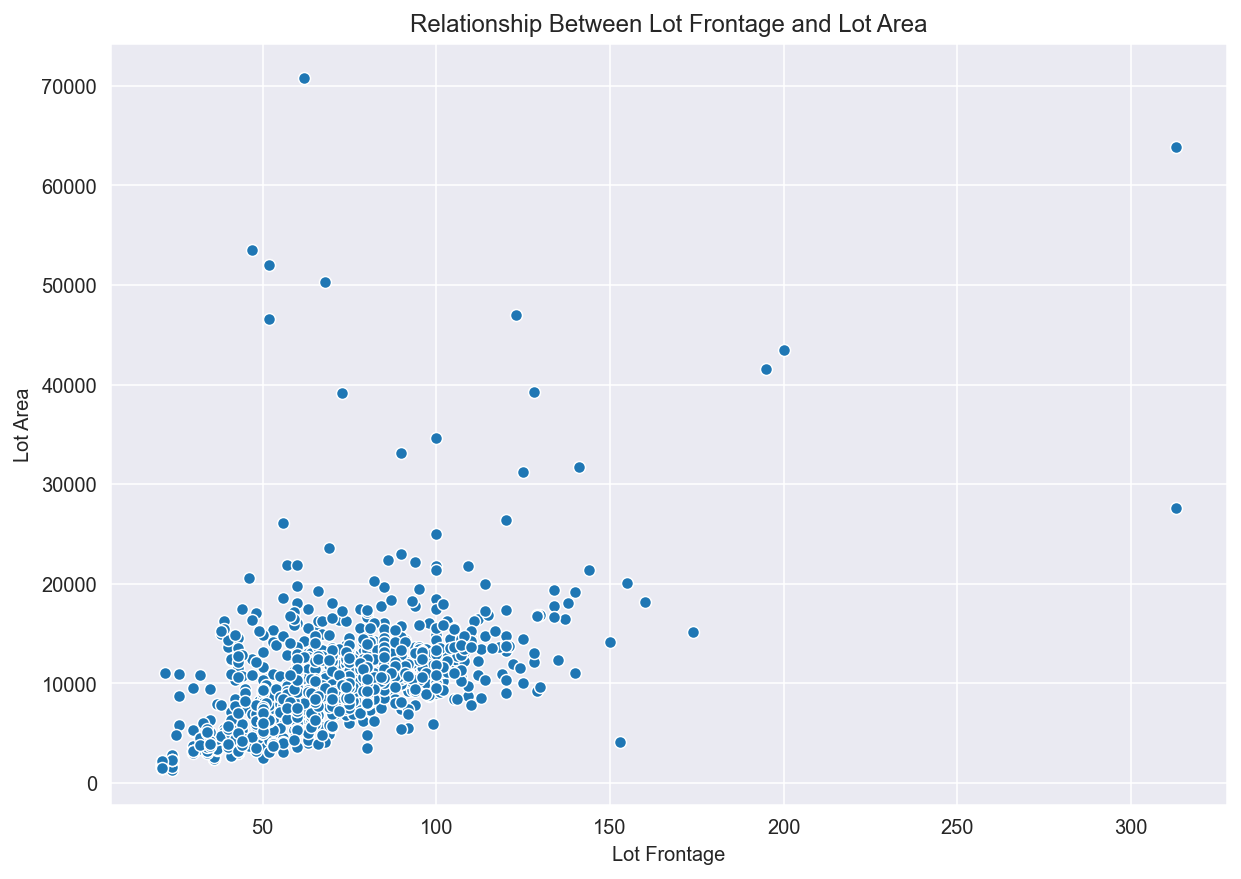

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing['Lot Frontage'], housing['Lot Area'])
plt.title("Relationship Between Lot Frontage and Lot Area");

1) A linear relationship exist between lot area and lot frontage. Some form of linear regression is possible. 

2) The lot configuration matters because people in the "inside" usually have less lot frontage. People with CulDeSac or Corner configuration tend to have more lot frontage.

In [9]:
# set up dataframe for imputing
frontage_df = pd.DataFrame({"Lot Frontage" : housing['Lot Frontage'], "Lot Area" : housing['Lot Area'],
                            'Lot Config' : housing['Lot Config']})

In [10]:
# set up dataframe with all dummy variables. dataframe now contains both null and non-null rows.
frontage_dummy = pd.get_dummies(data= frontage_df, drop_first=True)

In [11]:
# remove null rows, using non-null for building model
frontage_nonull = frontage_dummy.dropna()

In [12]:
# determining features for model creation
X = frontage_nonull.drop(columns='Lot Frontage')
y = frontage_nonull['Lot Frontage']

In [13]:
# run a test-train split to verify efficacy of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [14]:
# train the model 
lr_frontage = LinearRegression()
lr_frontage.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_frontage.score(X_train,y_train)

0.4403290025034211

In [16]:
lr_frontage.score(X_test,y_test)

# the score seems consistent

0.44342786592109995

In [17]:
# preparing the null data to be set as predictor
frontage_null = frontage_dummy[frontage_dummy['Lot Frontage'].isnull()]
X = frontage_null.drop(columns='Lot Frontage')

# predict the lot frontage
y_pred = lr_frontage.predict(X)

In [18]:
# changing all the null values to the predicted values in null dataframe
frontage_null["Lot Frontage"] = y_pred

<ipython-input-18-61d0b1b6b53e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontage_null["Lot Frontage"] = y_pred


In [19]:
# combine both null and non-null dataframe
frontage = pd.concat([frontage_nonull,frontage_null])

# extract only the predicted values since we do not need the dummy variables anymore
frontage = frontage['Lot Frontage']
frontage.sort_index(inplace=True)

In [20]:
# replace housing data with predicted frontage

housing['Lot Frontage'] = frontage

```Mas Vnr Area``` & ```Mas Vnr Type```

In [21]:
# examine if the null values in both columns are related.
housing[['Mas Vnr Type','Mas Vnr Area']][housing['Mas Vnr Type'].isnull() == True]

#since they all come from the same property, we can impute them together.

Mas Vnr Type  Mas Vnr Area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [22]:
housing['Mas Vnr Type'].fillna(value = 'None', inplace=True)
housing['Mas Vnr Area'].fillna(value = 0.0, inplace= True)

In [23]:
housing[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

```Basement```

Most of the data were null because the properties had no basement. Ordinal and nominal data will be replaced with "NA" while continuous and discrete data will be replaced with 0.

It is possible that for the 3 properties below, the basement exposure is "No Exposure" rather than "No Basement" because they have indicated their basement quality and condition. Hence, it will be replaced with "No".

In [24]:
# table showing the error
housing[['Bsmt Qual','Bsmt Cond','Bsmt Exposure']][(housing['Bsmt Exposure'].isnull() == True) & (housing['Bsmt Cond'].isnull()!= True)]

Bsmt Qual Bsmt Cond Bsmt Exposure
1456        Gd        TA           NaN
1547        Gd        TA           NaN
1997        Gd        TA           NaN

In [25]:
# impute "No Exposure" to the above cells

housing.at[1456, "Bsmt Exposure"] = 'No'
housing.at[1547, "Bsmt Exposure"] = 'No'
housing.at[1997, "Bsmt Exposure"] = 'No'

In [26]:
# Change the rest of Null values to "NA"
# All of them, except index 1147, has no basement. Hence, fill all null values with either "NA" or 0. 

housing['Bsmt Qual'].fillna("NA",inplace=True)
housing['Bsmt Cond'].fillna("NA",inplace=True)
housing['Bsmt Exposure'].fillna("NA",inplace=True)
housing["BsmtFin Type 1"].fillna("NA",inplace=True)
housing["BsmtFin SF 1"].fillna(0,inplace=True)
housing["BsmtFin Type 2"].fillna("NA",inplace=True)
housing["BsmtFin SF 2"].fillna(0,inplace=True)
housing["Bsmt Unf SF"].fillna(0,inplace=True)
housing["Total Bsmt SF"].fillna(0,inplace=True)
housing['Bsmt Half Bath'].fillna(0,inplace=True)
housing['Bsmt Full Bath'].fillna(0,inplace=True)

```index 1147```

There is also another Null value which should be be "NA". For property of index 1147, it is more likely that it has an unfinished basement rather than no basement since its Basement Unfinished Square Feet (Bsmt Unf SF) is greater than zero.

In [27]:
housing.loc[1147, "BsmtFin Type 1":"Total Bsmt SF"]

BsmtFin Type 1     GLQ
BsmtFin SF 1      1124
BsmtFin Type 2      NA
BsmtFin SF 2       479
Bsmt Unf SF       1603
Total Bsmt SF     3206
Name: 1147, dtype: object

In [28]:
# impute accordingly
housing.at[1147, "BsmtFin Type 2"] = "Unf"

```Fireplace```

Based on the unique values, it is most likely that the null values are "NA" values. These properties have no fireplace.

housing['Fireplace Qu'].unique()

In [29]:
# impute "NA"
housing['Fireplace Qu'].fillna('NA', inplace = True)

`Garage`

All of them, except index 1712, has null values which are supposed to be either "NA" or 0.

`index 1712`

For property of index 1712, it has a garage type of "Detchd" but left other variables as Null. It is more likely that this is a mistake. This property probably does not have a garage.

In [30]:
housing.at[1712, "Garage Type"] = "NA"

In [31]:
housing["Garage Type"].fillna('NA',inplace=True)
housing['Garage Yr Blt'].fillna(0,inplace=True)
housing['Garage Finish'].fillna('NA',inplace=True)
housing['Garage Cars'].fillna(0,inplace=True)
housing['Garage Area'].fillna(0,inplace=True)
housing['Garage Qual'].fillna('NA',inplace=True)
housing['Garage Cond'].fillna('NA',inplace=True)

`index 1699`

The year which the garage was built was indicated as the year 2207. The garage cannot be built in the future. However, based on the information below, the house was built and sold within 2 years. It can be inferred that the garage was built in 2007 rather than in 2207.

In [32]:
housing[['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Year Built', 'Yr Sold']].loc[1699]

Garage Yr Blt    2207
Garage Cond        TA
Garage Qual        TA
Year Built       2006
Yr Sold          2007
Name: 1699, dtype: object

In [33]:
# update Garage Yr Blt to the correct value
housing.at[1699,'Garage Yr Blt'] = 2007

`Swimming Pool`

Based on unique values, the Null values seems to be "NA" as these properties do not have swimming pools.

In [34]:
housing['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [35]:
#double check if there are only 9 properties with a pool

housing[['Pool Area', 'Pool QC']][housing['Pool Area'] > 0]

Pool Area Pool QC
52          519      Fa
657         576      Gd
761         800      Gd
952         228      Ex
960         480      Gd
1130        648      Fa
1249        738      Gd
1635        368      TA
1875        561      TA

In [36]:
housing['Pool QC'].fillna('NA', inplace = True)

`Fence`

Similarly, based on unique values, it is likely that those null values are properties which do not have fences.

In [37]:
housing['Fence'].fillna('NA', inplace = True)

`Misc Feature`

Similarly, it can be deduced that the null values are properties which do not have other misc features.

In [38]:
housing['Misc Feature'].fillna('NA',inplace=True)

**Outliers**

After a preliminary Exploratory Data Analysis (EDA), there were a few outliers which could potentially affect the prediction. The outliers will be removed and the EDA will be updated to reflect charts without these outliers.

index `1671` and `1964`

In [39]:
housing.loc[[1671, 1964],['SalePrice','Gr Liv Area']]

SalePrice  Gr Liv Area
1671     611657         2364
1964     591587         2338

These two properties have very high sales price for a small living area. These two properties will be dropped.

index `960` and `1885`

In [40]:
housing['Gr Liv Area'].sort_values(ascending = False).head()

960     5642
1885    5095
616     3820
1897    3672
1035    3608
Name: Gr Liv Area, dtype: int64

Index 960 and 1885 have very large houses which could potentially skew the distribution, potentially worsening the ability for the model to generalise. These 2 will also be dropped.

index `1882`

In [41]:
housing.loc[1882,['Year Built', 'Yr Sold','BsmtFin SF 1','SalePrice']]


Year Built        2002
Yr Sold           2007
BsmtFin SF 1       574
SalePrice       219500
Name: 1882, dtype: object

In [42]:
housing[['BsmtFin SF 1','SalePrice']].describe()

BsmtFin SF 1      SalePrice
count   2051.000000    2051.000000
mean     442.084837  181469.701609
std      461.195041   79258.659352
min        0.000000   12789.000000
25%        0.000000  129825.000000
50%      368.000000  162500.000000
75%      733.500000  214000.000000
max     5644.000000  611657.000000

Index 1885 has a discrepancy with the `Year Built` and `Yr Sold`, where the garage was built after it was sold. This could be an error. Furthermore, it has a very huge basement much while being sold at slightly above the average/median price. All of these could potentially skew the prediction.

In [43]:
housing.drop([1671,1964,960,1885,1882],inplace=True)

**Save to csv**

In [44]:
#save file
housing.to_csv('datasets/train_cleaned.csv')

## Exploratory Data Analysis

In [45]:
# Replace all ordinal categories with numerical values, so that the graphs will be easier to interpret

housing.replace({'Lot Shape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'Land Slope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'Exter Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Exter Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Bsmt Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Bsmt Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
                'BsmtFin Type 1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
                'BsmtFin Type 2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
                'Heating QC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'Kitchen Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'Fireplace Qu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Garage Finish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' : 0},
                'Garage Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Garage Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Paved Drive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'Pool QC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'NA' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'NA' : 0},
                }, inplace=True)

**General**

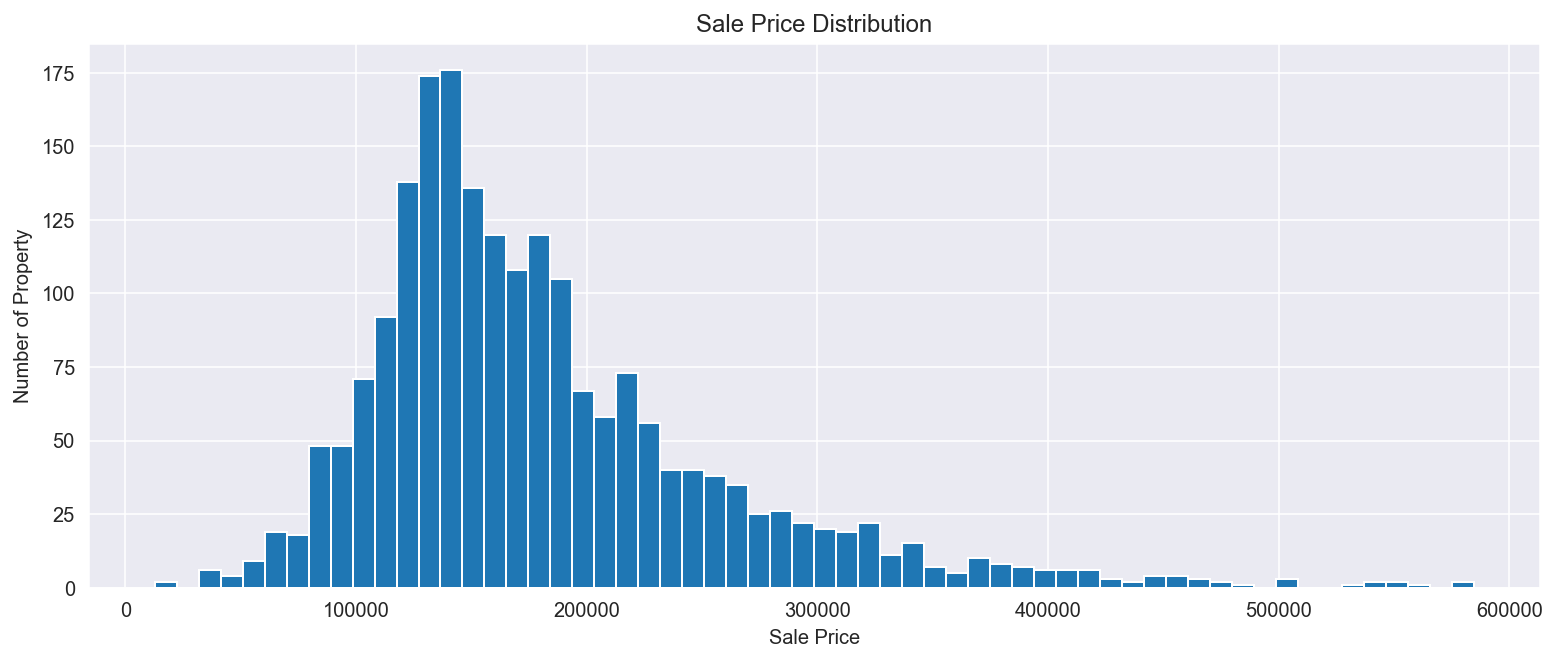

In [46]:
plt.figure(figsize=(13,5))
plt.hist(housing['SalePrice'], bins = 60)
plt.title("Sale Price Distribution")
plt.xlabel('Sale Price')
plt.ylabel('Number of Property');

The Sale Price has a right-skew, meaning that there are a lot of outliers.

In [47]:
print(f"The average housing price is {housing['SalePrice'].mean()} while the median housing price is {housing['SalePrice'].median()}")

The average housing price is 181049.73802541546 while the median housing price is 162250.0


**Location and Environment vs Sales Price**

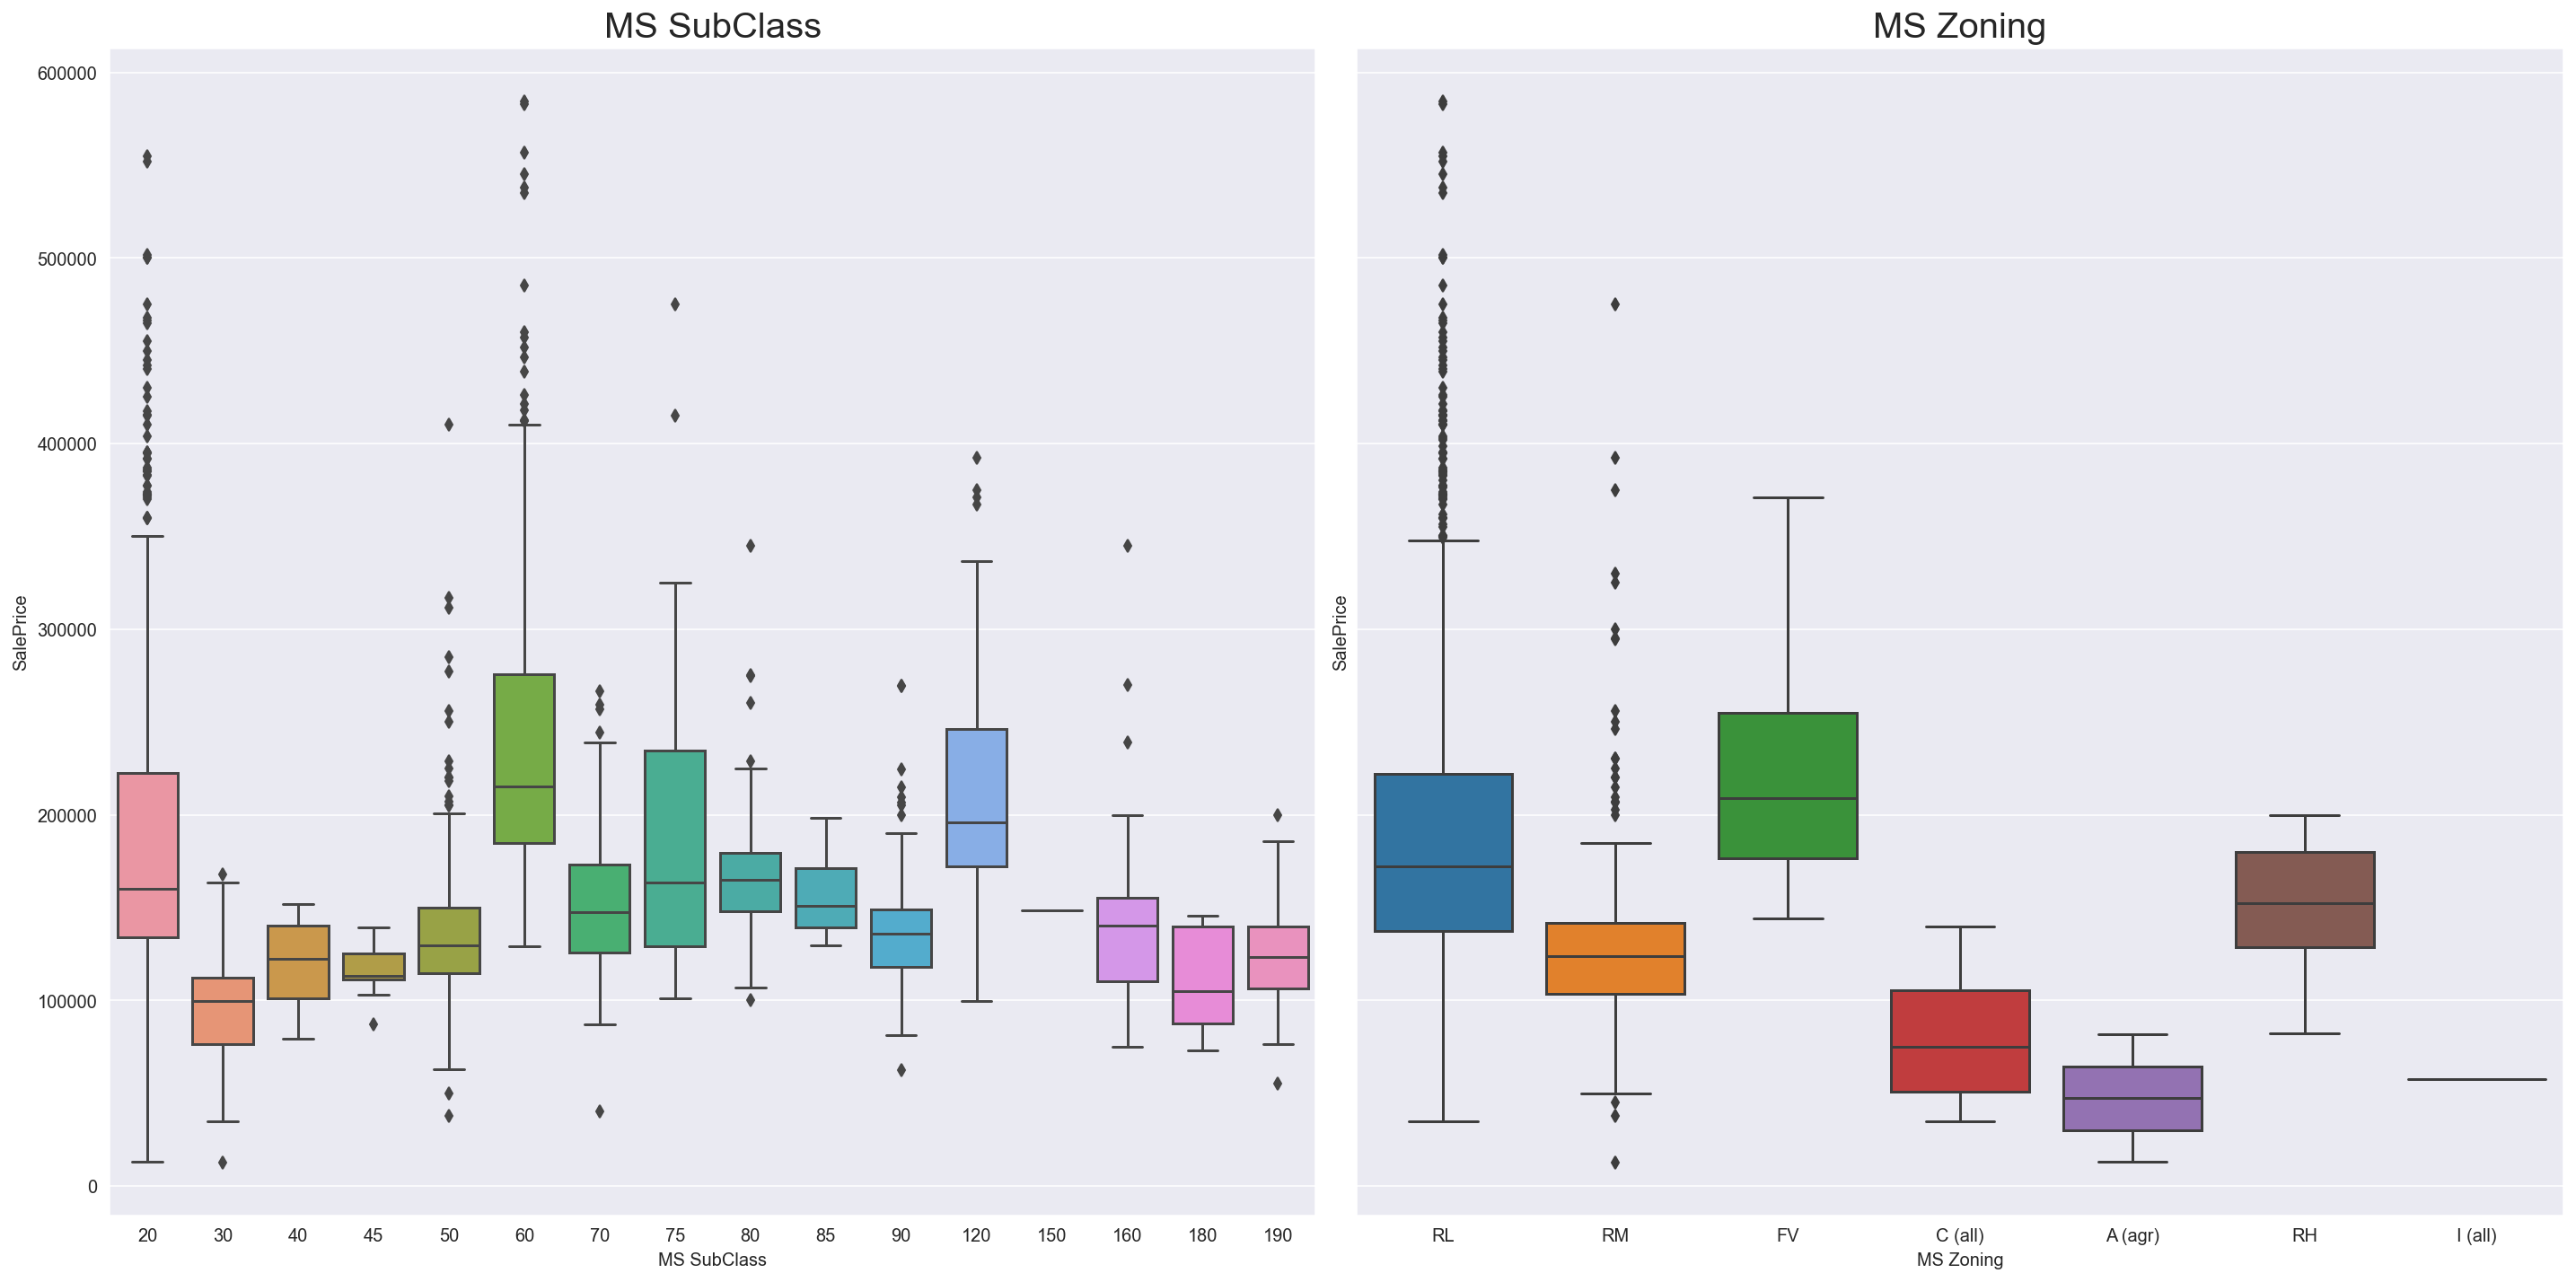

In [48]:
columns = ['MS SubClass','MS Zoning']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- The type of dwelling does affect the sale price, with some dwellings, such as `20`, `60`, `75` and `120` fetching higher average prices than the rest. These dwellings also have more outliers which lies beyond the 75th percentile.

- For commercial zones, agricultural zones and residential high density zones, the sale prices are more consistent. Low density and medium density residential zones have a much wider range.

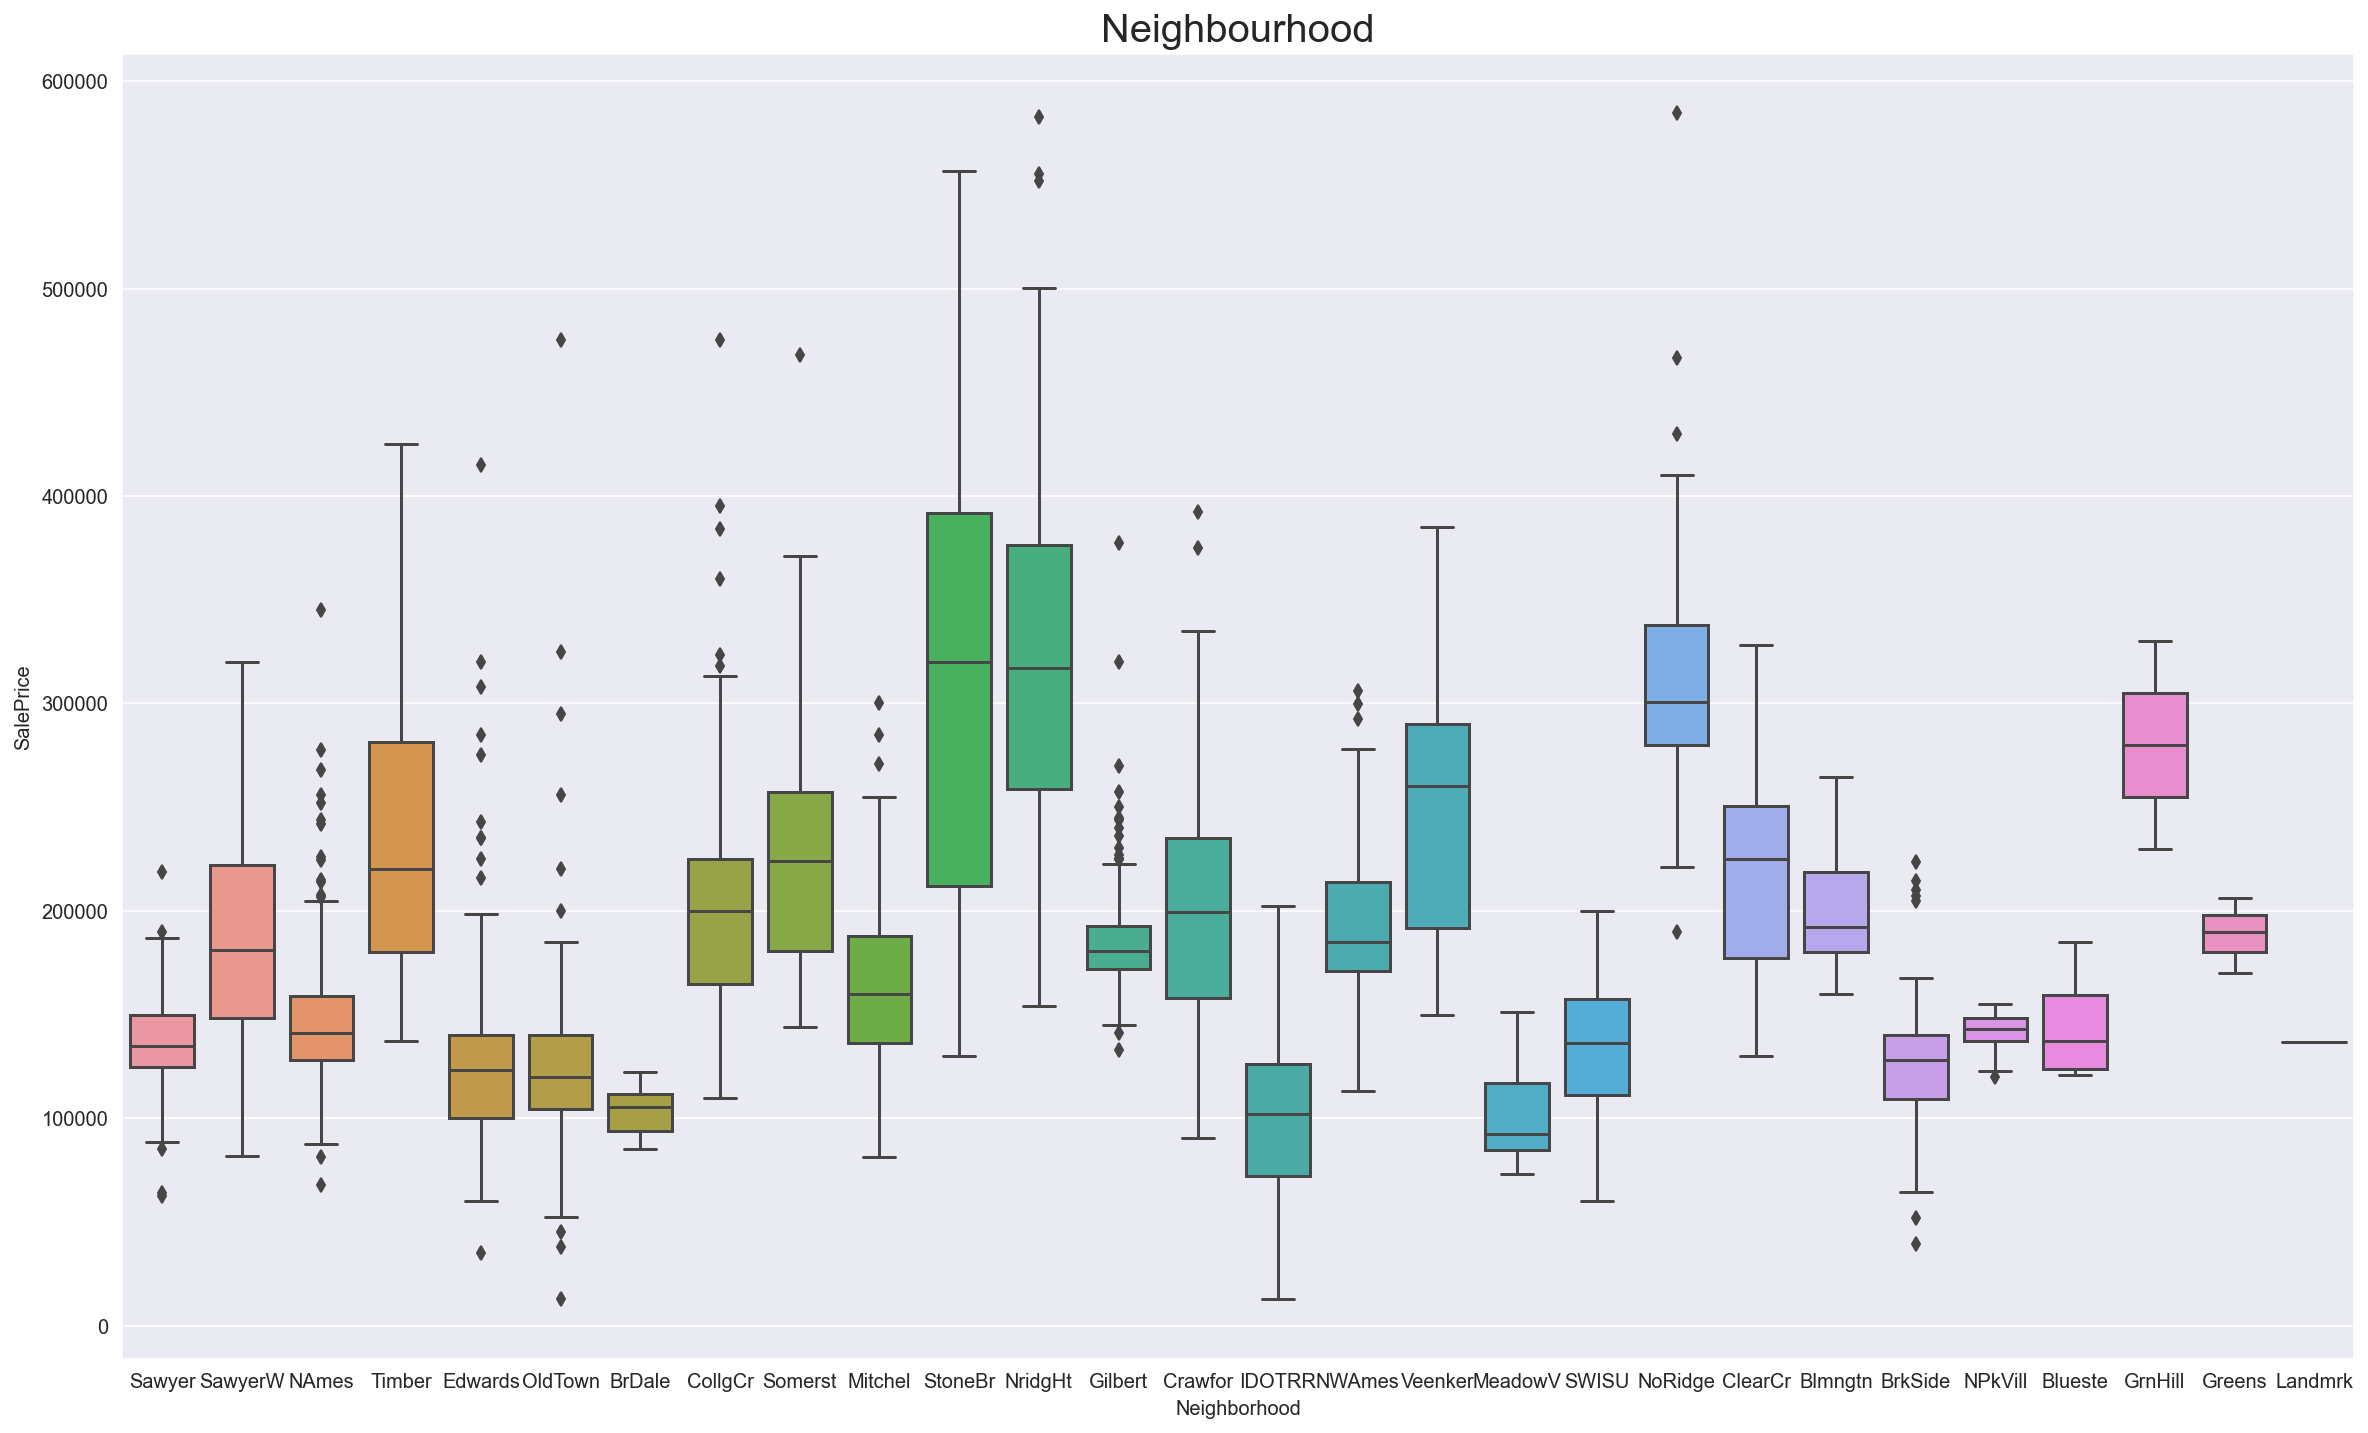

In [49]:
plt.figure(figsize=(20,12))
sns.boxplot(housing['Neighborhood'], housing['SalePrice'])
plt.title("Neighbourhood",size=20);

- Some neighbourhoods also fetch higher prices than the rest. This will could be an important predictor.

**Lot Characteristics vs Sales Price**

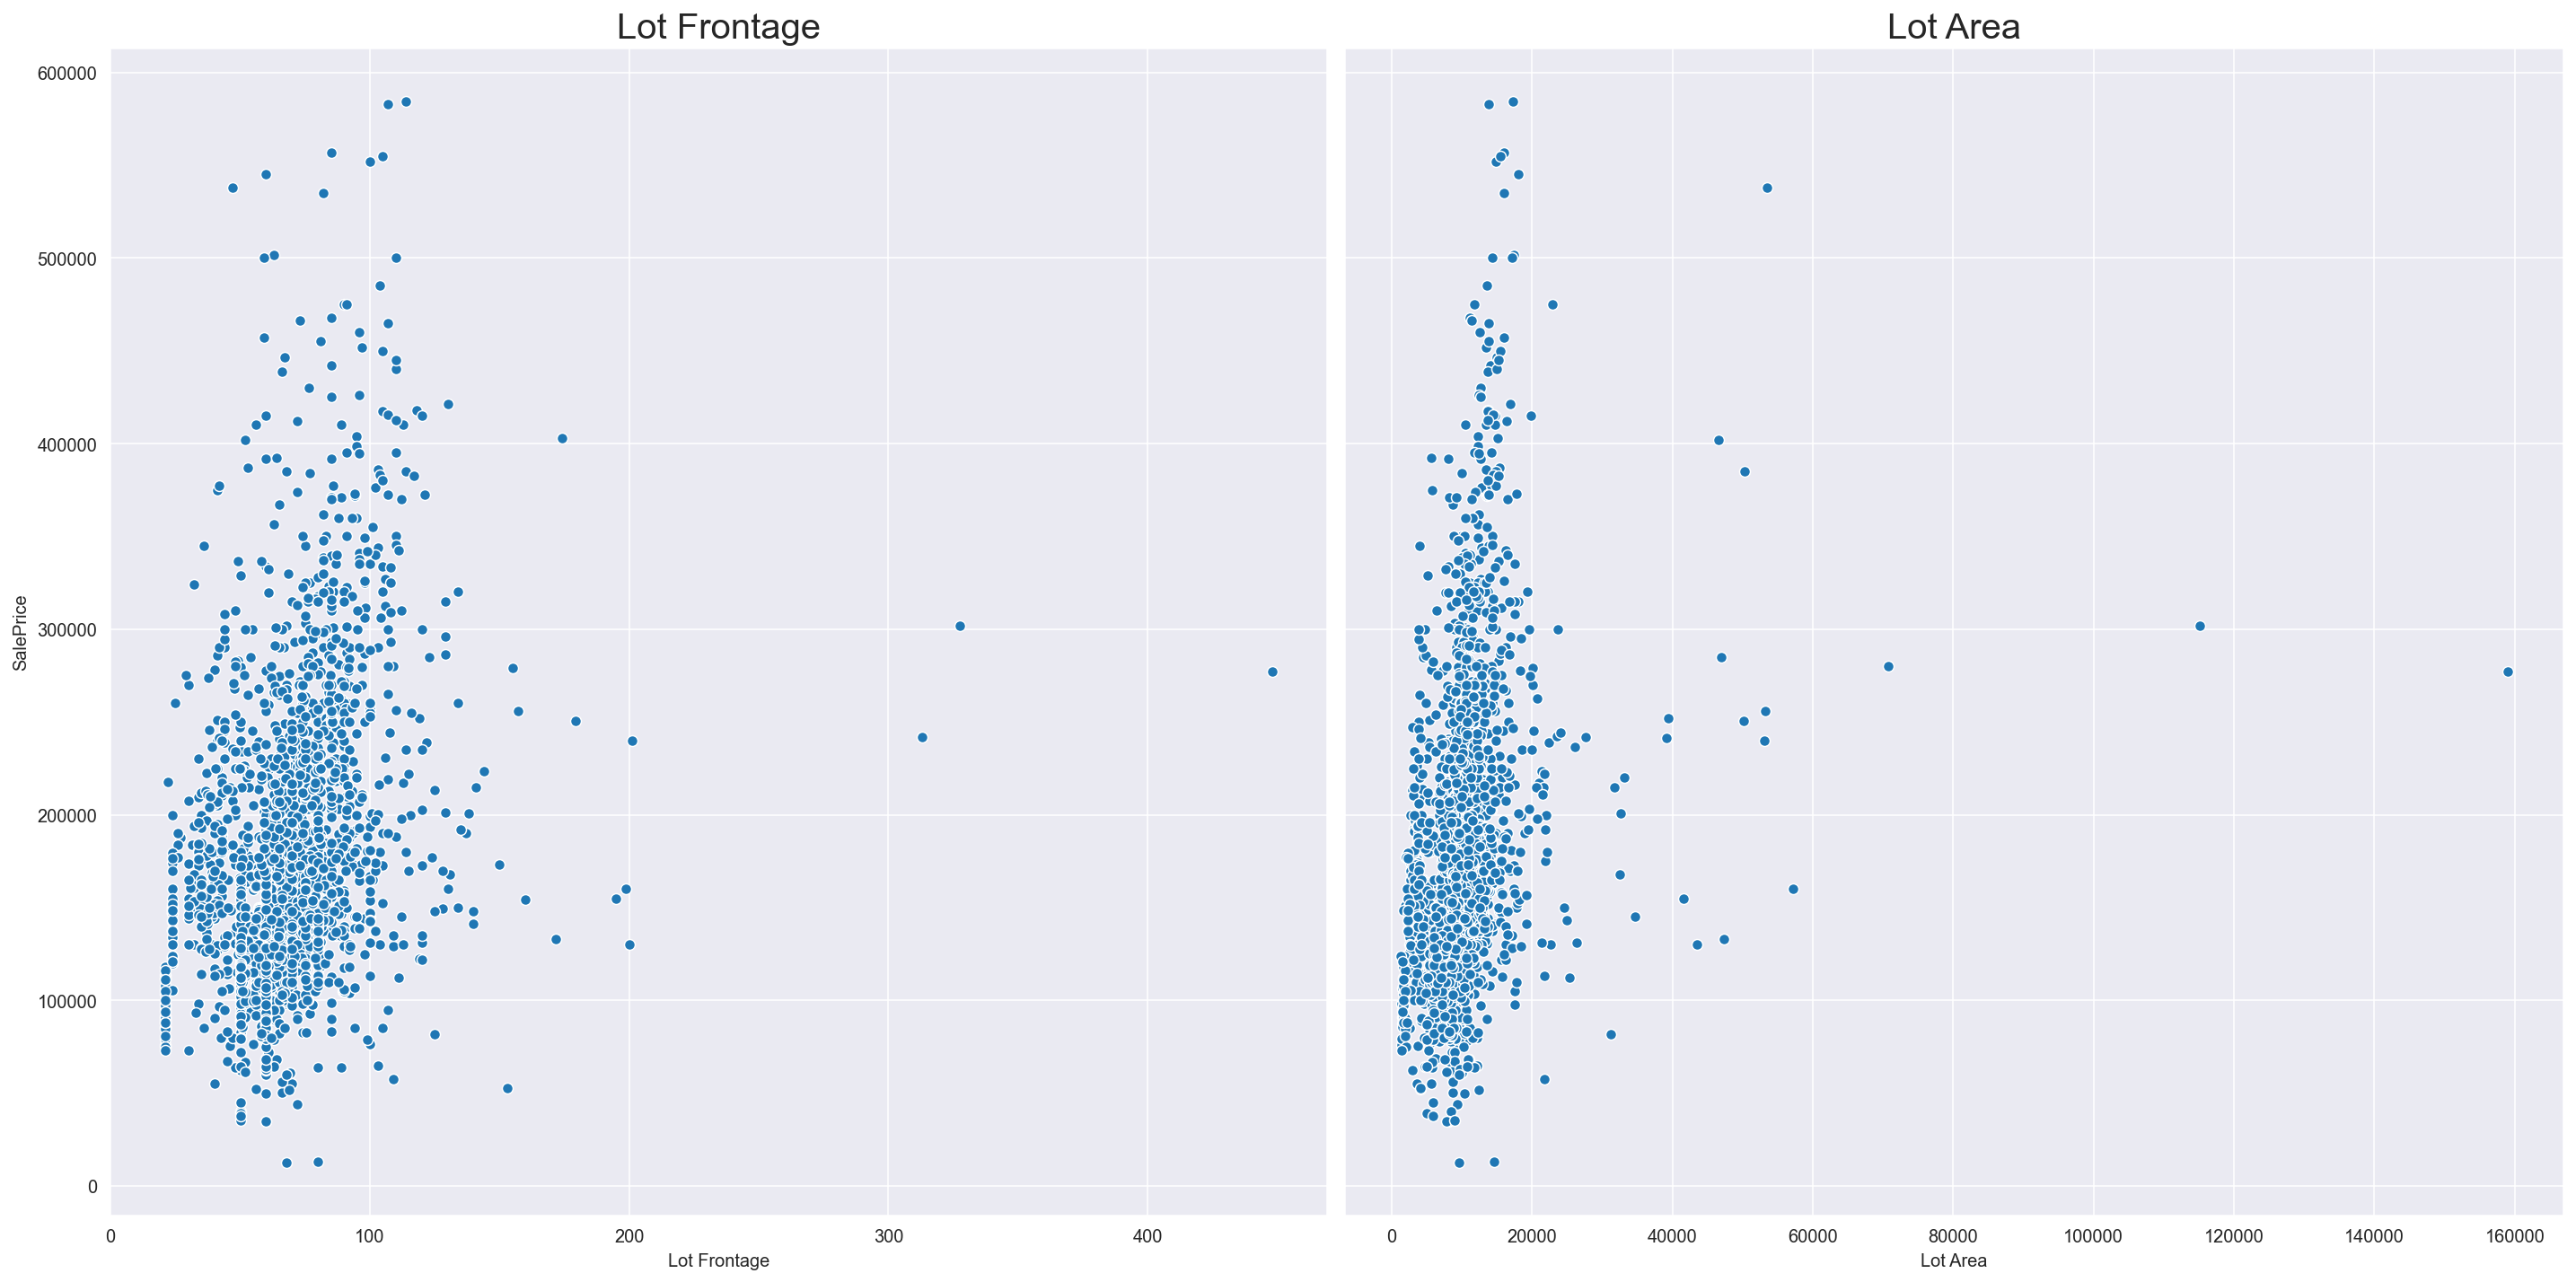

In [50]:
columns = ['Lot Frontage','Lot Area']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

-  There is a positive linear relationship between lot frontage and sale prices.
- There is also a positive linear relationship between lot area and sale prices. As both of them could be collinear, one could be excluded from the other during regression.

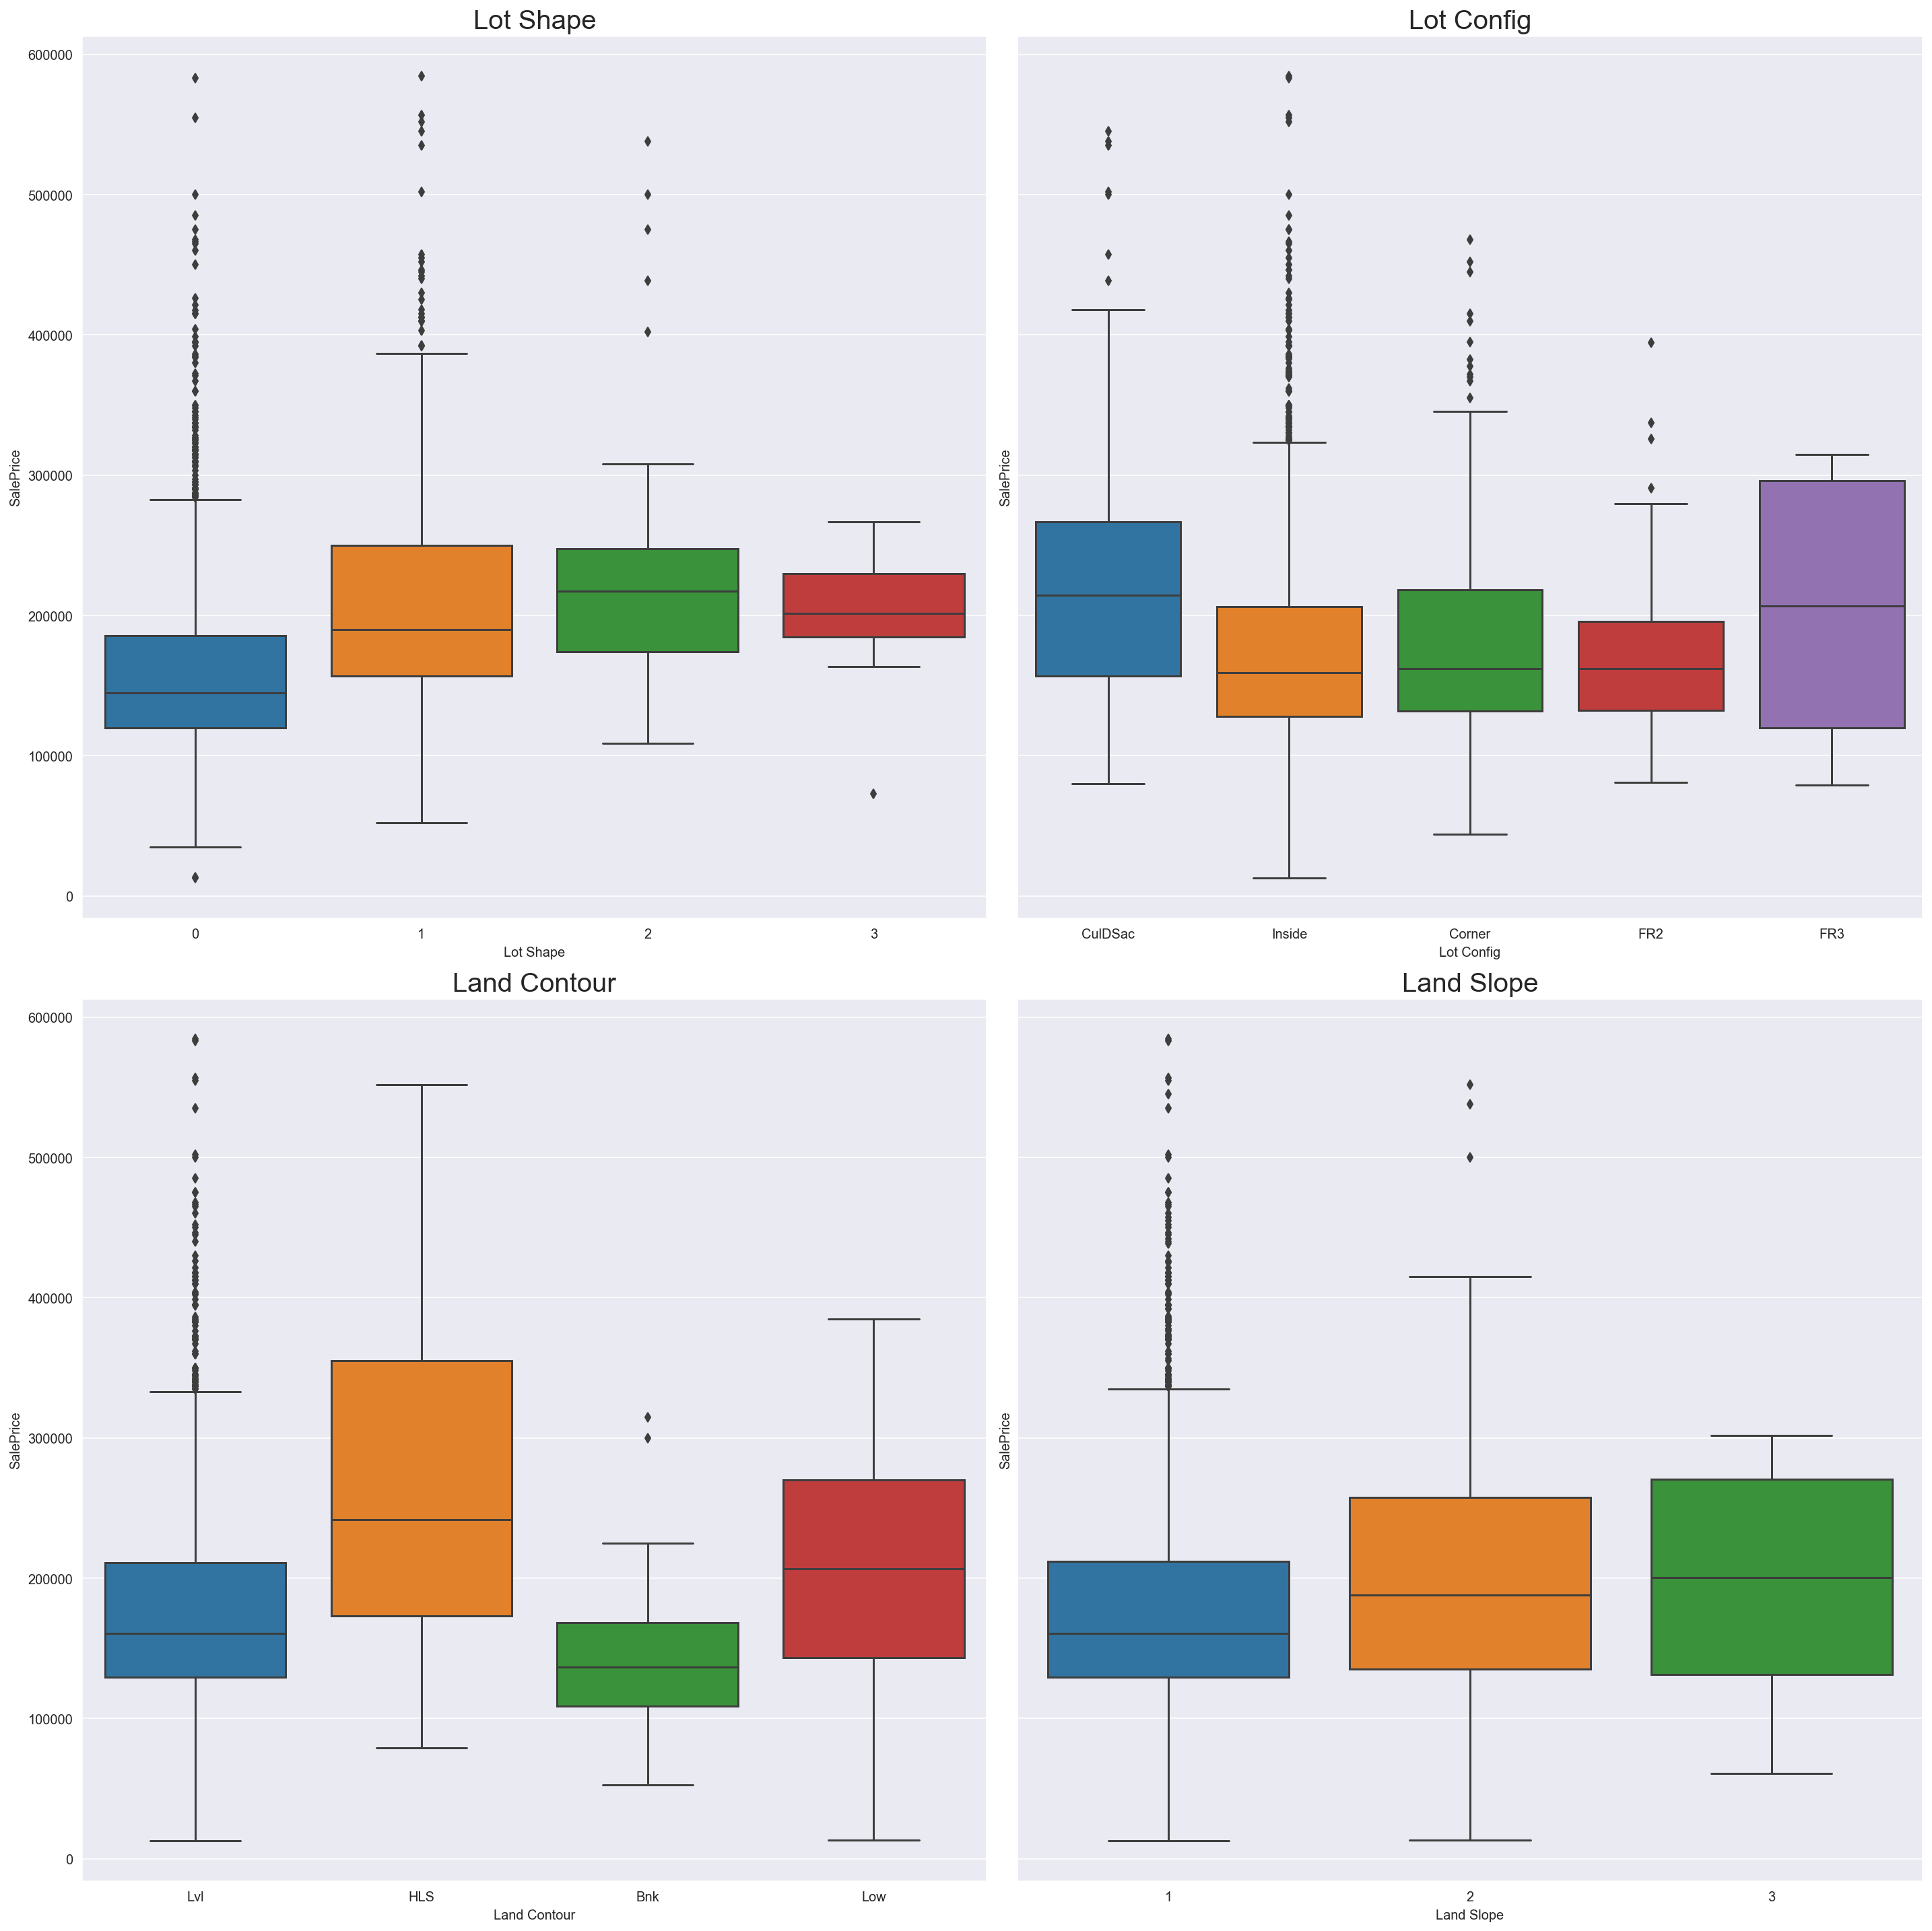

In [51]:
columns = ['Lot Shape','Lot Config','Land Contour','Land Slope']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- It seems that the regularity of the lot do not have a clear relationship with sale prices directly.
- There are also no clear type of configurations or contours which does better than the other types. However, hillside properties seem to fetch higher average sale prices.

- For the type of slope, it is clear that the more severe the slope, the shorter the range of prices. Moderate slope seems to be the most consistent in fetching a range of sale prices.

**Access vs Sales Price**

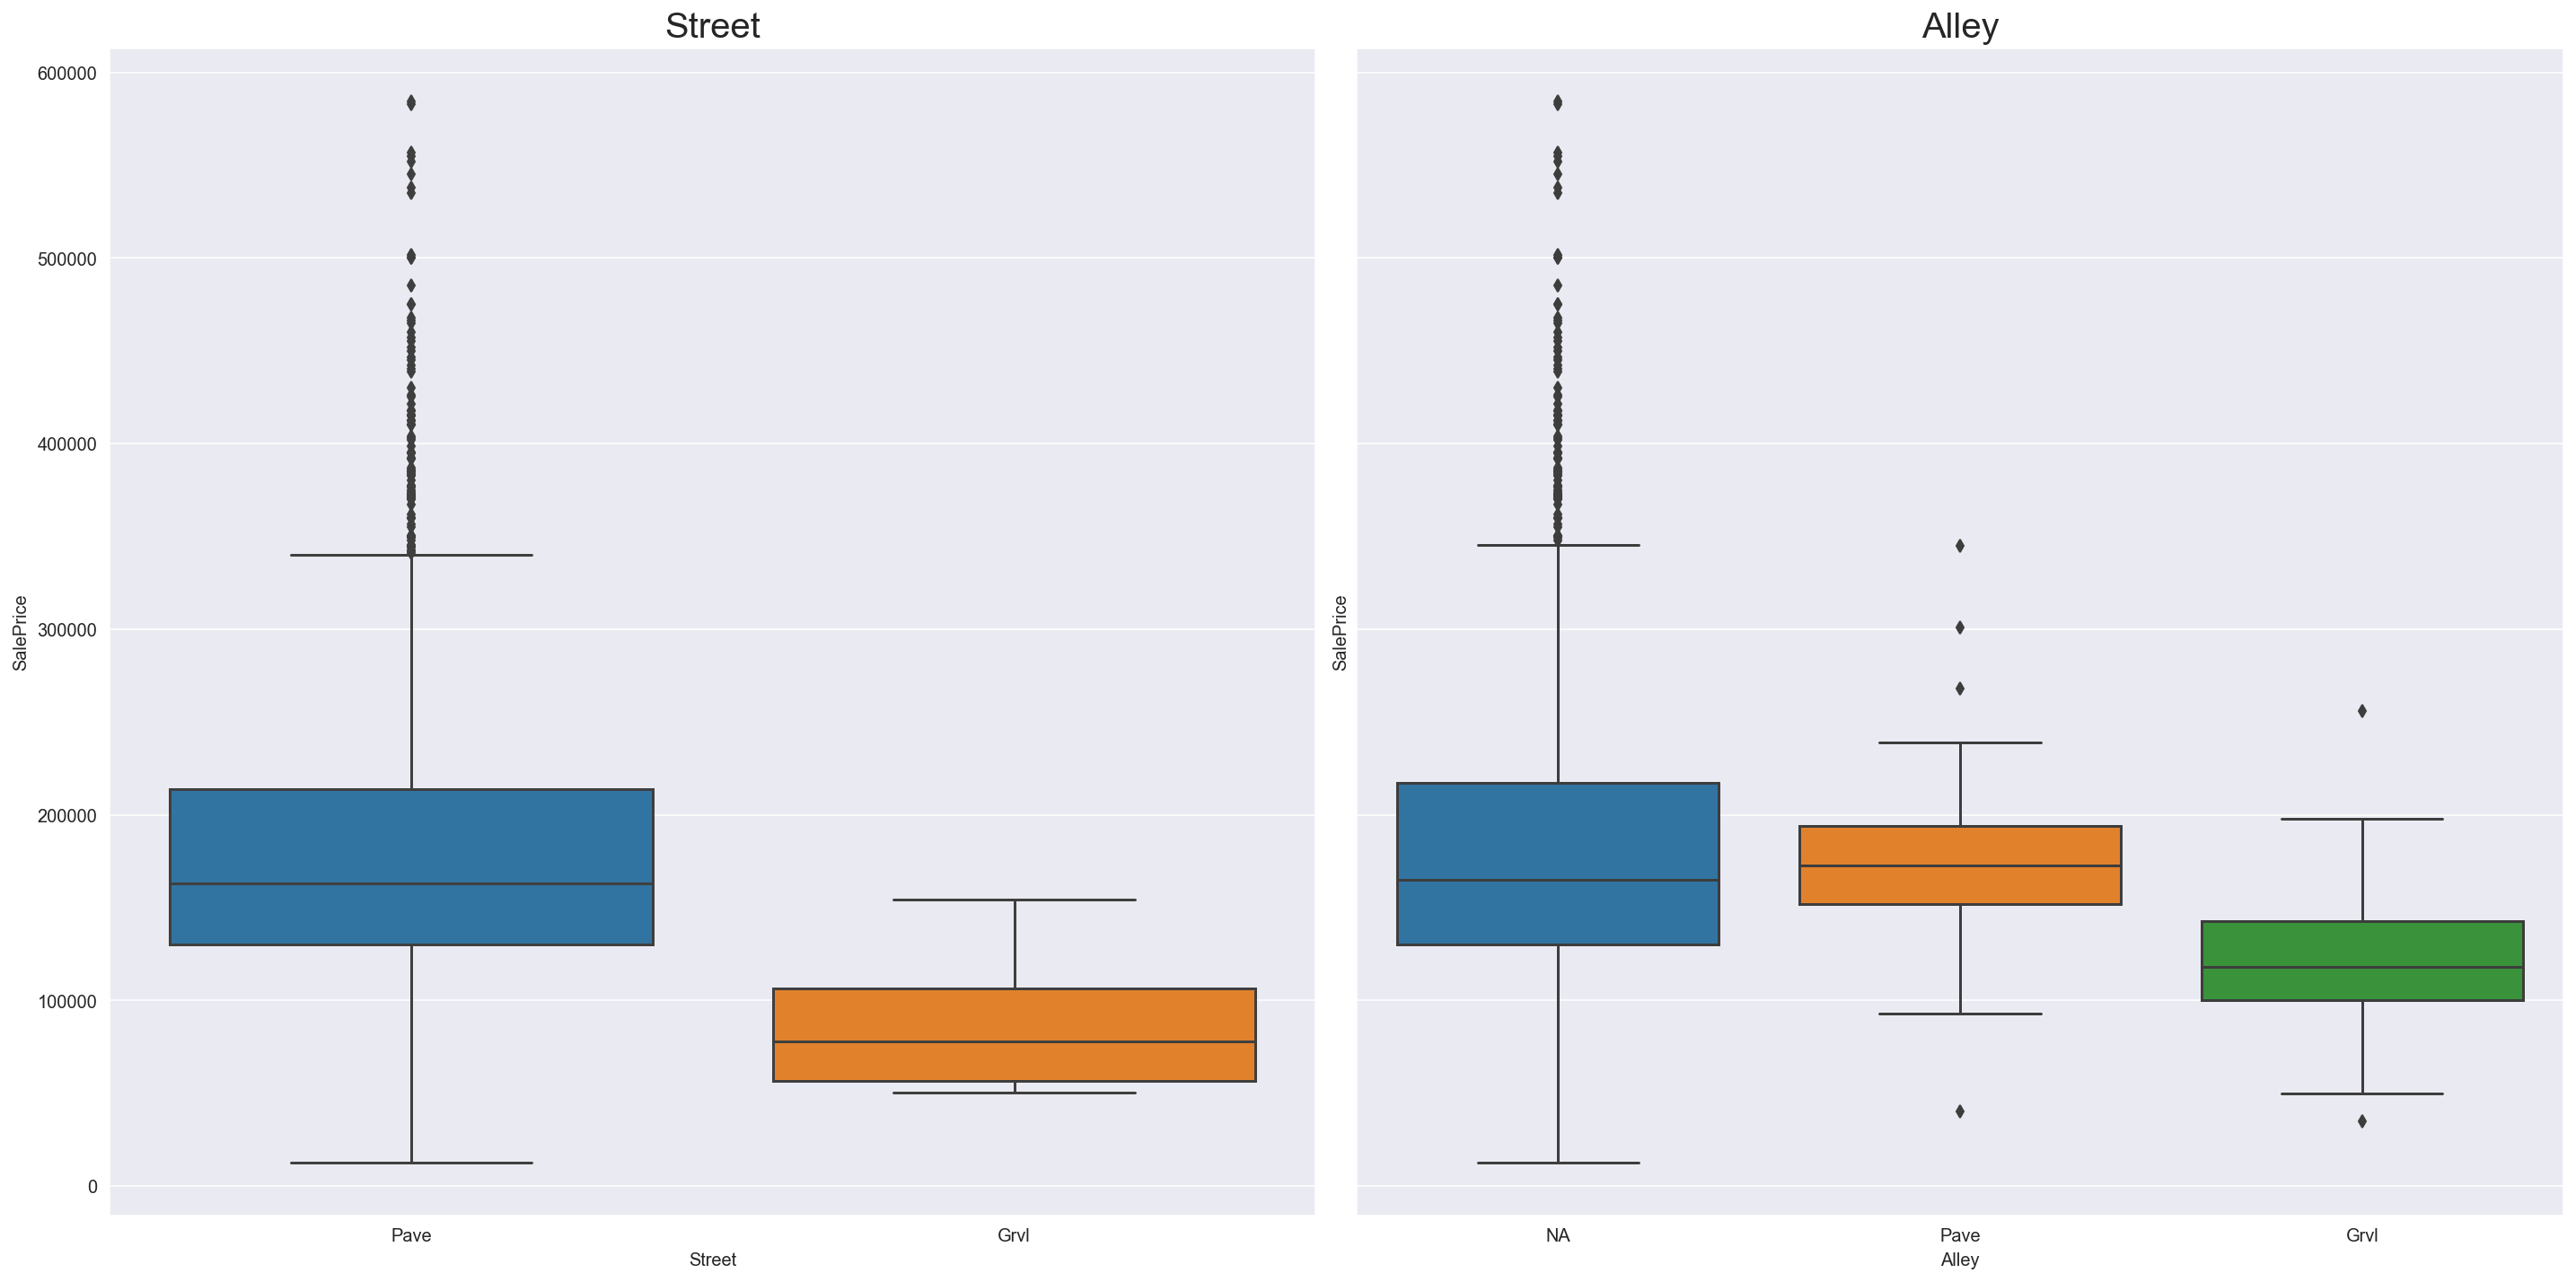

In [52]:
columns = ['Street','Alley']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- It seems that for both `street` and `alley`, paved access fetch a higher sale price.

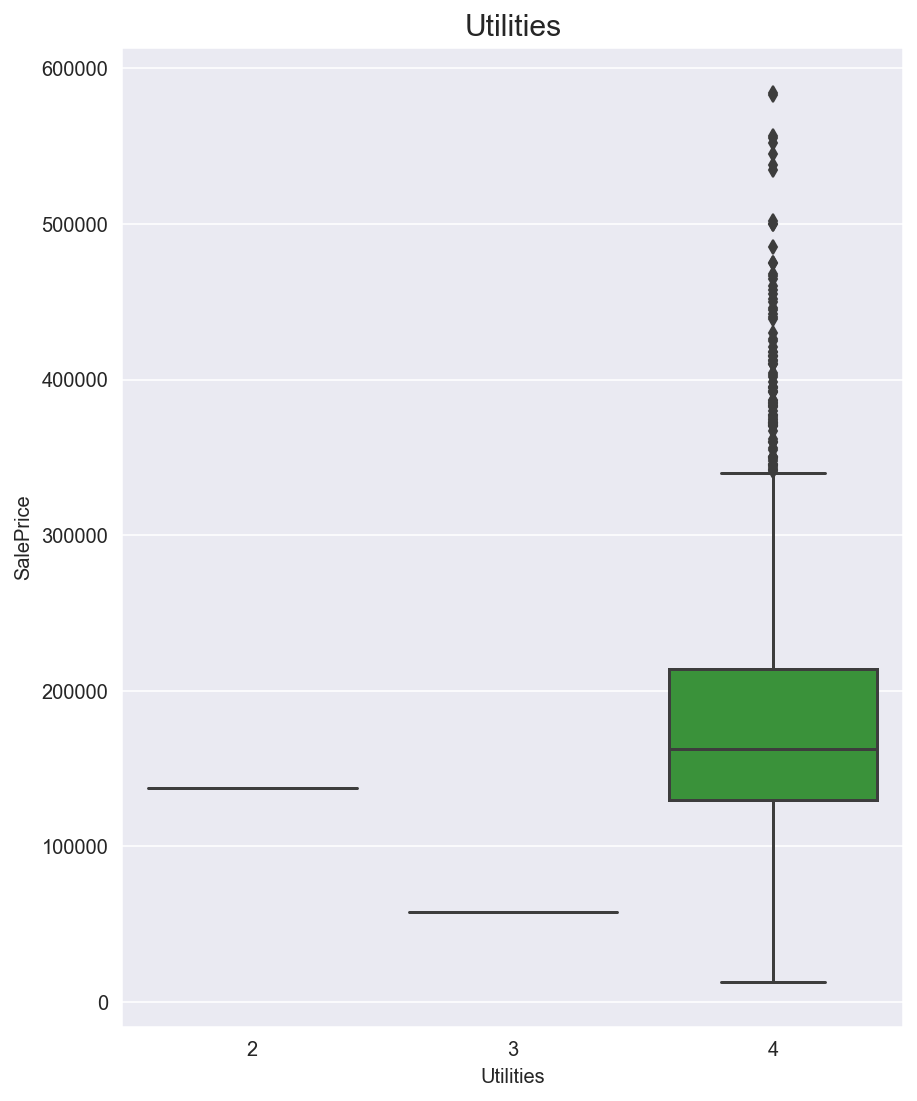

In [53]:
plt.figure(figsize=(7,9))
sns.boxplot(housing['Utilities'], housing['SalePrice'])
plt.title('Utilities',size=15);

- It is not possible to establish a relationship as most of the properties have all utilities available.

**Proximity vs Sales Price**

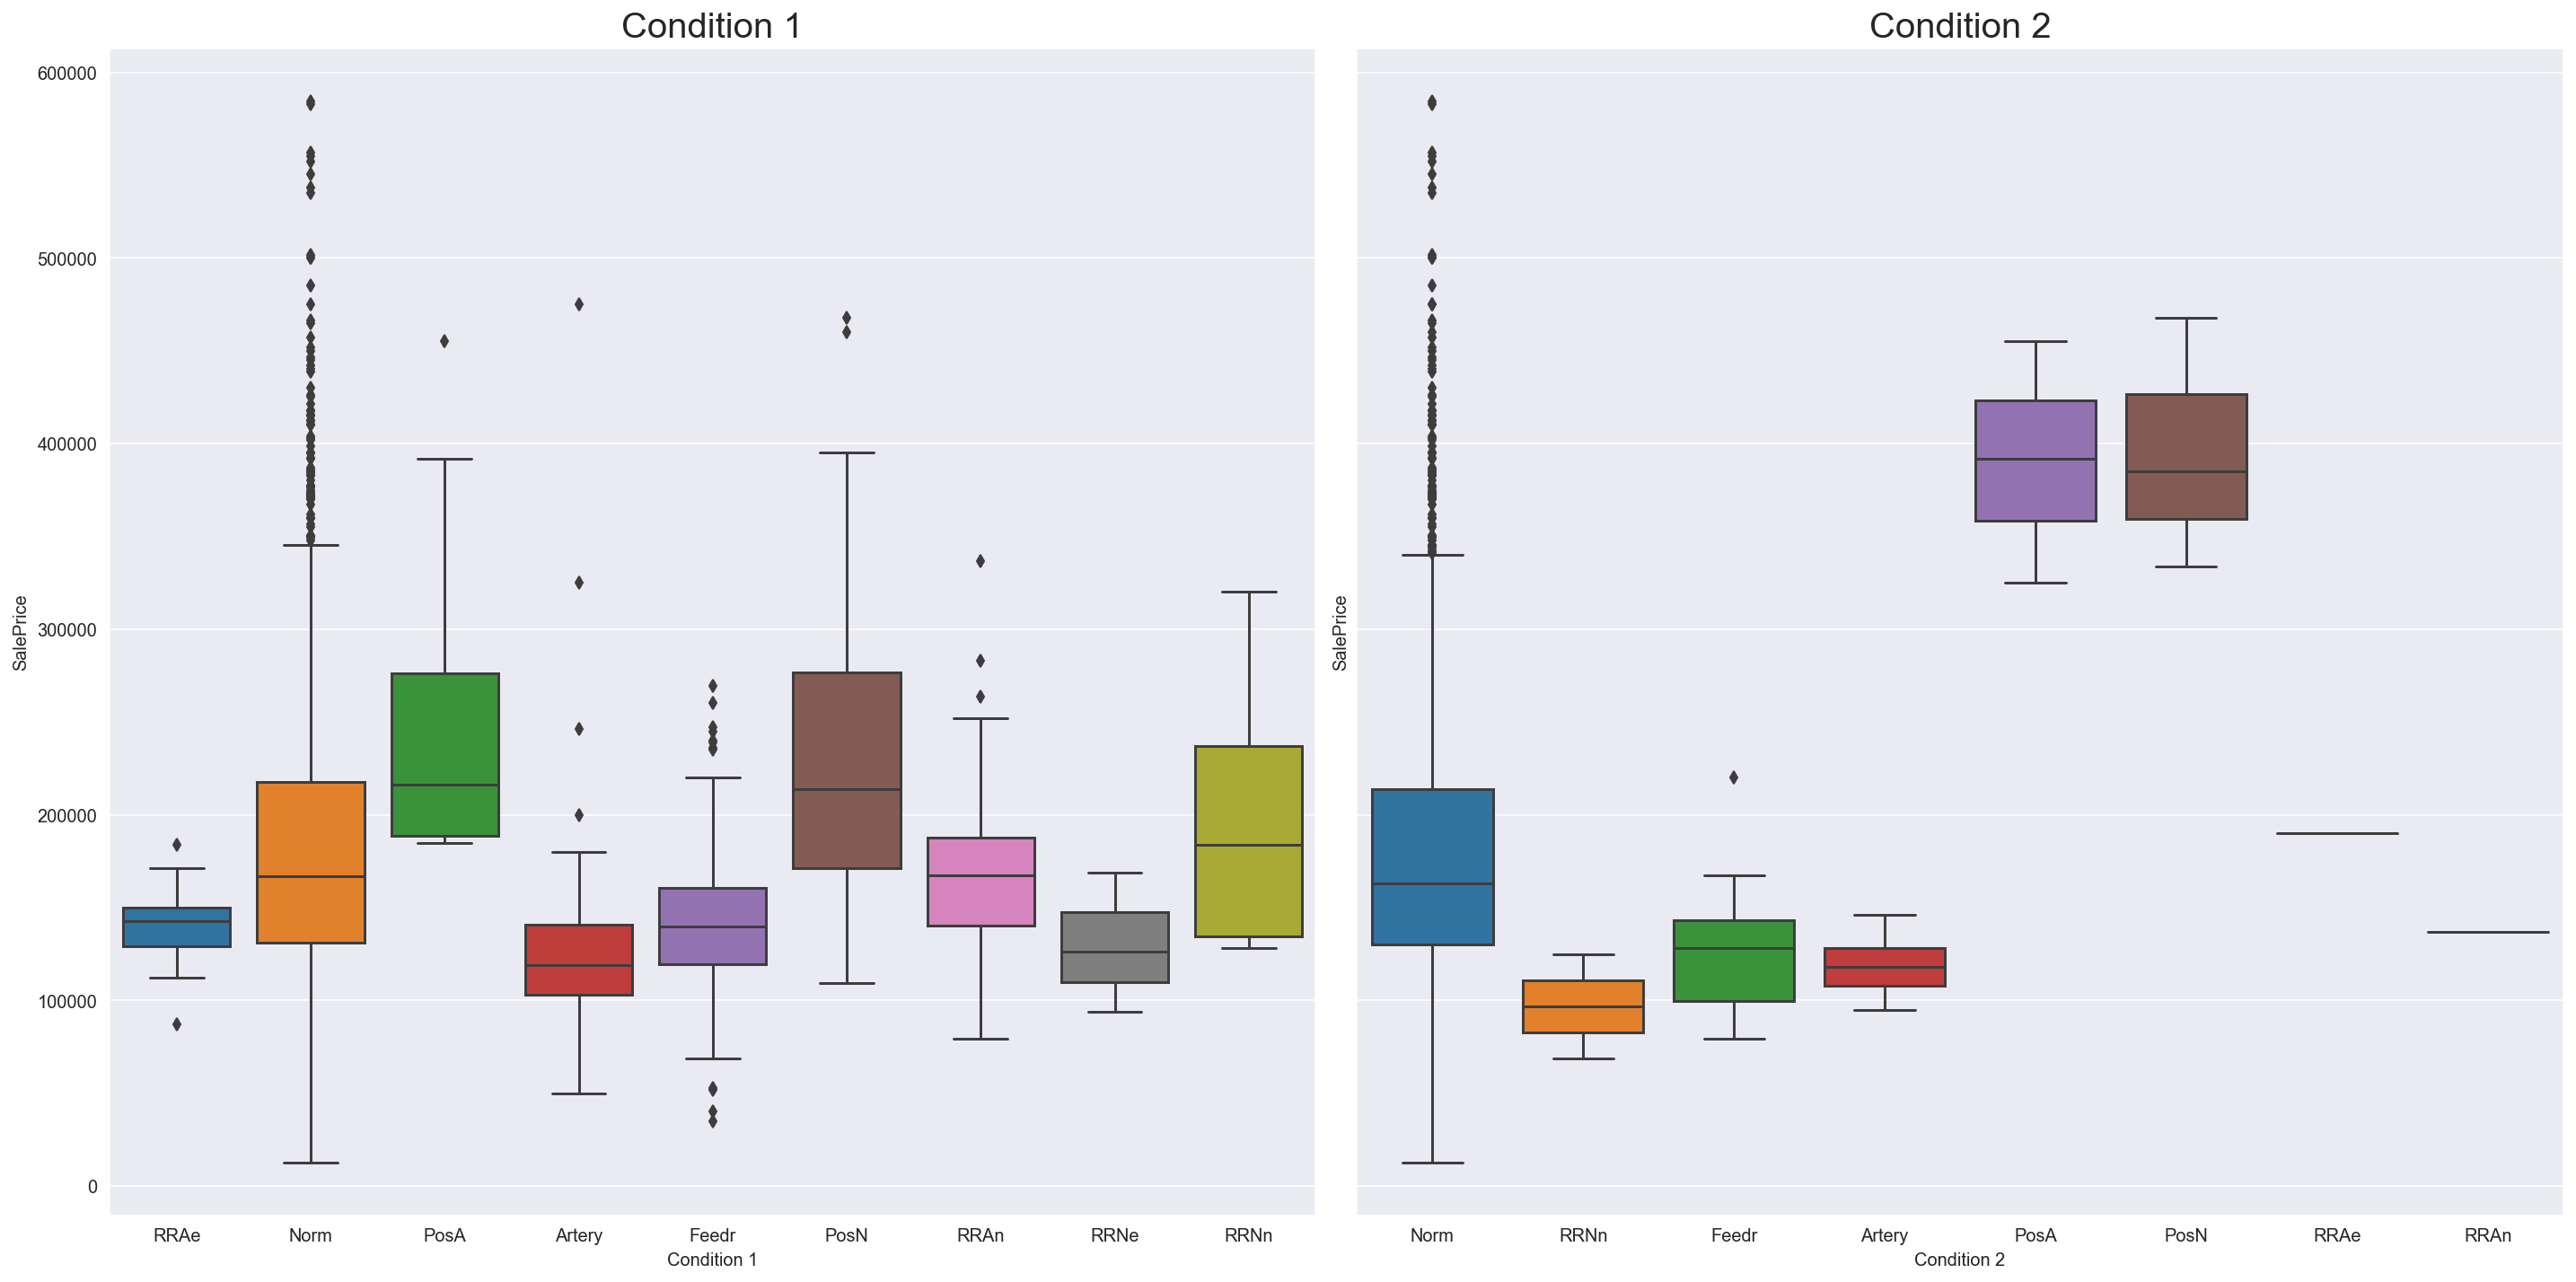

In [54]:
columns = ['Condition 1', 'Condition 2']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- Adjacent to Positive Off-Site Feature `PosA` and Near Positive Off-Site Feature `PosN` seem to fetch higher sale prices on average, this is true in both primary and secondary conditions. The worst ones are properties near arterial streets `Artery` or feeder streets `Feedr`

**Dwelling vs Sales Price**

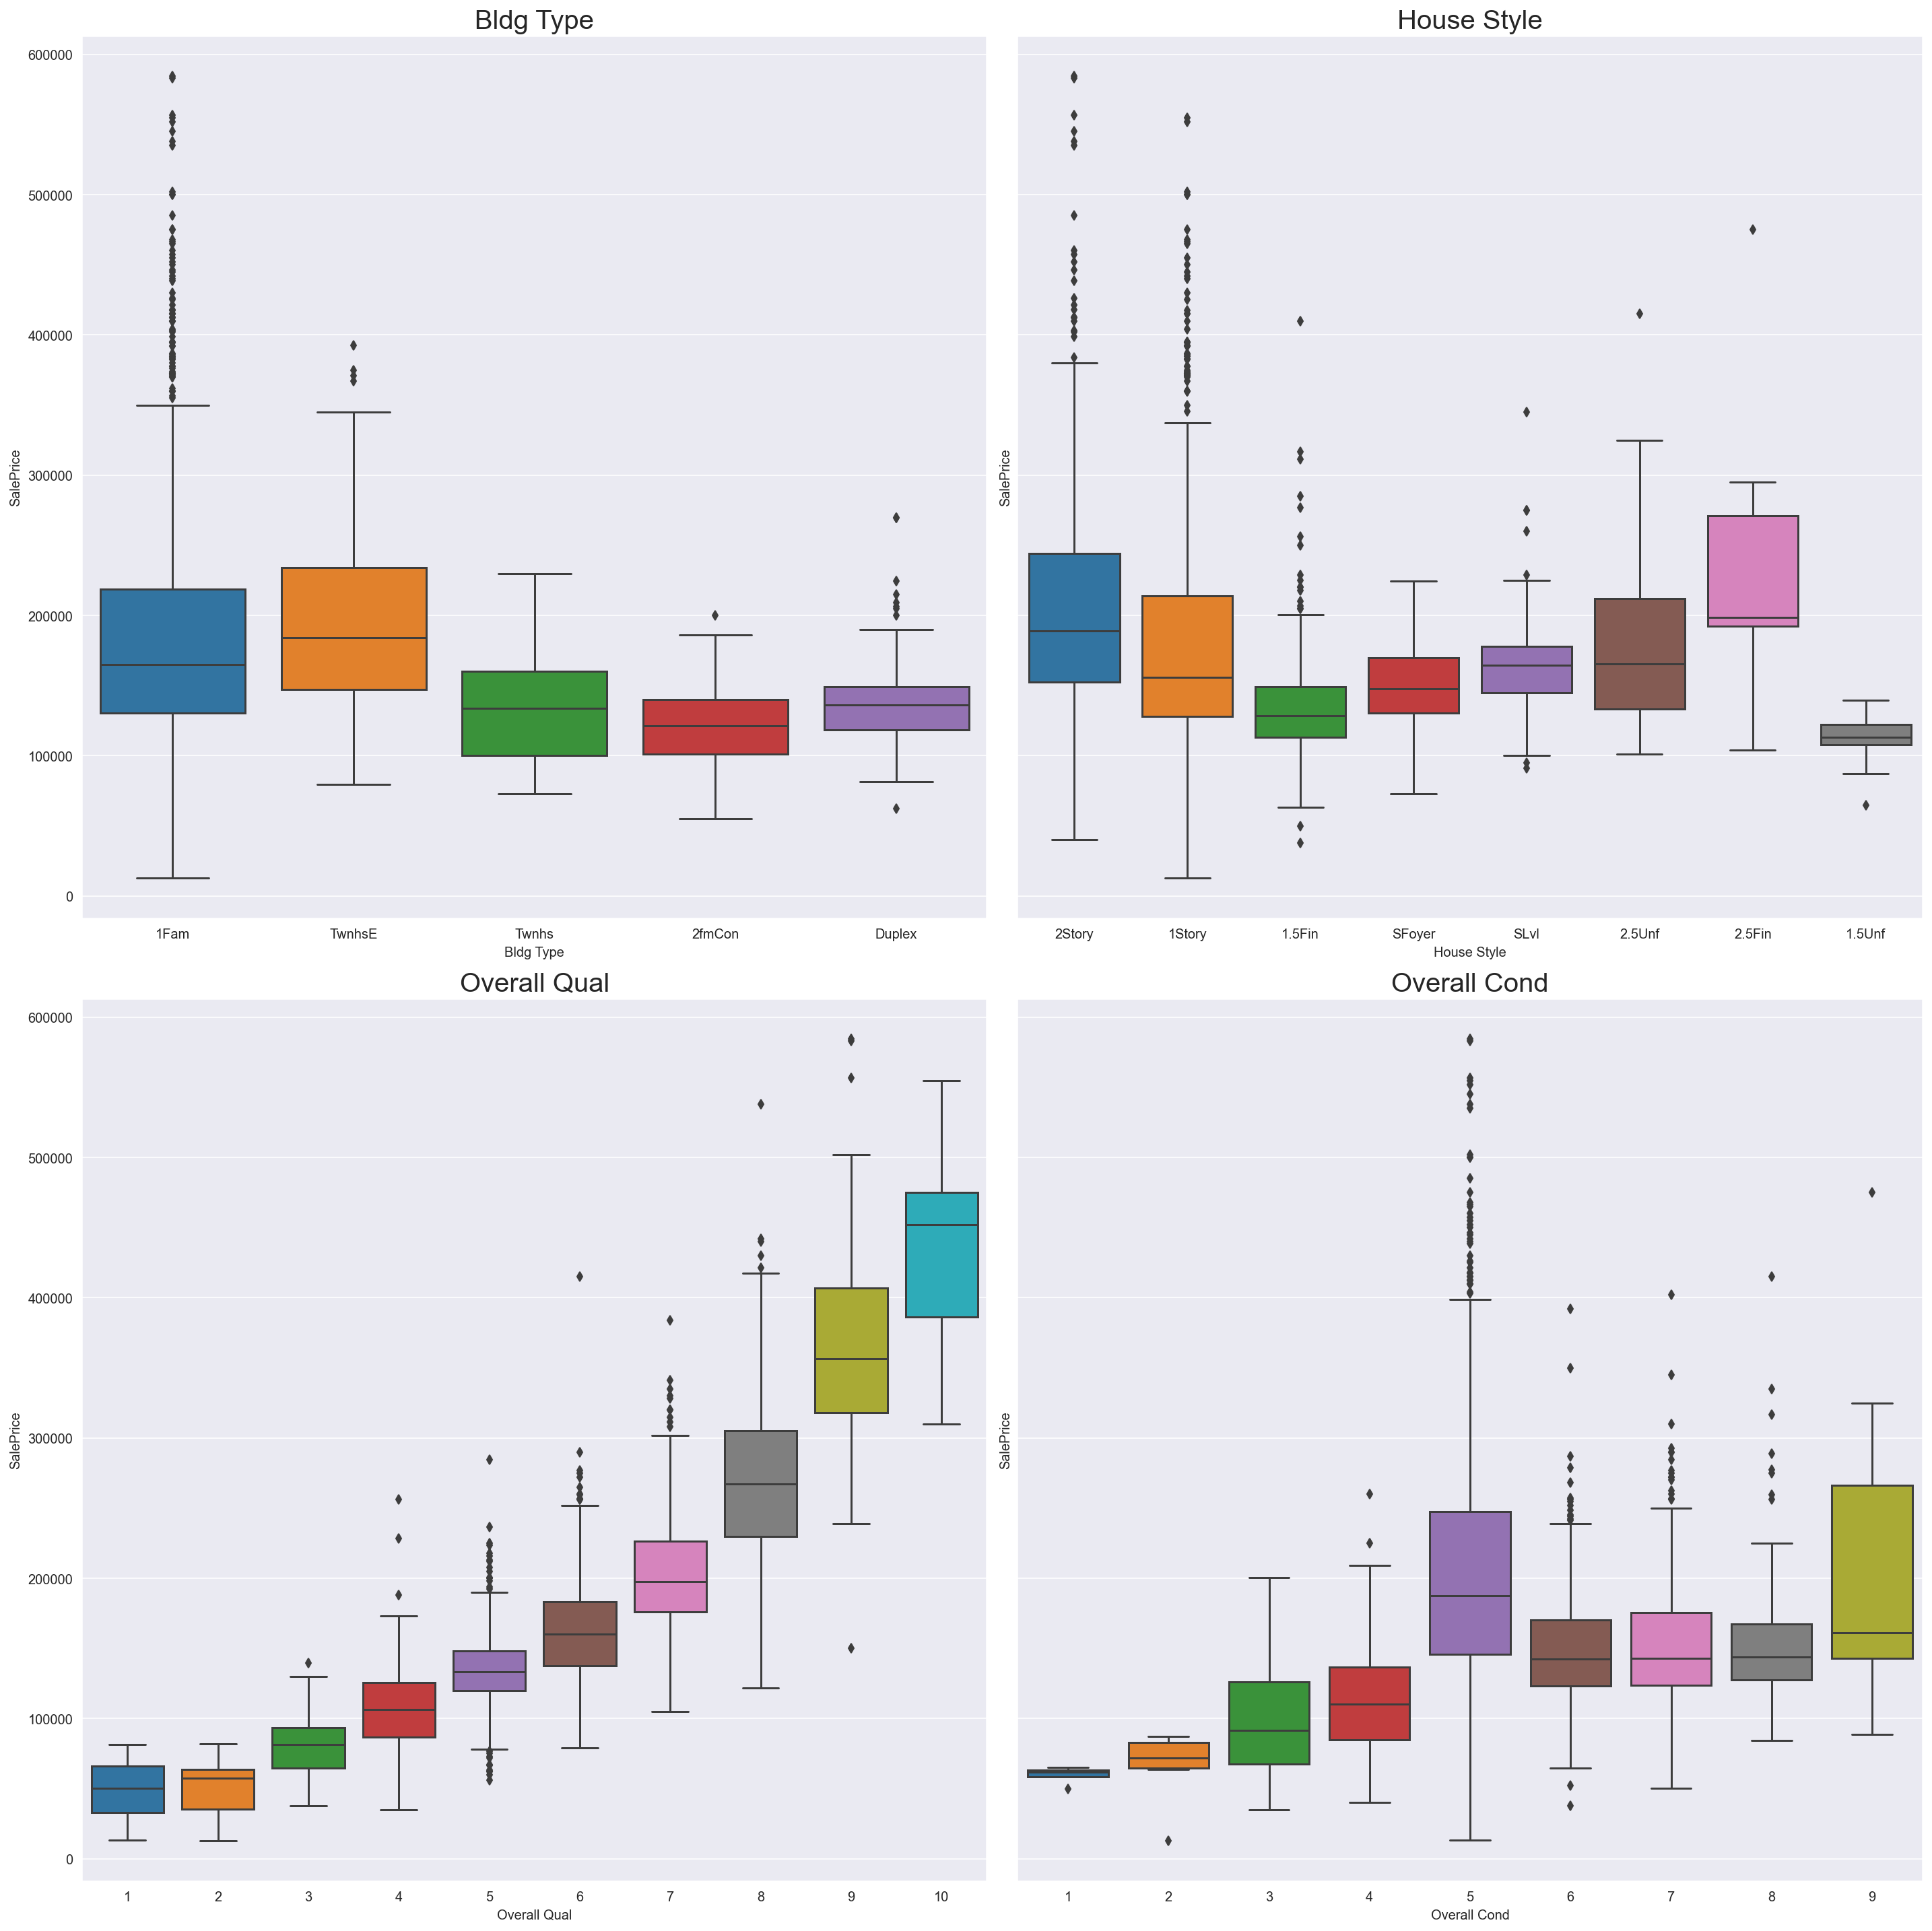

In [55]:
columns = ['Bldg Type','House Style', 'Overall Qual', 'Overall Cond']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- Townhouse End Unit `TwnhsE` seemed to do slightly better than the rest. It might be a good predictor for price.
For the style of houses, two and a half finished houses `2.5Fin` have fetched a higher price. 

- There is a positive linear correlation between the scores of overall quality/condition and sale prices. The higher the quality and condition, the higher the price.

**Construction/Remodel Year vs Sales Price**

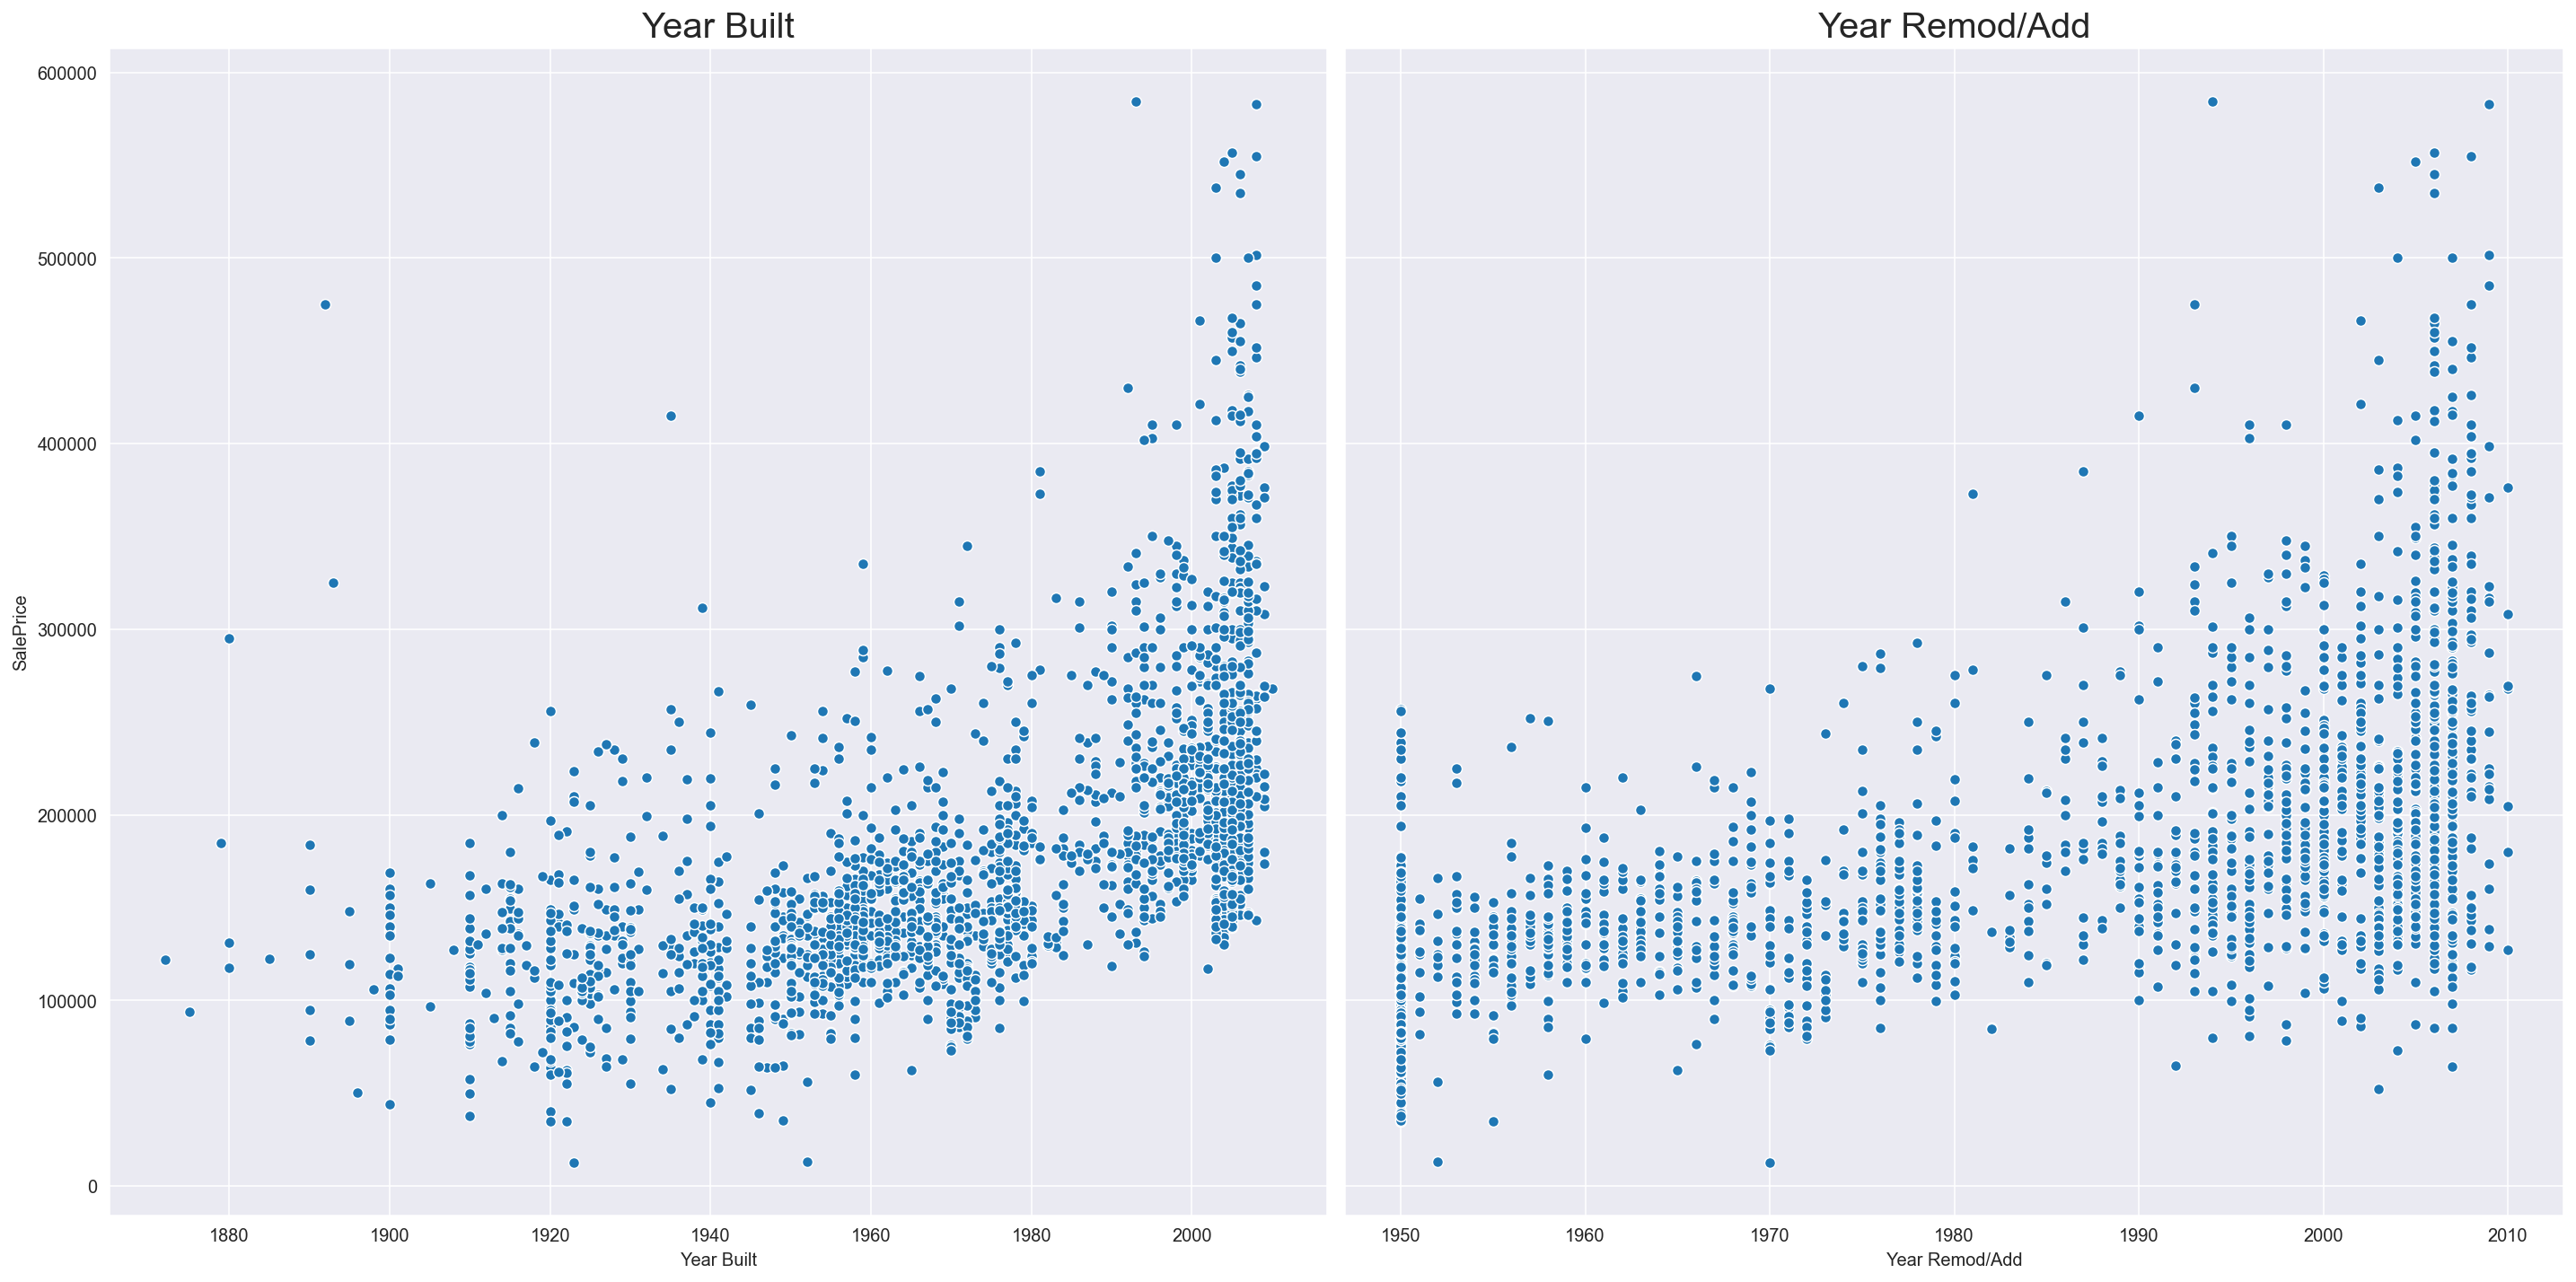

In [56]:
columns = ['Year Built','Year Remod/Add']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- The newer the property is built, and/or the newer they reremodel, the higher the sale price.

**Exterior Characteristics vs Sales Price**

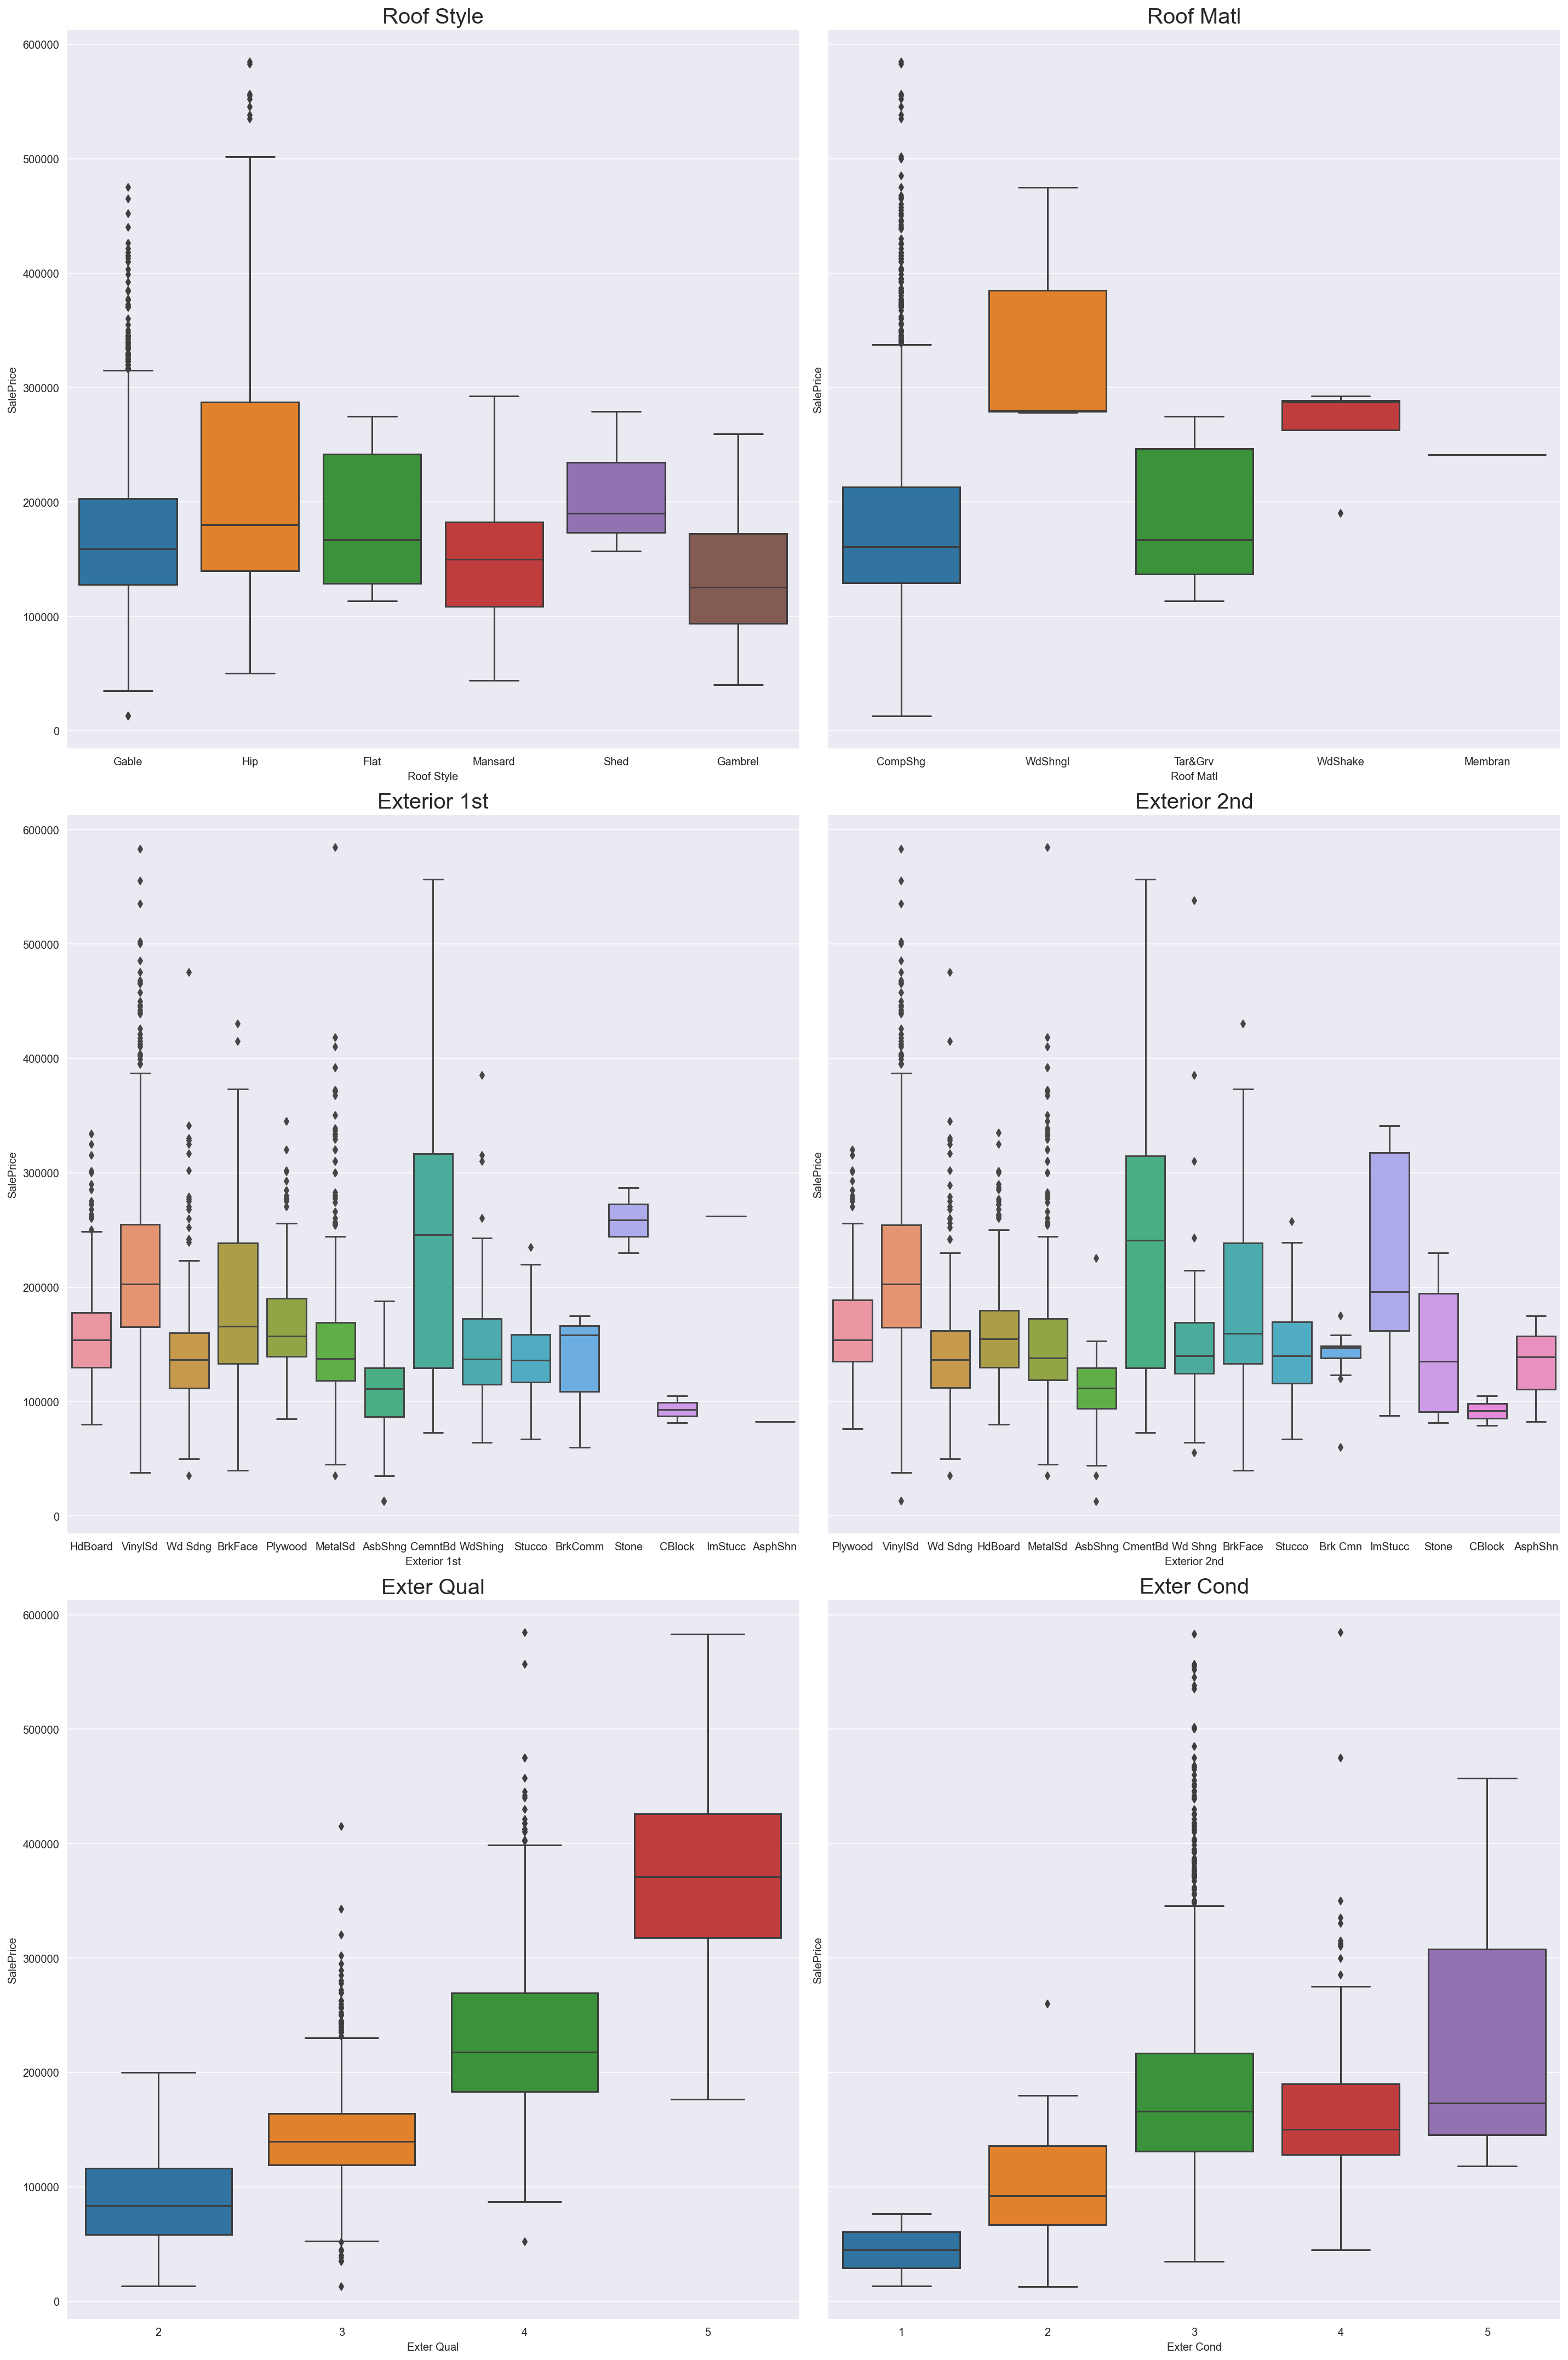

In [57]:
columns = ['Roof Style', 'Roof Matl', 'Exterior 1st','Exterior 2nd','Exter Qual', 'Exter Cond']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20,30), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- The different materials used do have a high impact on the sale price. This is evident from both the roof and the exterior.

- For the quality and condition of the exterior, there is also a clear relationship that the better the condition, the higher the price it can fetch.

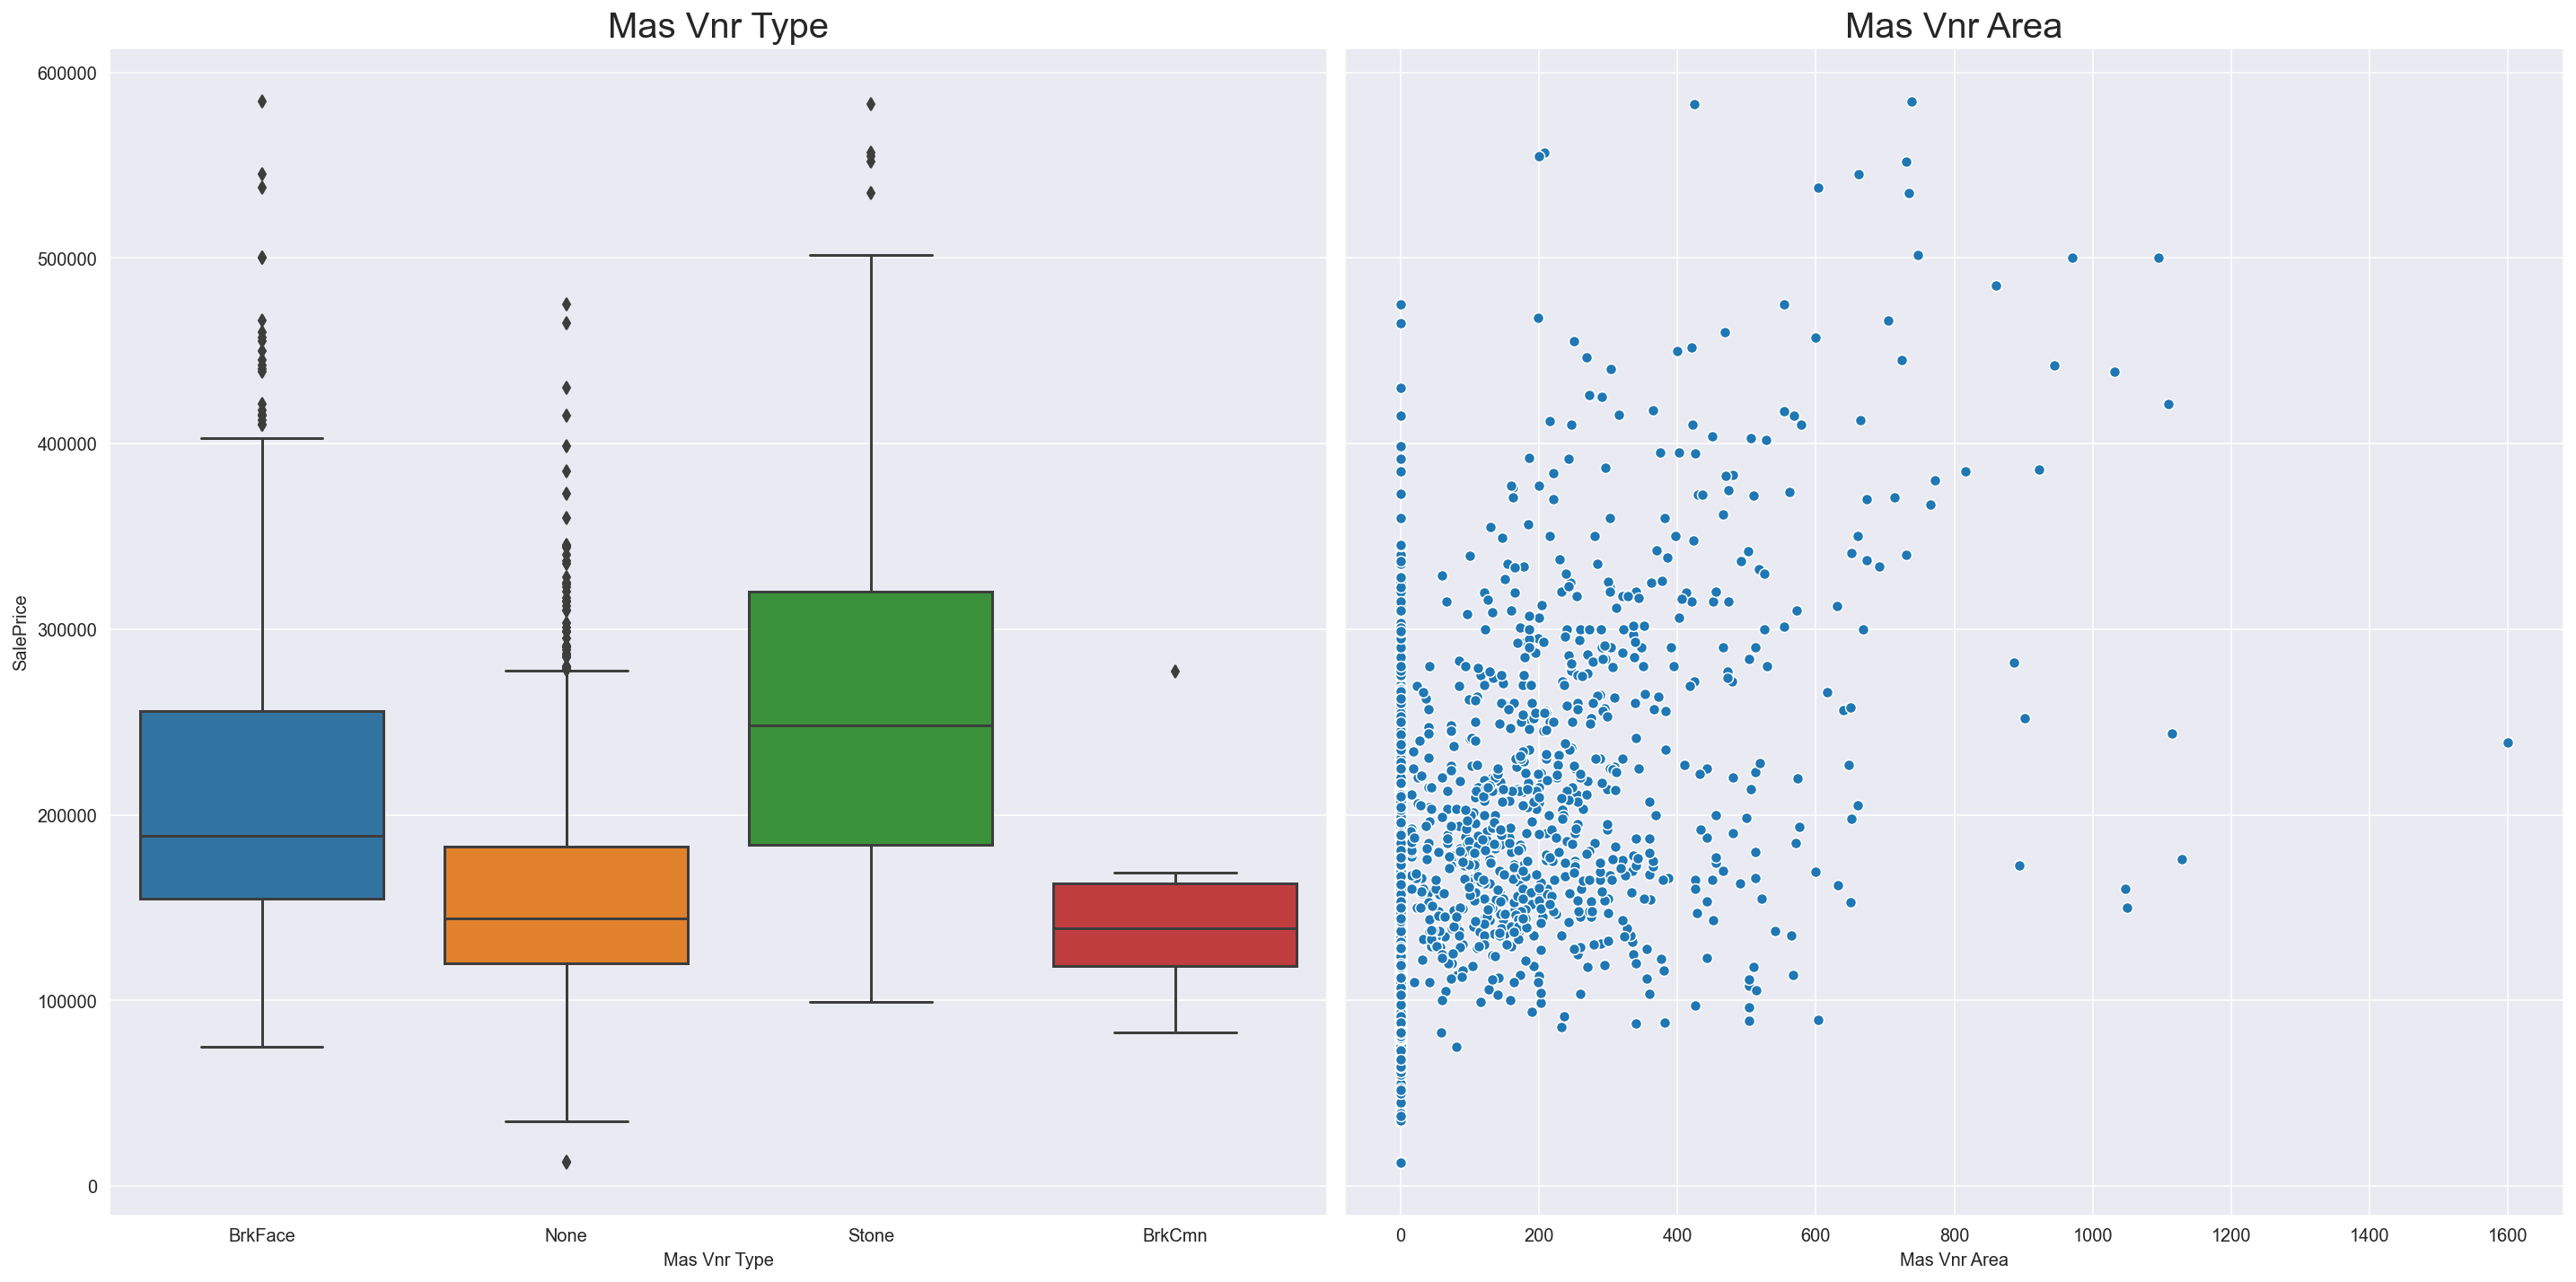

In [58]:
columns = ['Mas Vnr Type','Mas Vnr Area']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()

# plot Mas Vnr Type on box plot while area on scatter

sns.boxplot(housing['Mas Vnr Type'], housing['SalePrice'],ax = ax[0])
ax[0].set_title('Mas Vnr Type',size=20)

sns.scatterplot(housing['Mas Vnr Area'], housing['SalePrice'],ax = ax[1])
ax[1].set_title('Mas Vnr Area',size=20)

fig.tight_layout(pad=1.0)

- The material used for the masonry veneer affects the price differently. Furthermore, there is a positive linear relationship between the area and the sale price.

**Basement vs Sales Price**

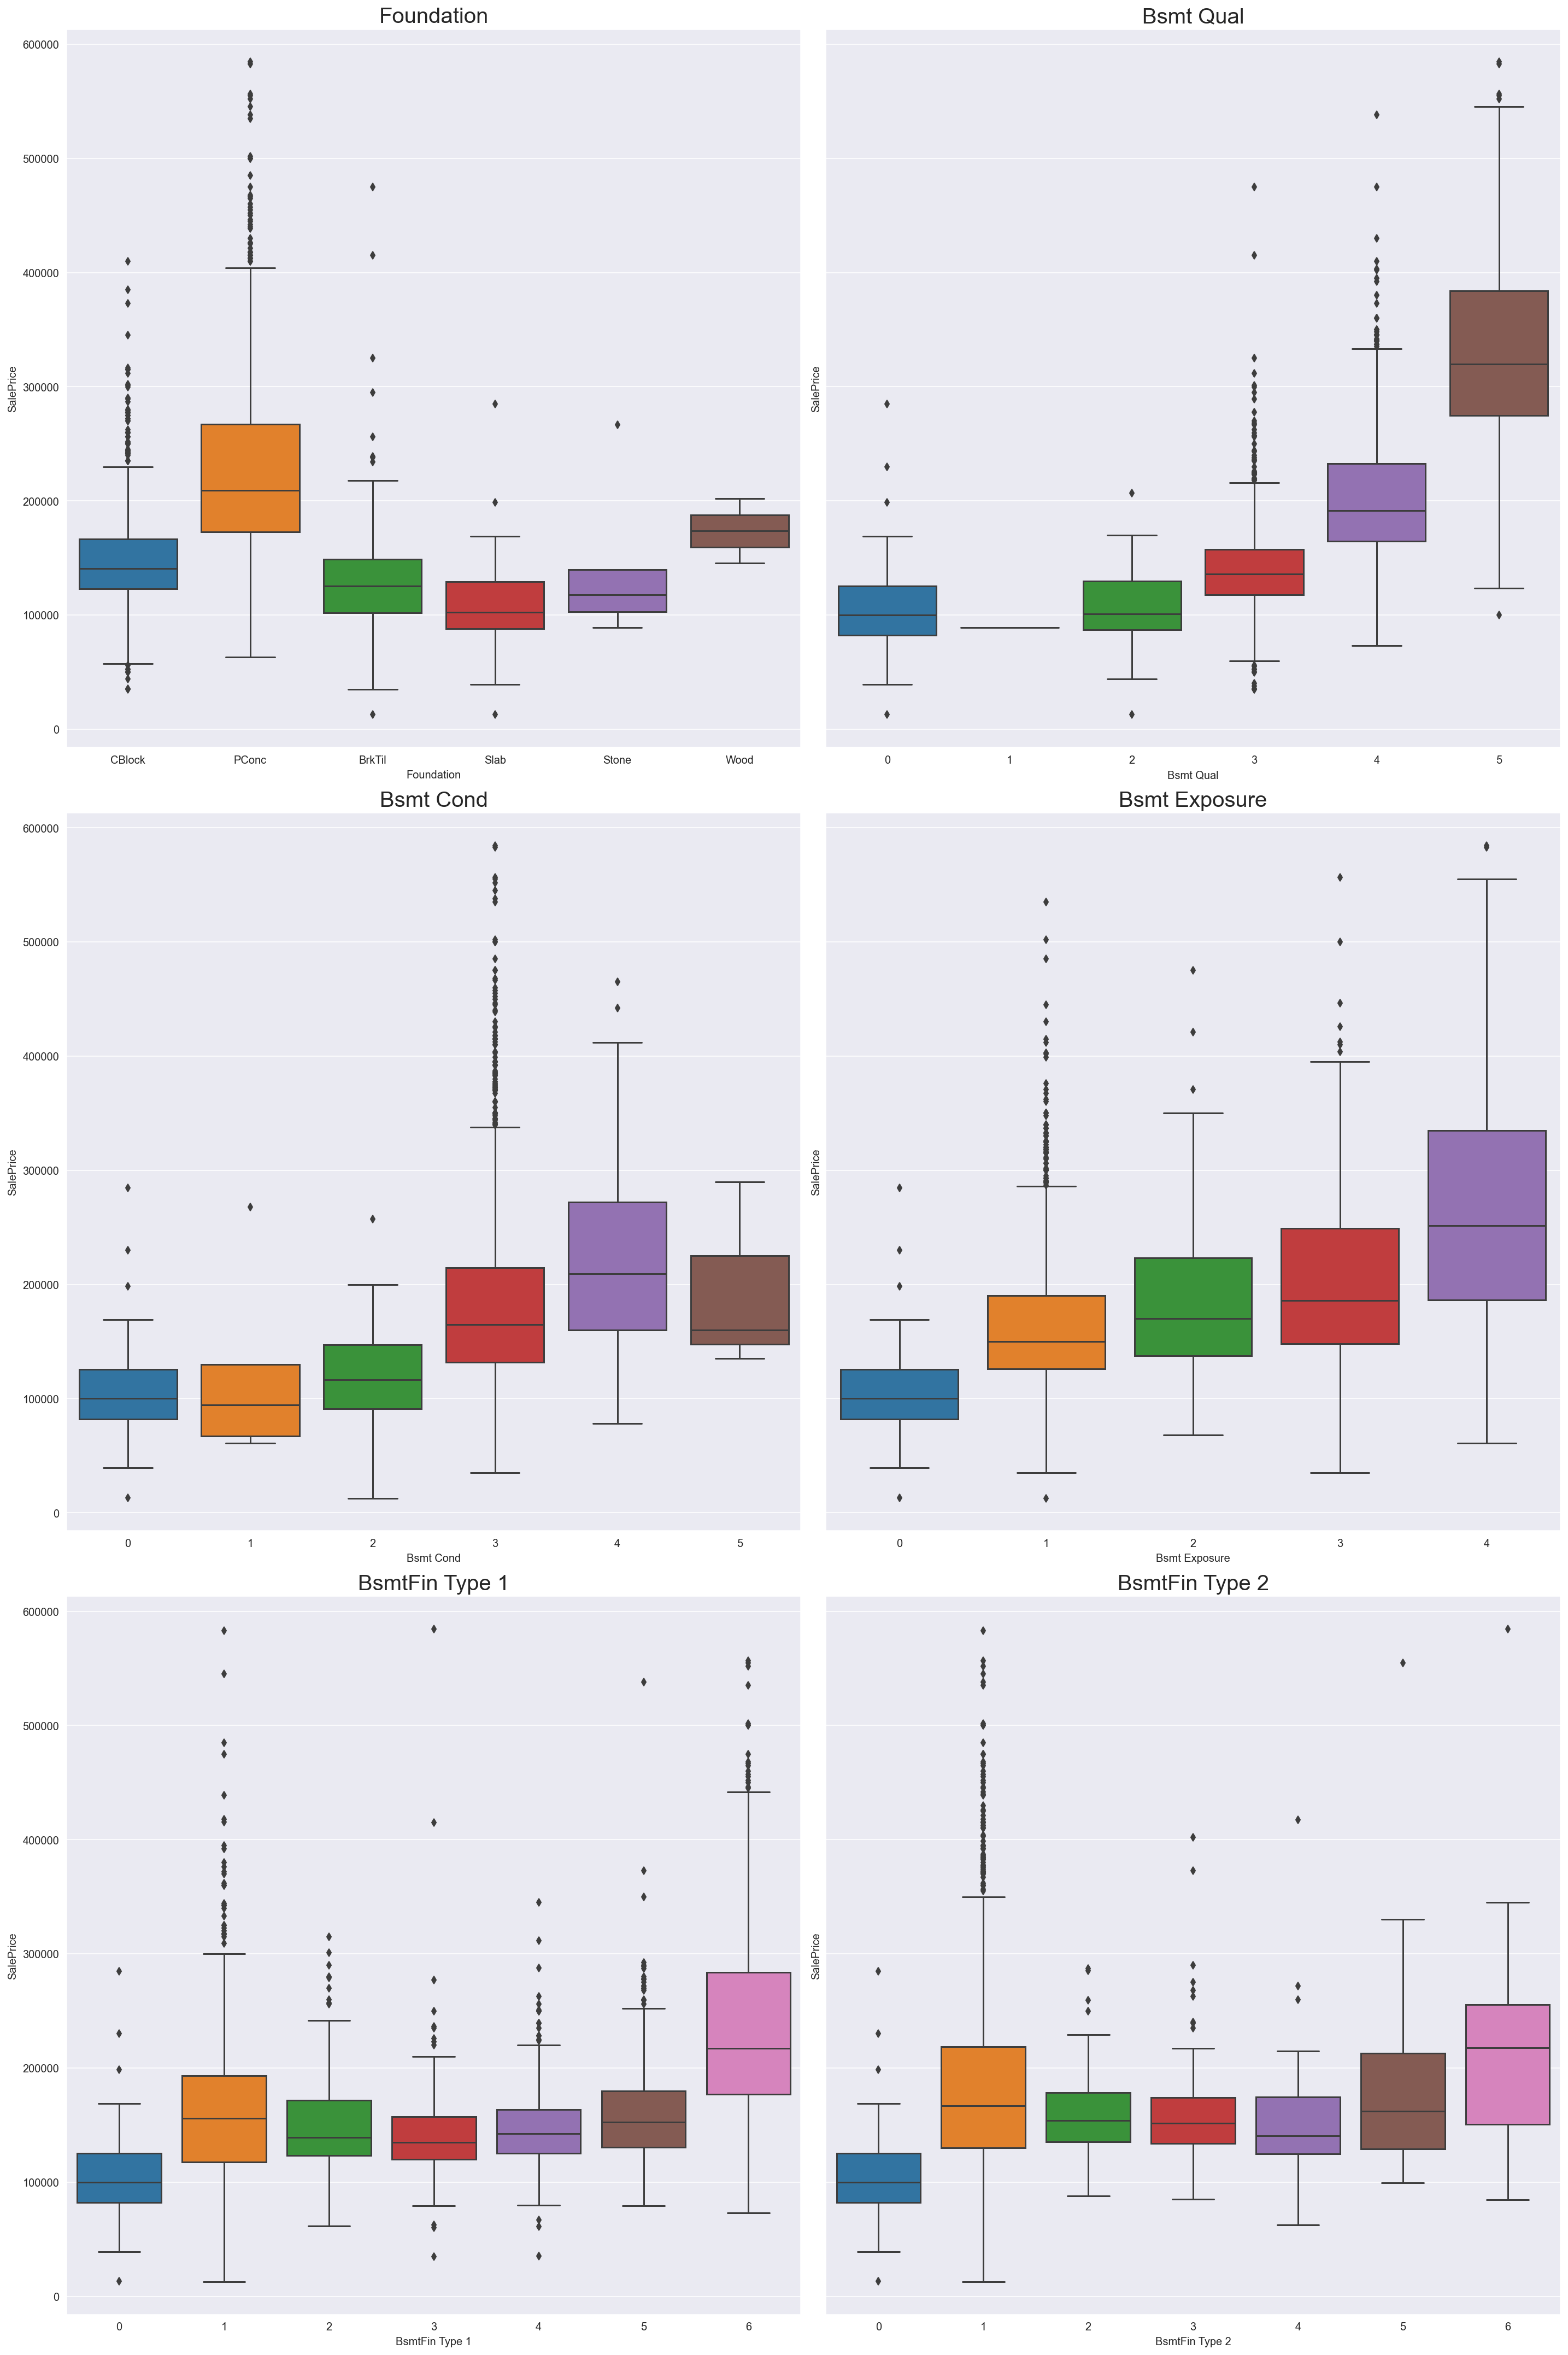

In [59]:
columns = ['Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20,30), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- The material used for foundation matters for determining sale price. Wooden and stone foundations seemed to do better and could be considered as a predictor as well.

- Also, for the basement condition, basement type, basement quality and basement exposure, the better the quality, the higher the average sale price.

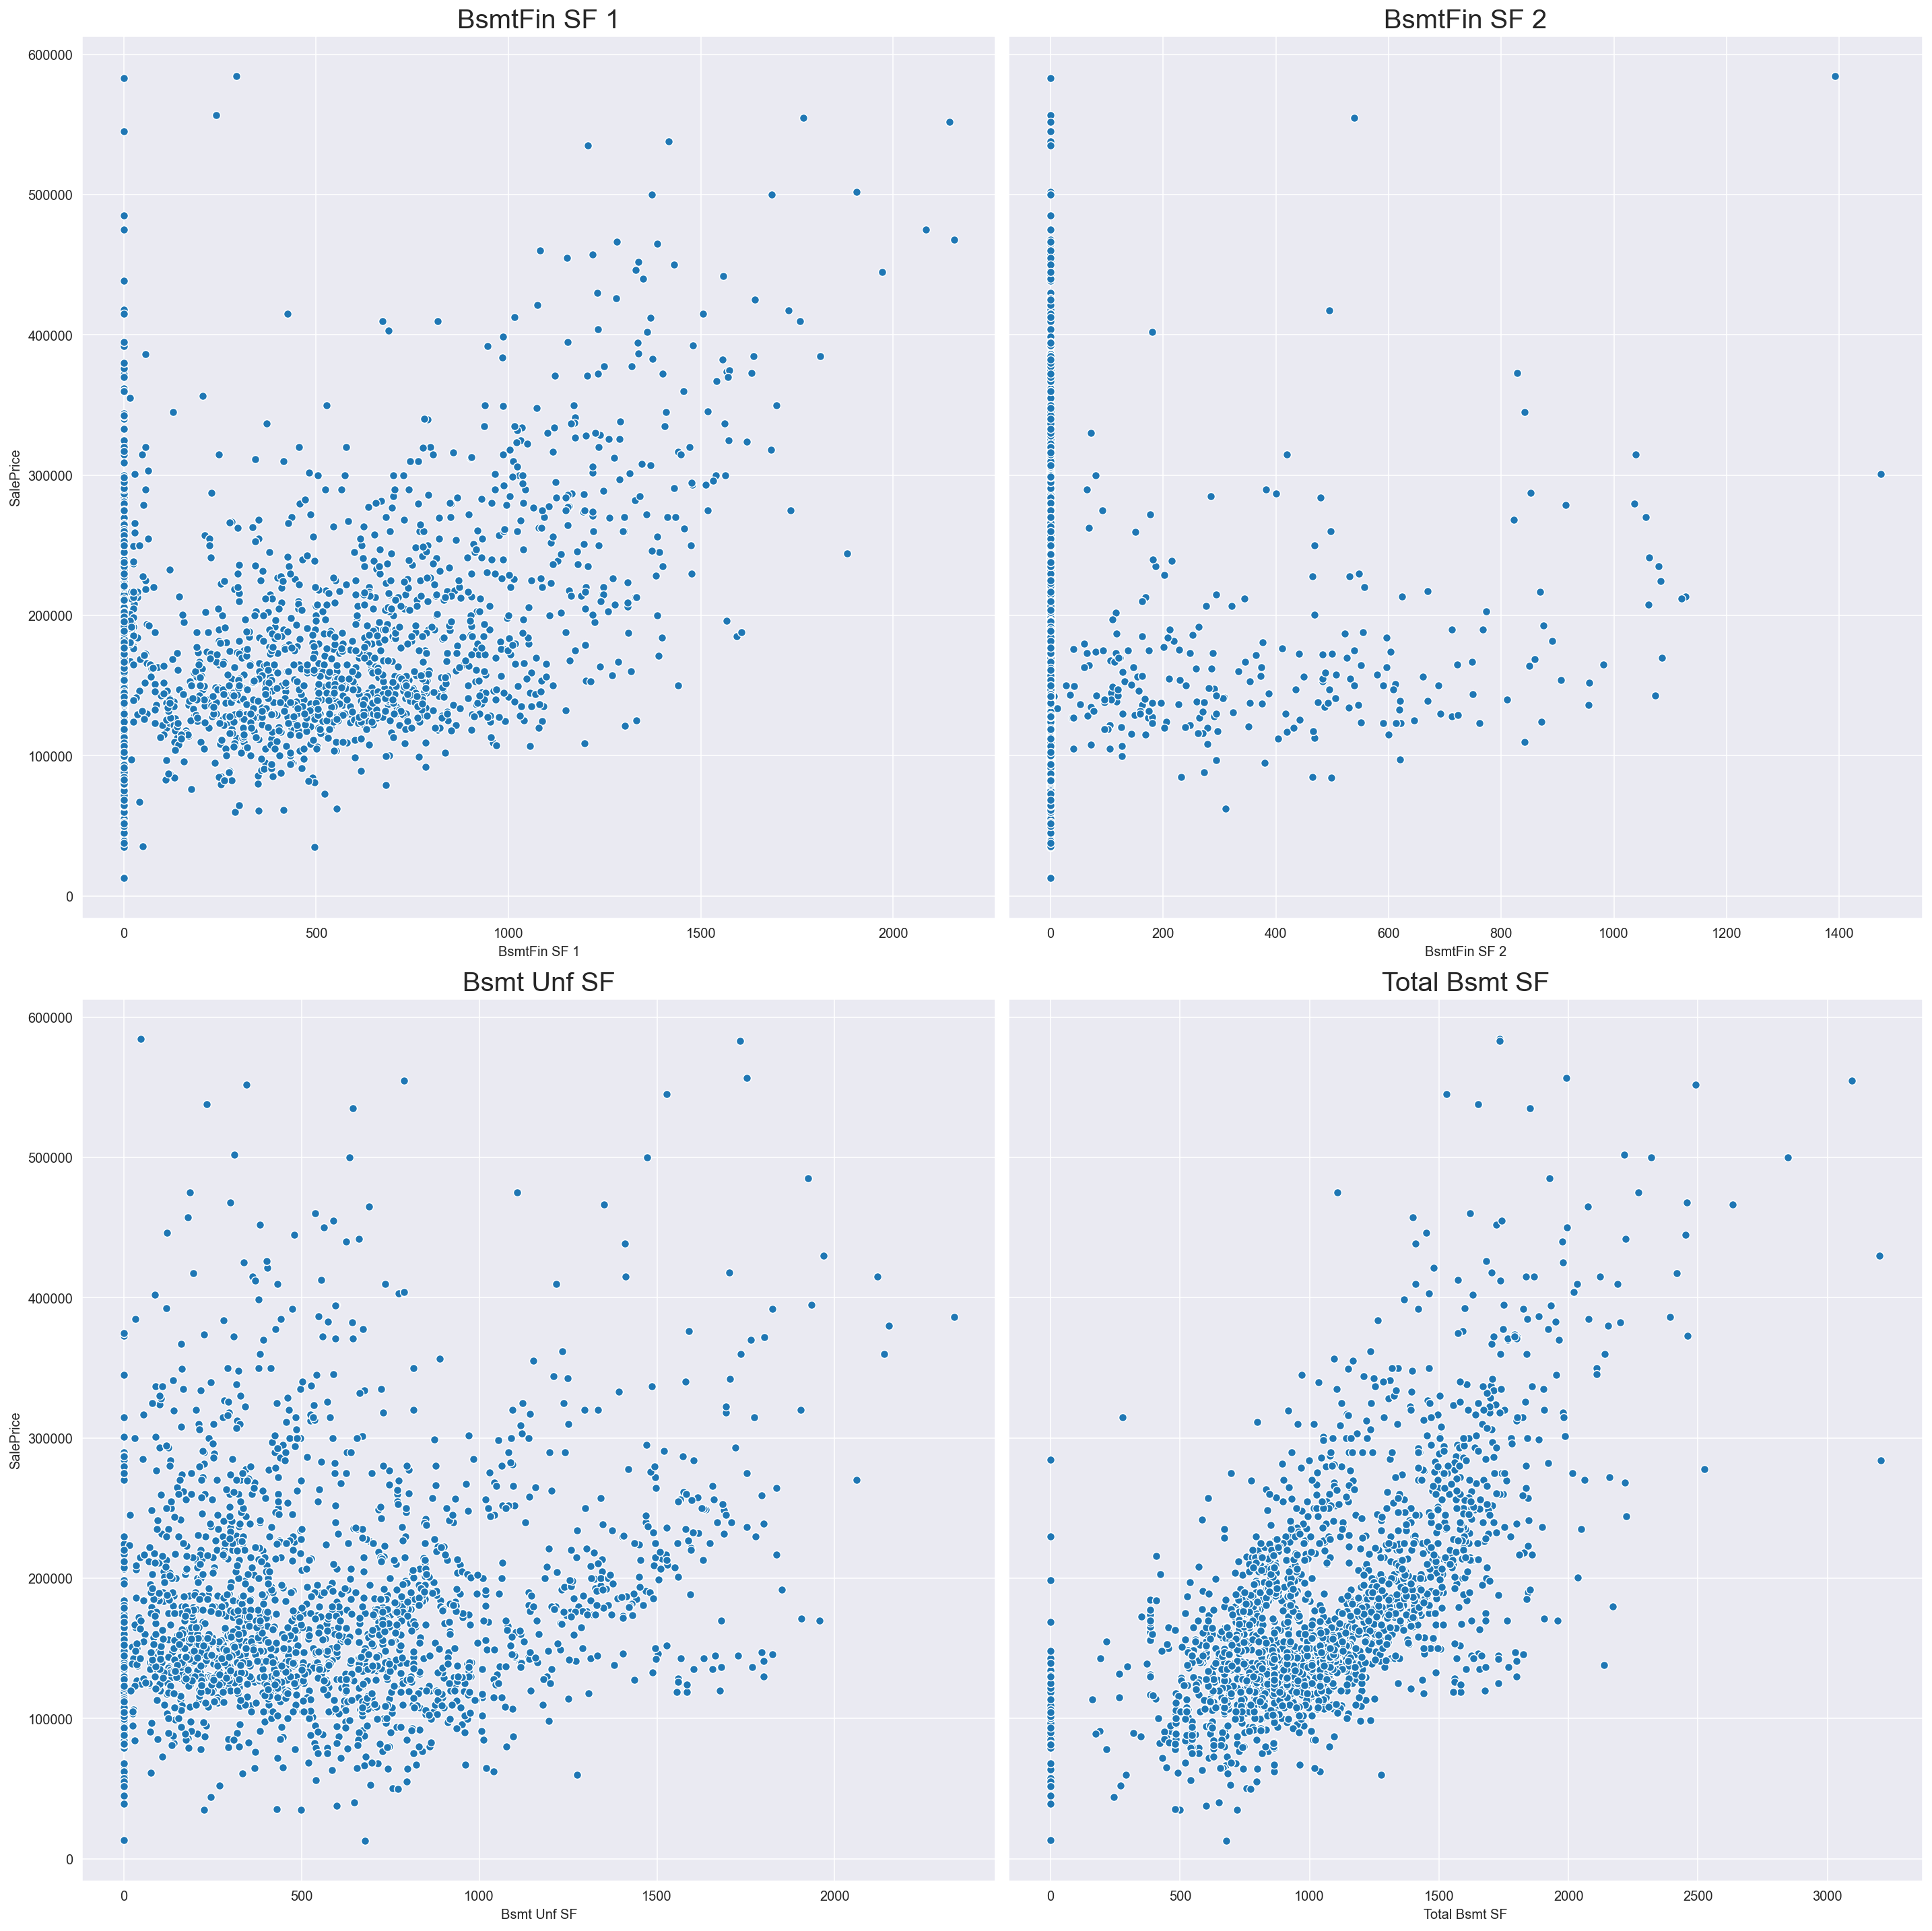

In [60]:
columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- It is also clear that the larger the square feet, the higher the sale price.

**Heating/AC vs Sales Price**

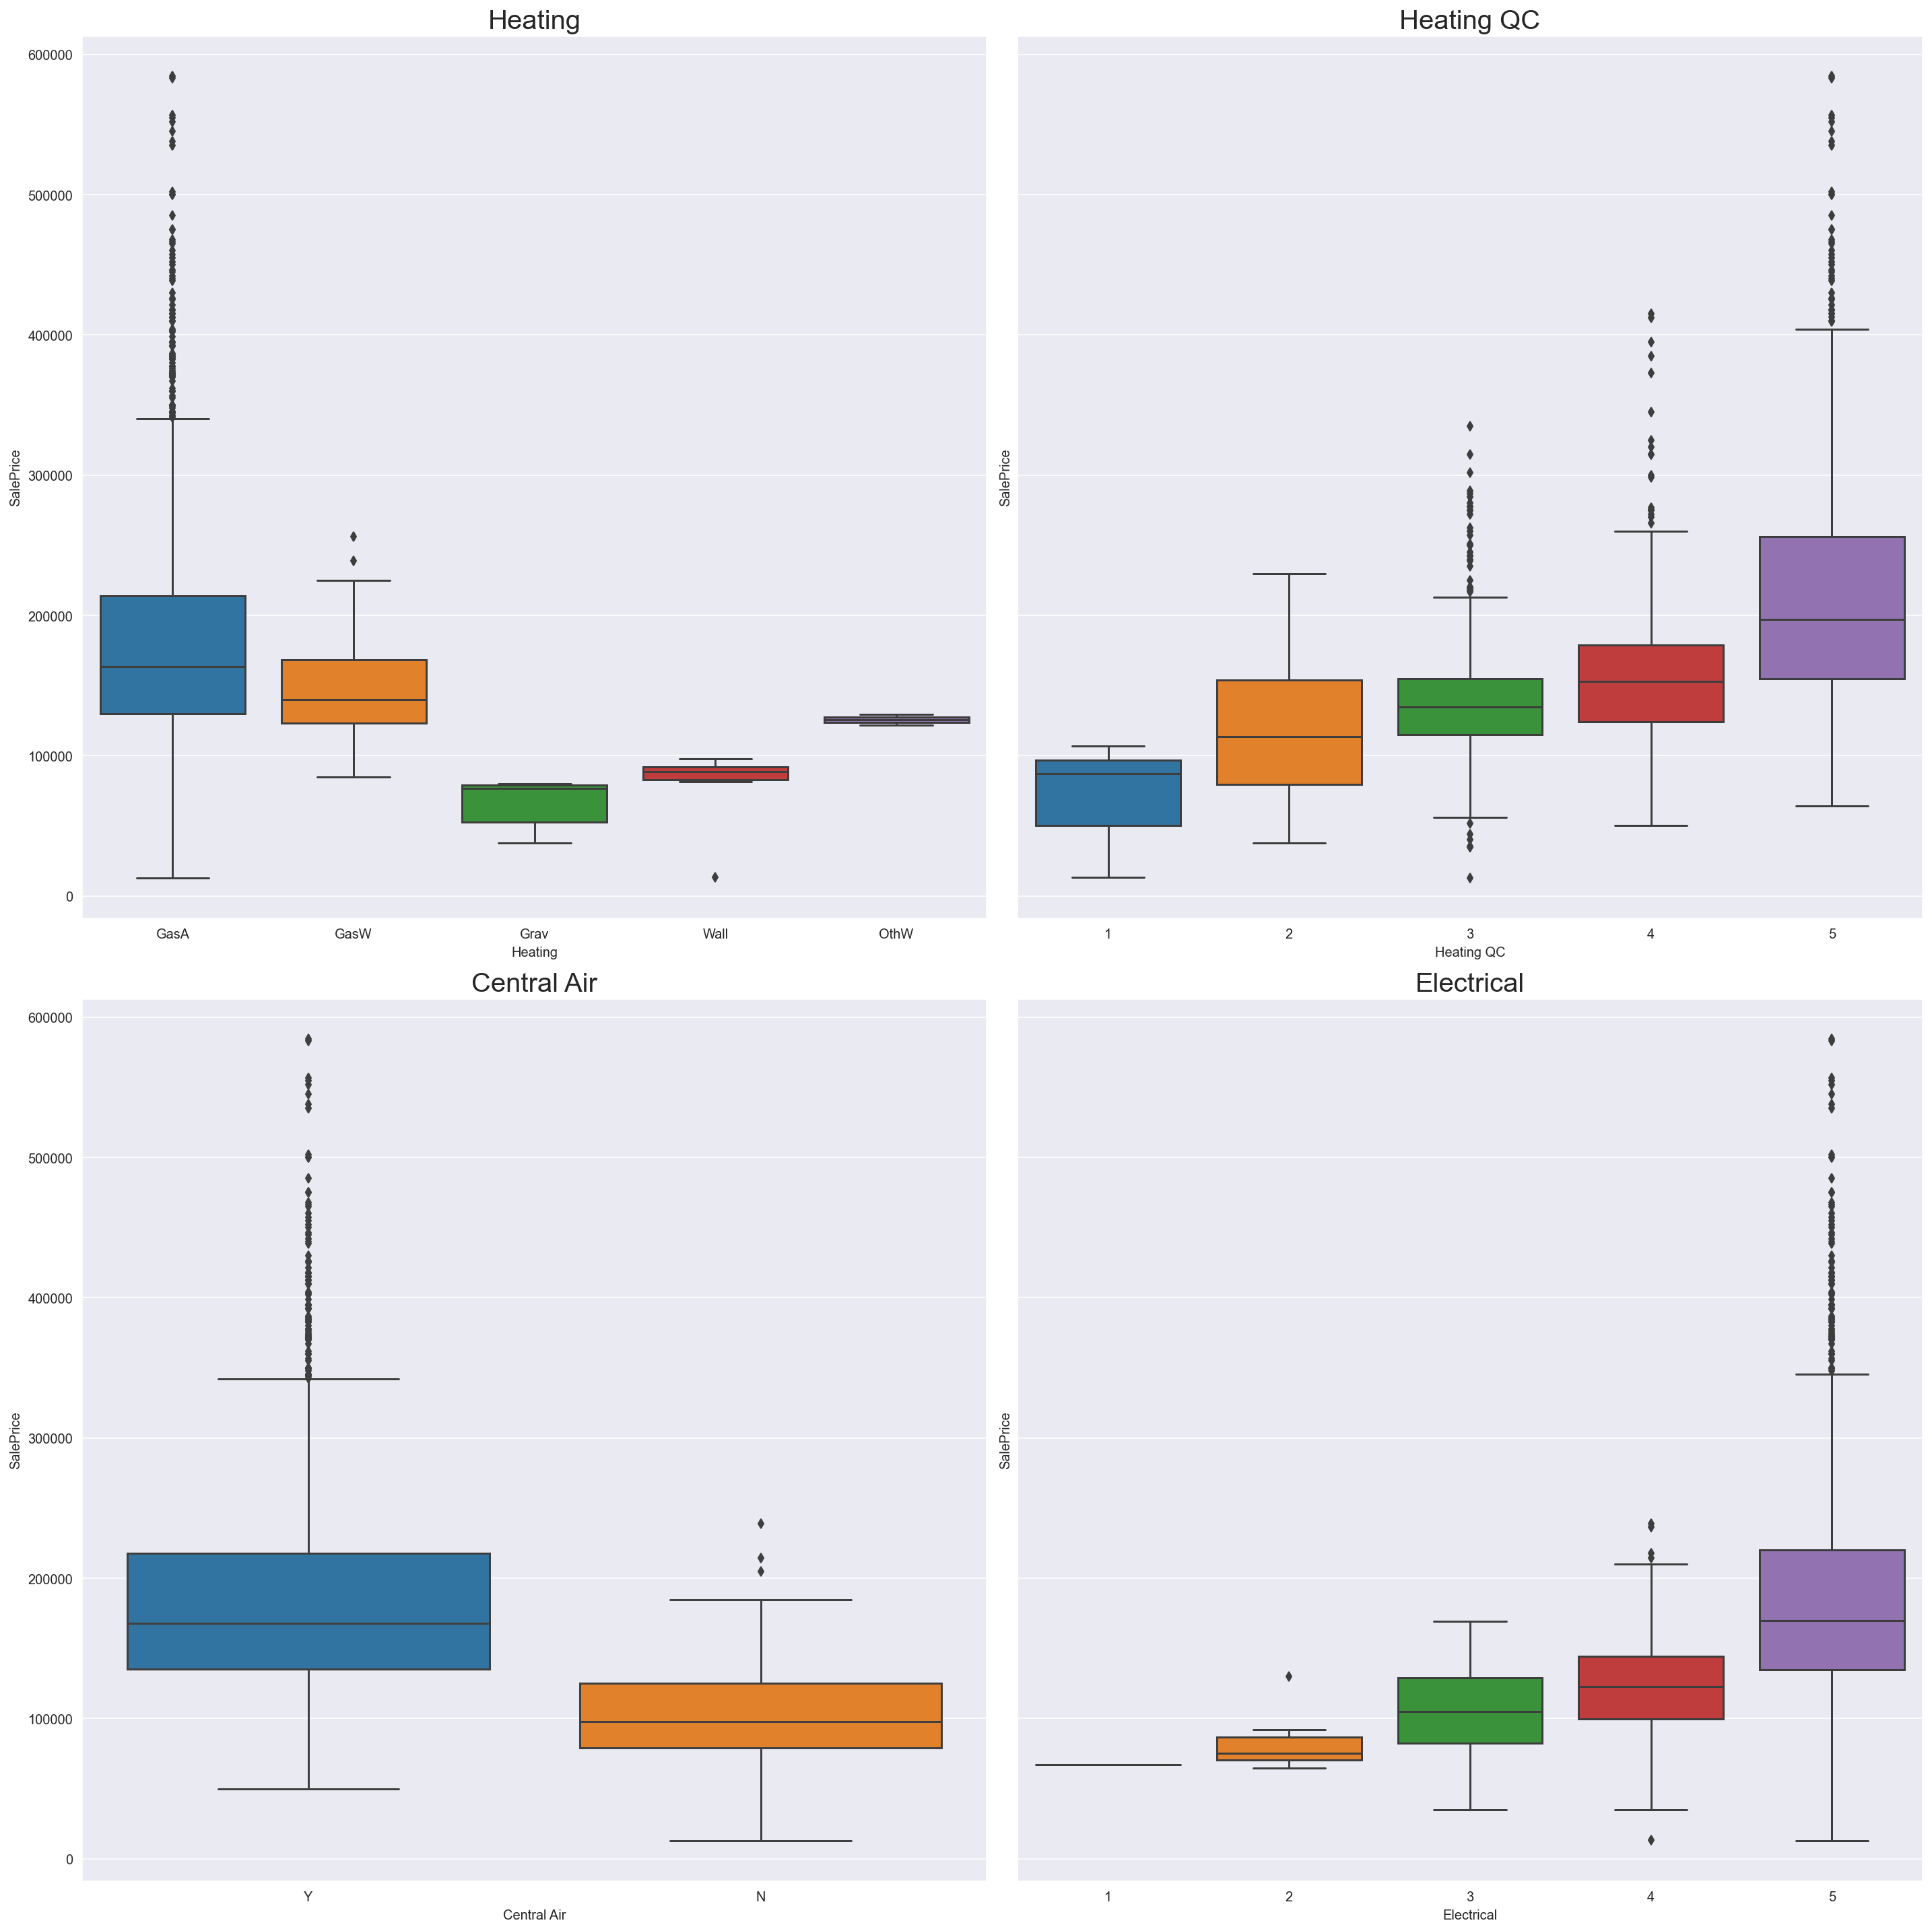

In [61]:
columns = ['Heating', 'Heating QC', 'Central Air', 'Electrical']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- Certain kinds of heating gives higher sale prices. Gravity furnance has a lower value than the rest.

- Also, the higher the quality and condition of the heating, the higher the sale price.

- Properties with central air conditioning also fetched higher sale prices.

- The better the electrical fuse, the higher the average sale prices too

**Rooms/Living Space vs Sales Price**

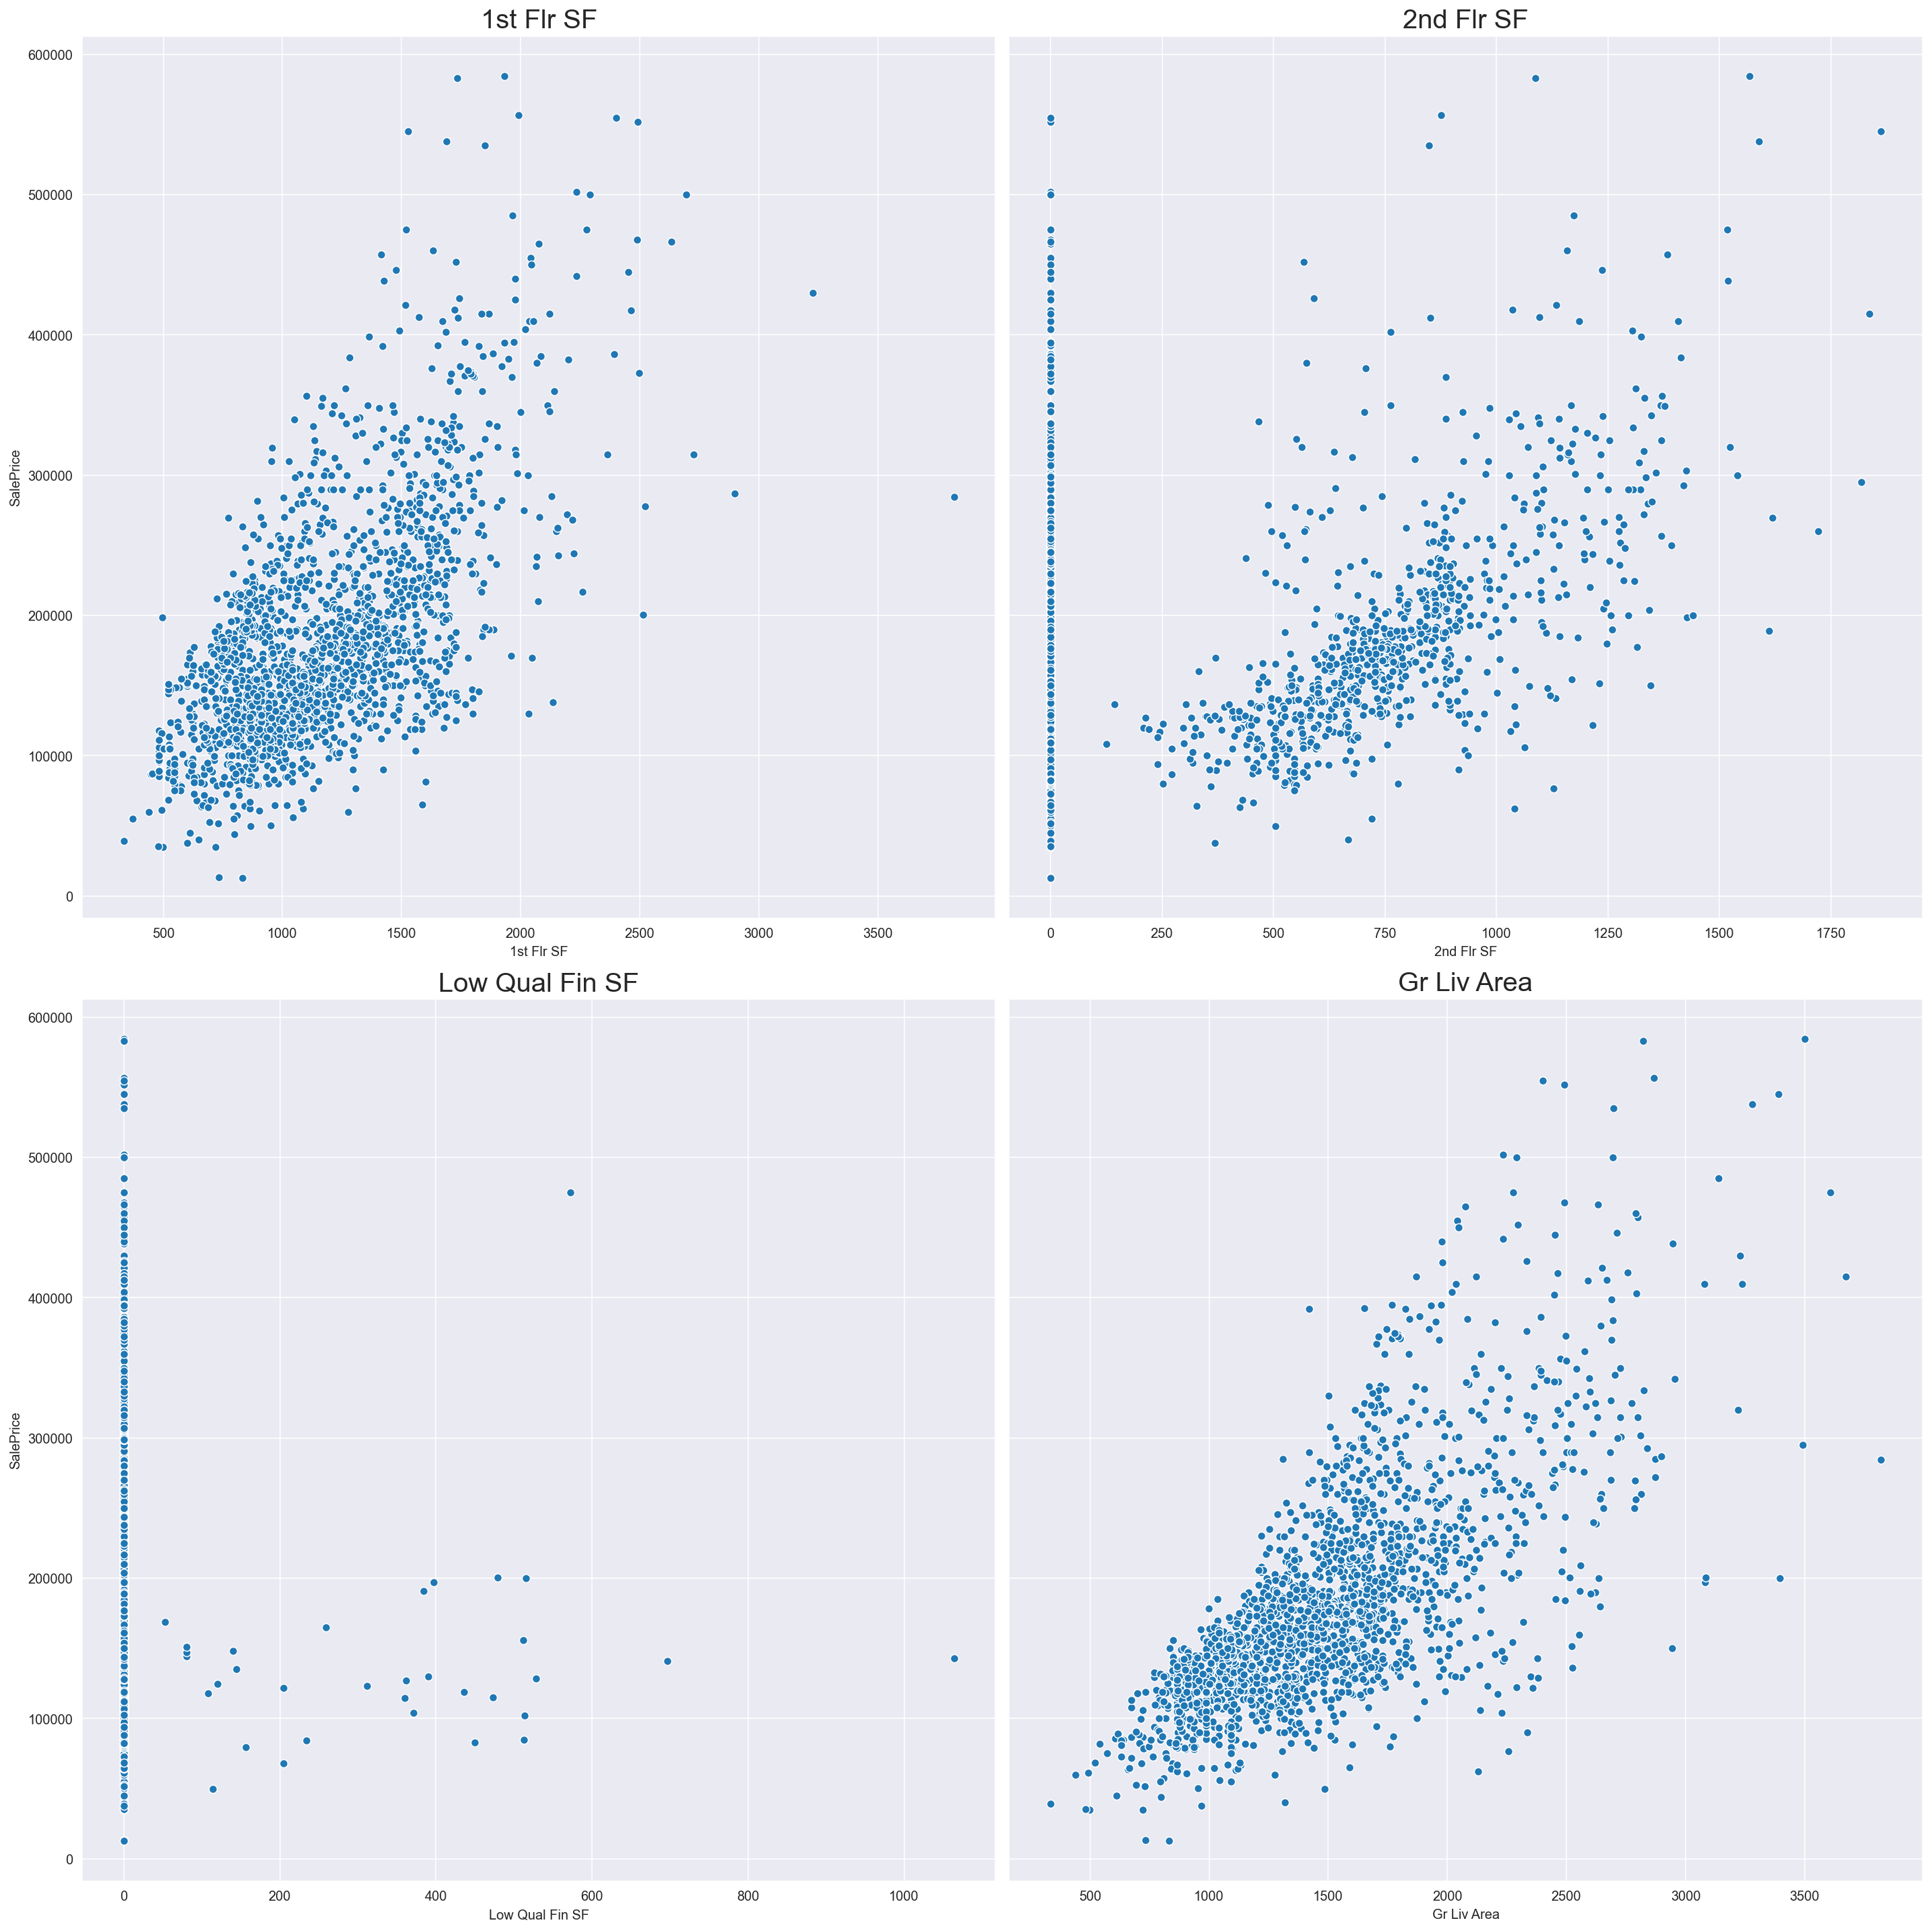

In [62]:
columns = ['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)


- There is a positive linear relationship between the square footage and the sale prices.

`2nd Flr SF` will skew the curve and reduce the accuracy of the prediction because it has many zeroes. This is demonstrated with the graph below

In [63]:
lr_sf = LinearRegression()
lr_sf.fit(housing[['2nd Flr SF']], housing['SalePrice'])
m = lr_sf.coef_[0]
c = lr_sf.intercept_

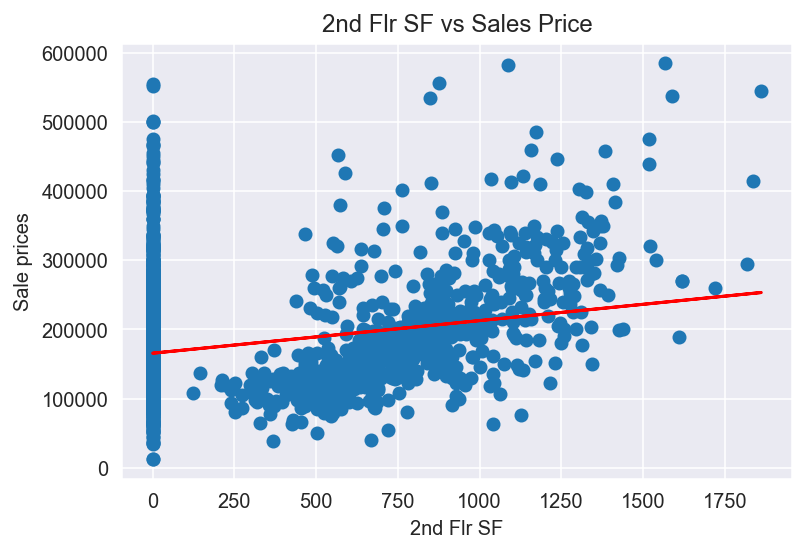

In [64]:
plt.scatter(housing['2nd Flr SF'],housing['SalePrice'])
x = housing['2nd Flr SF']
y = m*x + c
plt.plot(x, y, color='r')
plt.title("2nd Flr SF vs Sales Price")
plt.xlabel('2nd Flr SF')
plt.ylabel('Sale prices');

In [65]:
lr_tsf = LinearRegression()
lr_tsf.fit(housing[['Gr Liv Area']], housing['SalePrice'])
m = lr_tsf.coef_
c = lr_tsf.intercept_

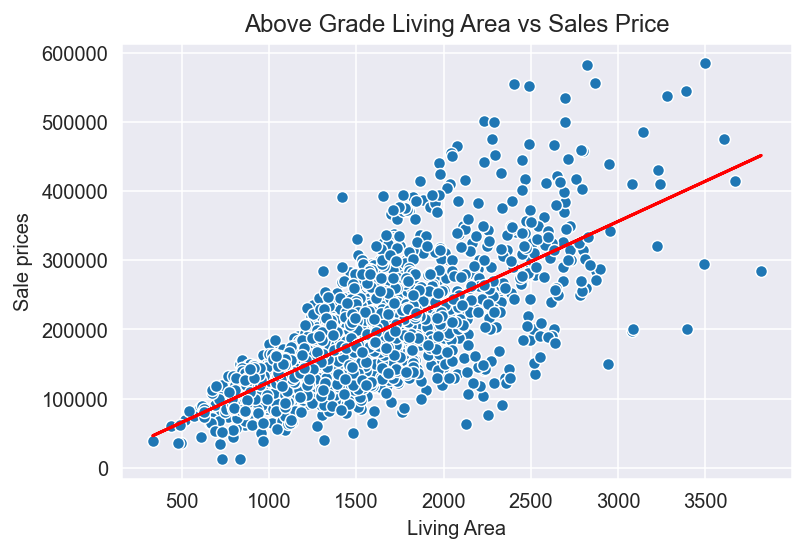

In [66]:
sns.scatterplot(housing['Gr Liv Area'],housing['SalePrice'])
x = housing[['Gr Liv Area']]
y = m*x + c
plt.plot(x,y,color='r')
plt.title("Above Grade Living Area vs Sales Price")
plt.xlabel('Living Area')
plt.ylabel('Sale prices');

- `1st Flr SF` and `2nd Flr SF` will be dropped as `Gr Liv Area` is a better predictor. This is to avoid double counting.

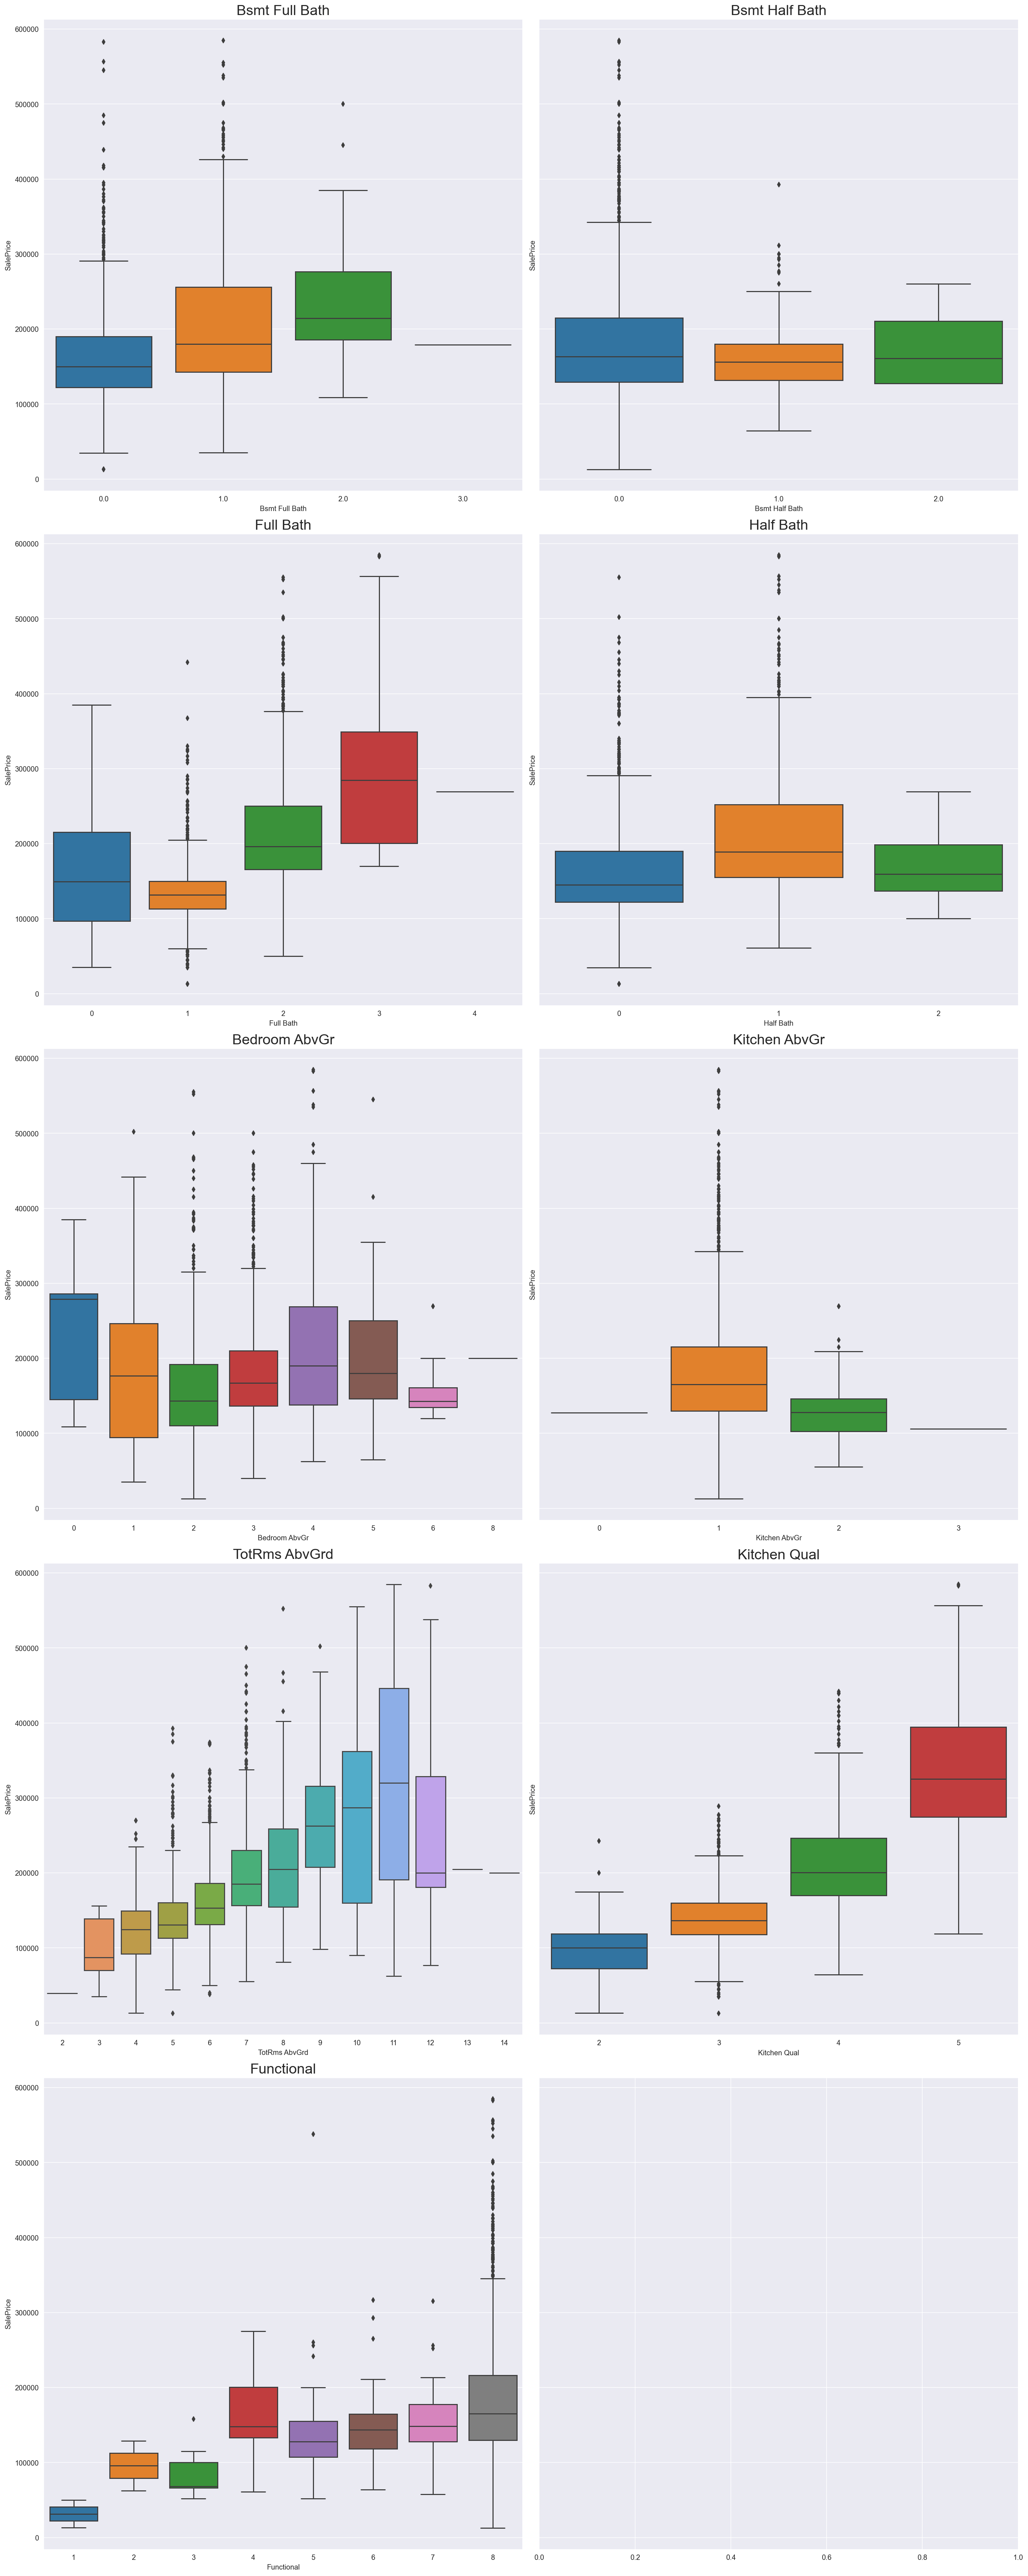

In [67]:
columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath','Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
           'TotRms AbvGrd','Kitchen Qual','Functional']

fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (20,50), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- The general trend is the more rooms the properties have, the higher the sale price. However, for half bath rooms, that is not the case.
- The better the quality of the kitchen, the higher the sale price.
- Also, the lower the functionality, the lower the sale price.

**Fireplace vs Sales Price**

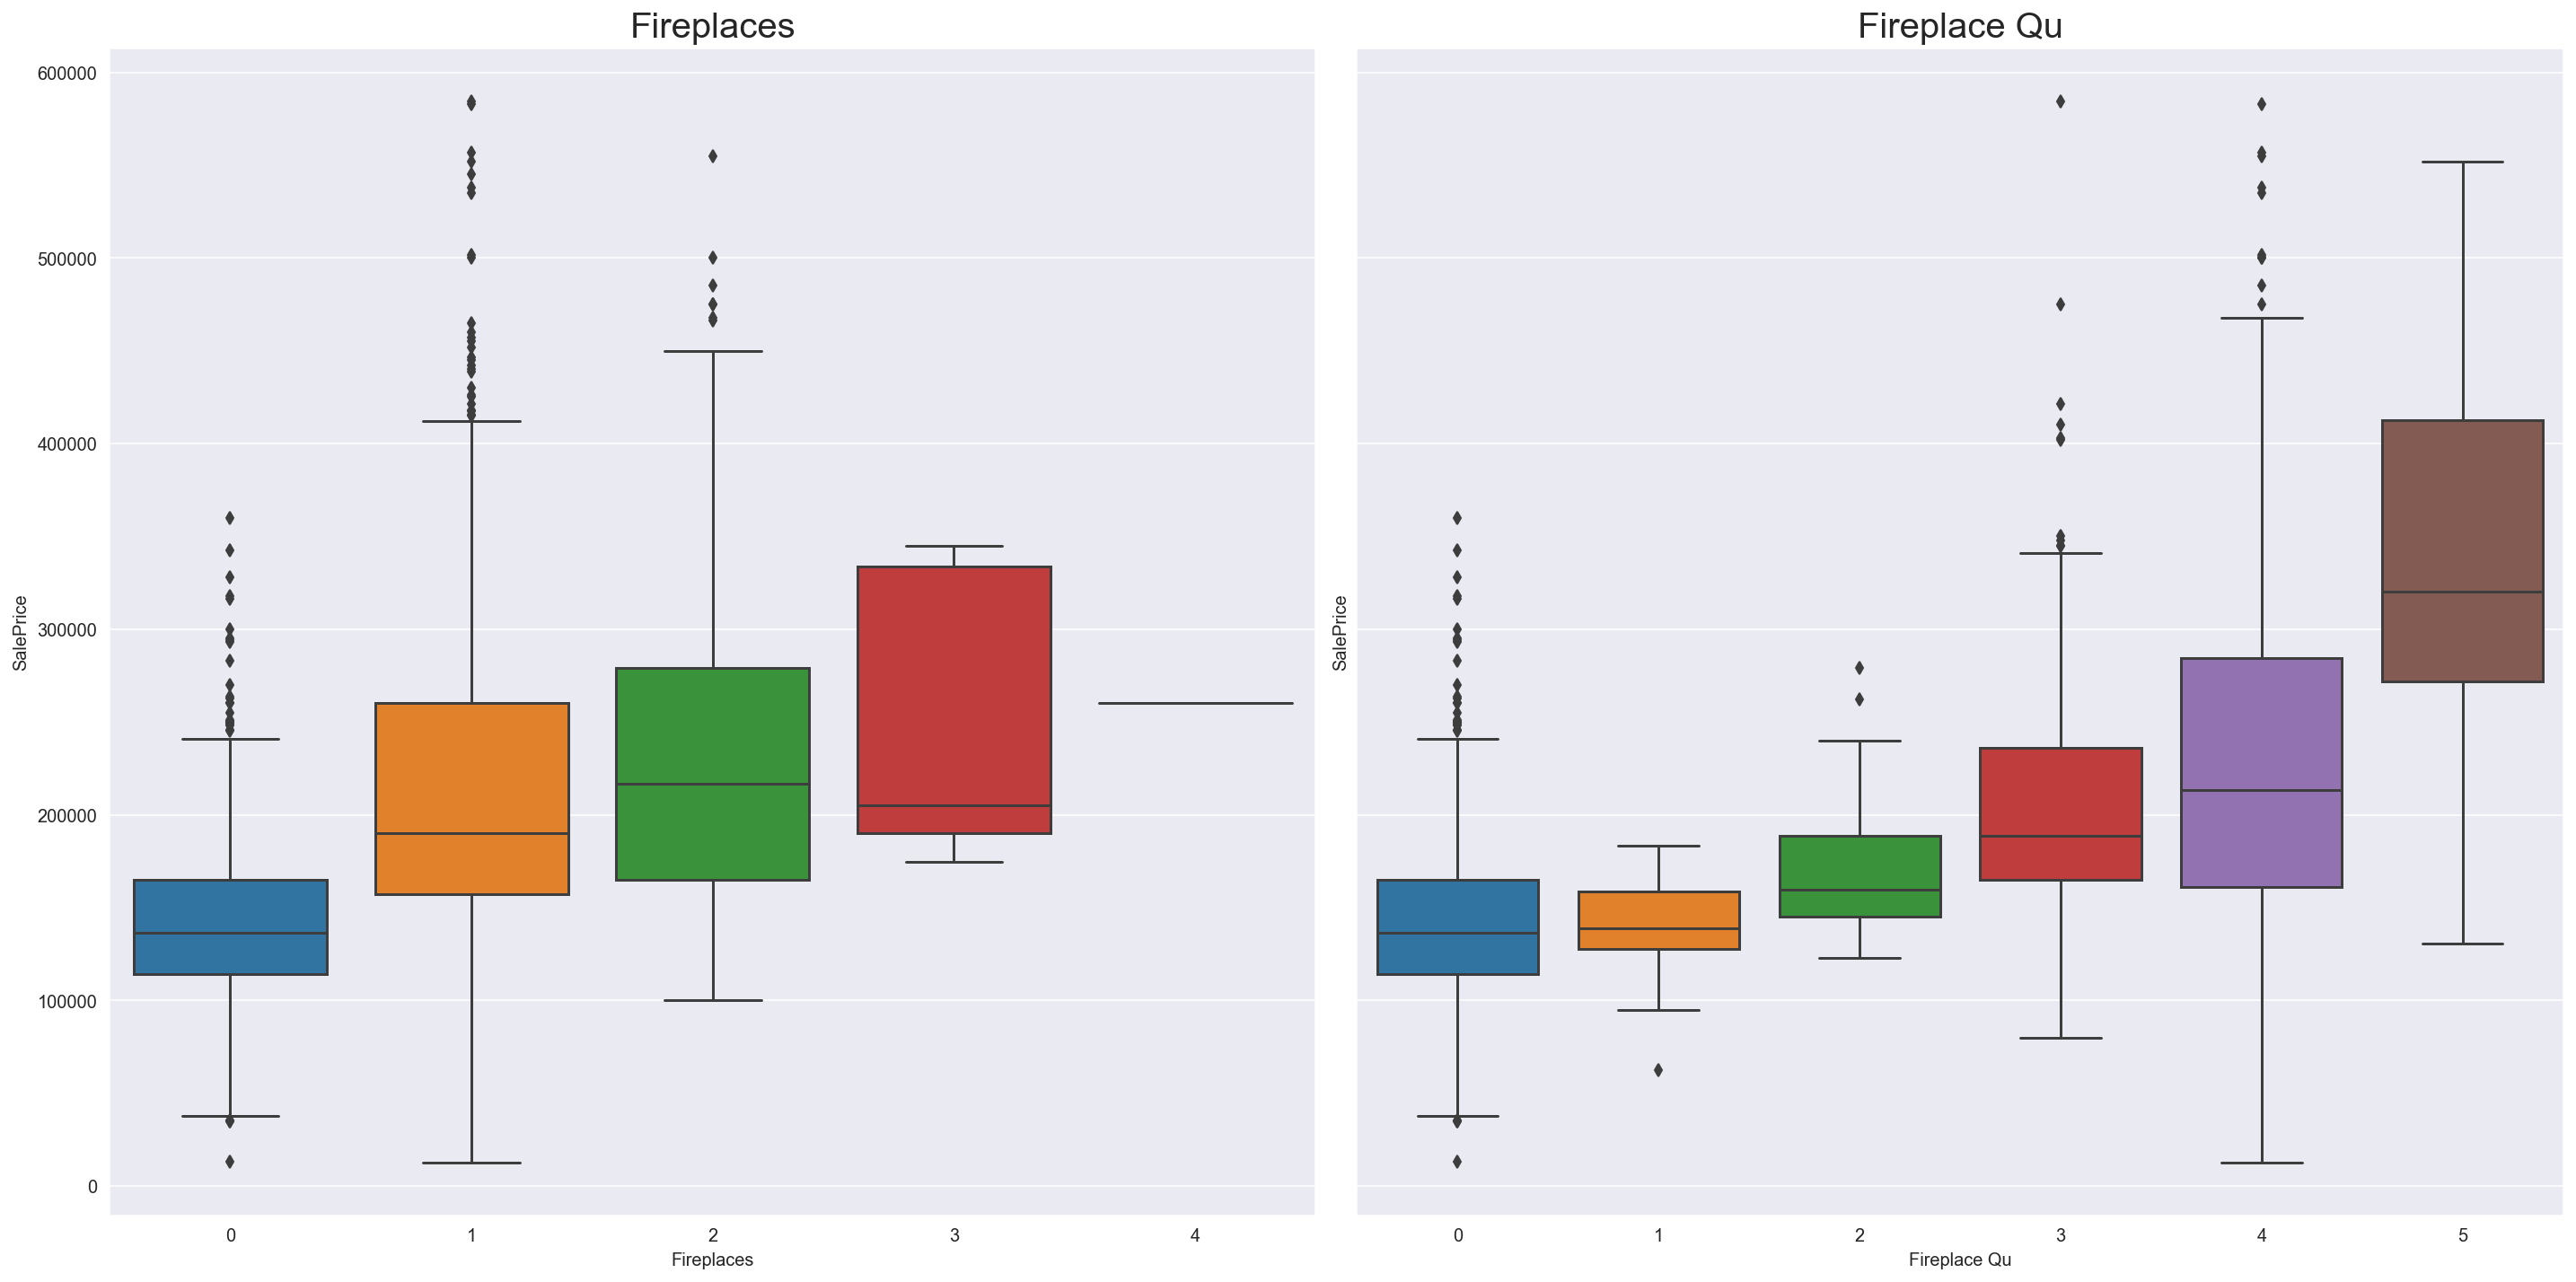

In [68]:
columns = ['Fireplaces', 'Fireplace Qu']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- It is very clear that the more fireplaces and the better the quality, the higher the sale prices.

**Garage vs Sales Price**

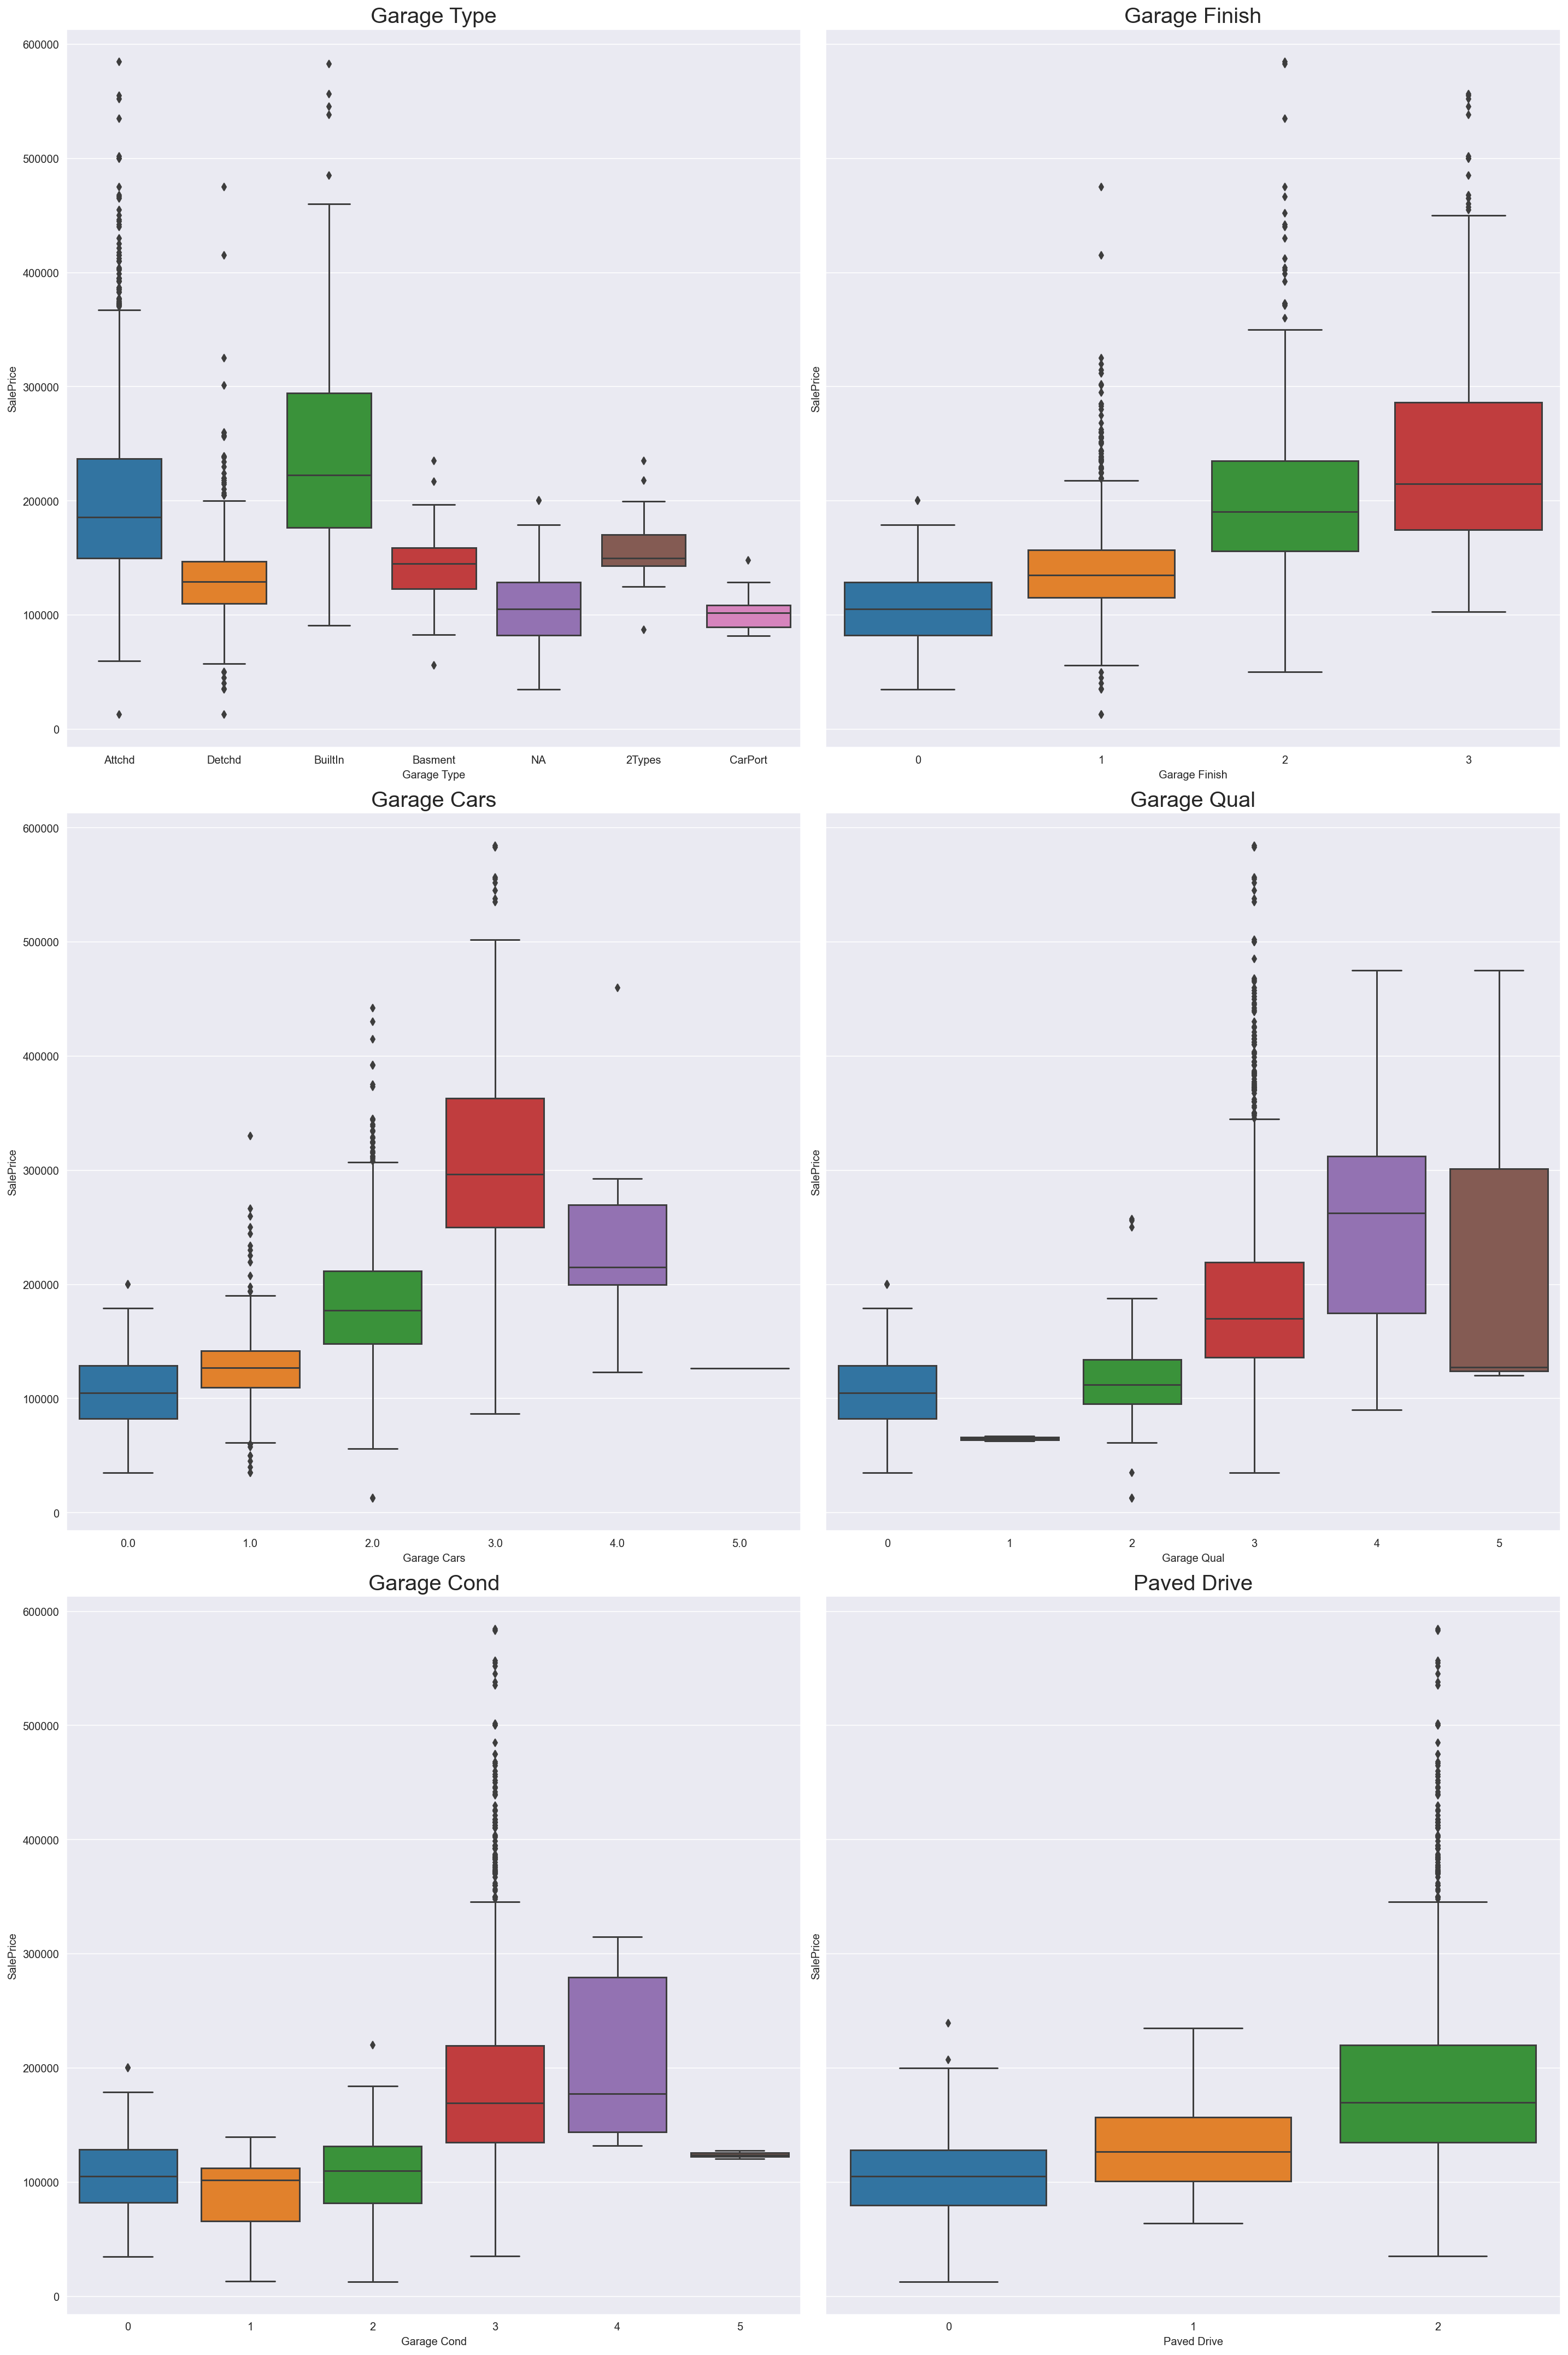

In [69]:
columns = ['Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive',]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20,30), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.boxplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)

- Finished garage has higher sale prices while having no garage fetch the worst sale prices
- The larger the garage, the higher the sale price, except when it goes beyond 3 cars, the increase diminishes.
- The higher the quality of the garage and its condition, the higher the price. However, excellent garage condition fetch worse prices than good garage condition
- Paved garages also give higher prices

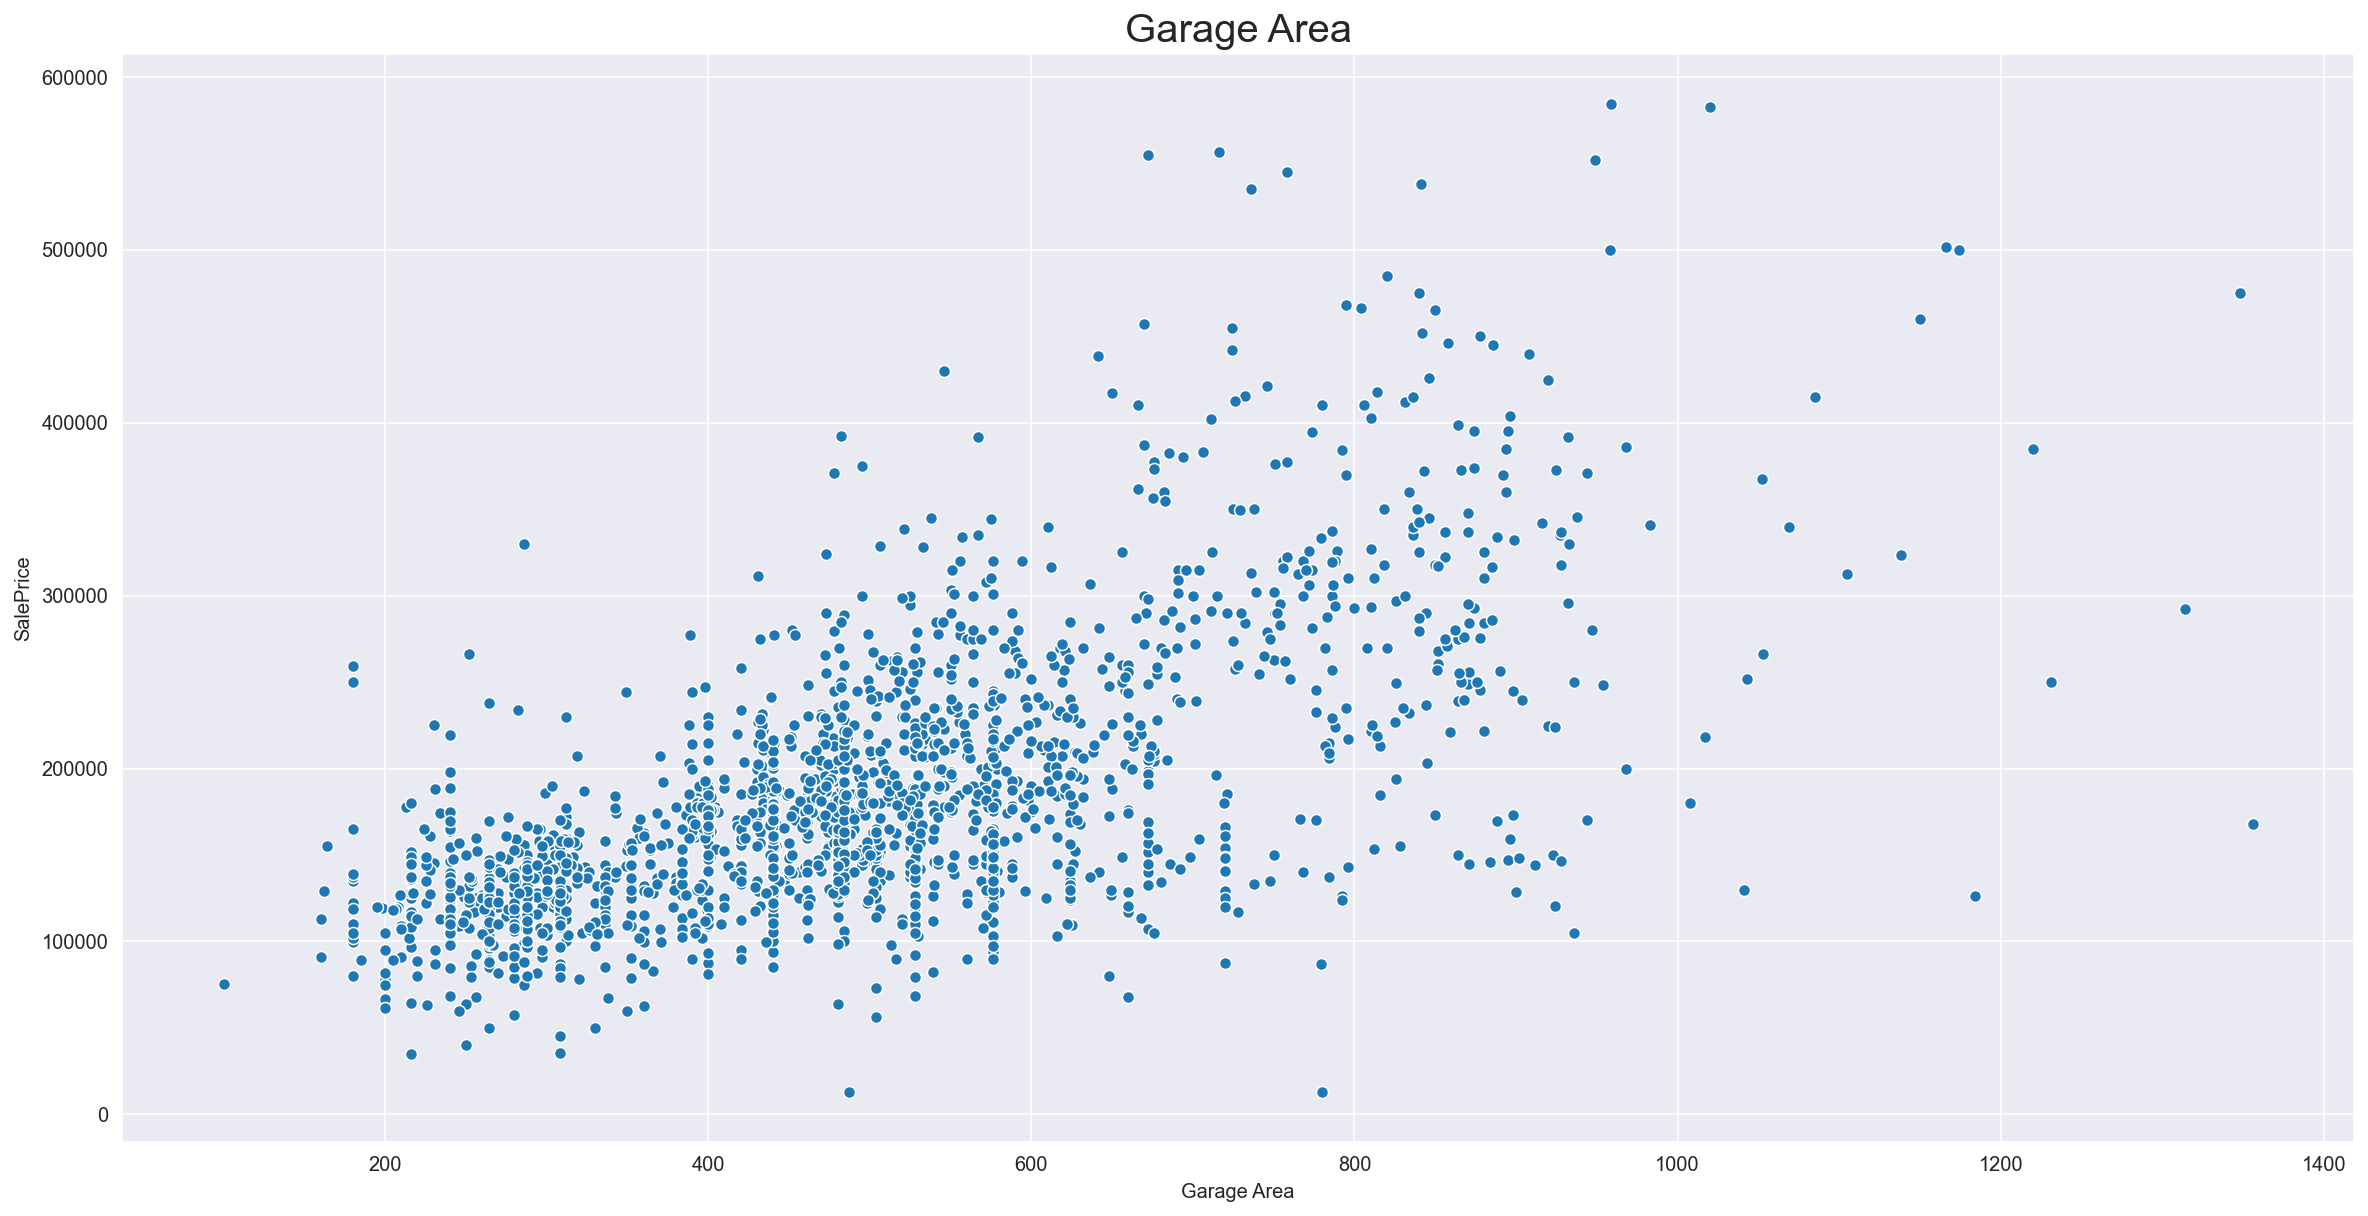

In [70]:
columns = ['Garage Area']
plt.figure(figsize=(20,10))
sns.scatterplot(housing['Garage Area'][housing['Garage Area']>0], housing['SalePrice'])
plt.title('Garage Area',size=20)
fig.tight_layout(pad=1.0)

- There is a positive linear relationship between the garage area and the sales price. This would be an excellent predictor. However, the number of cars `Garage Cars` will be dropped to avoid double counting.

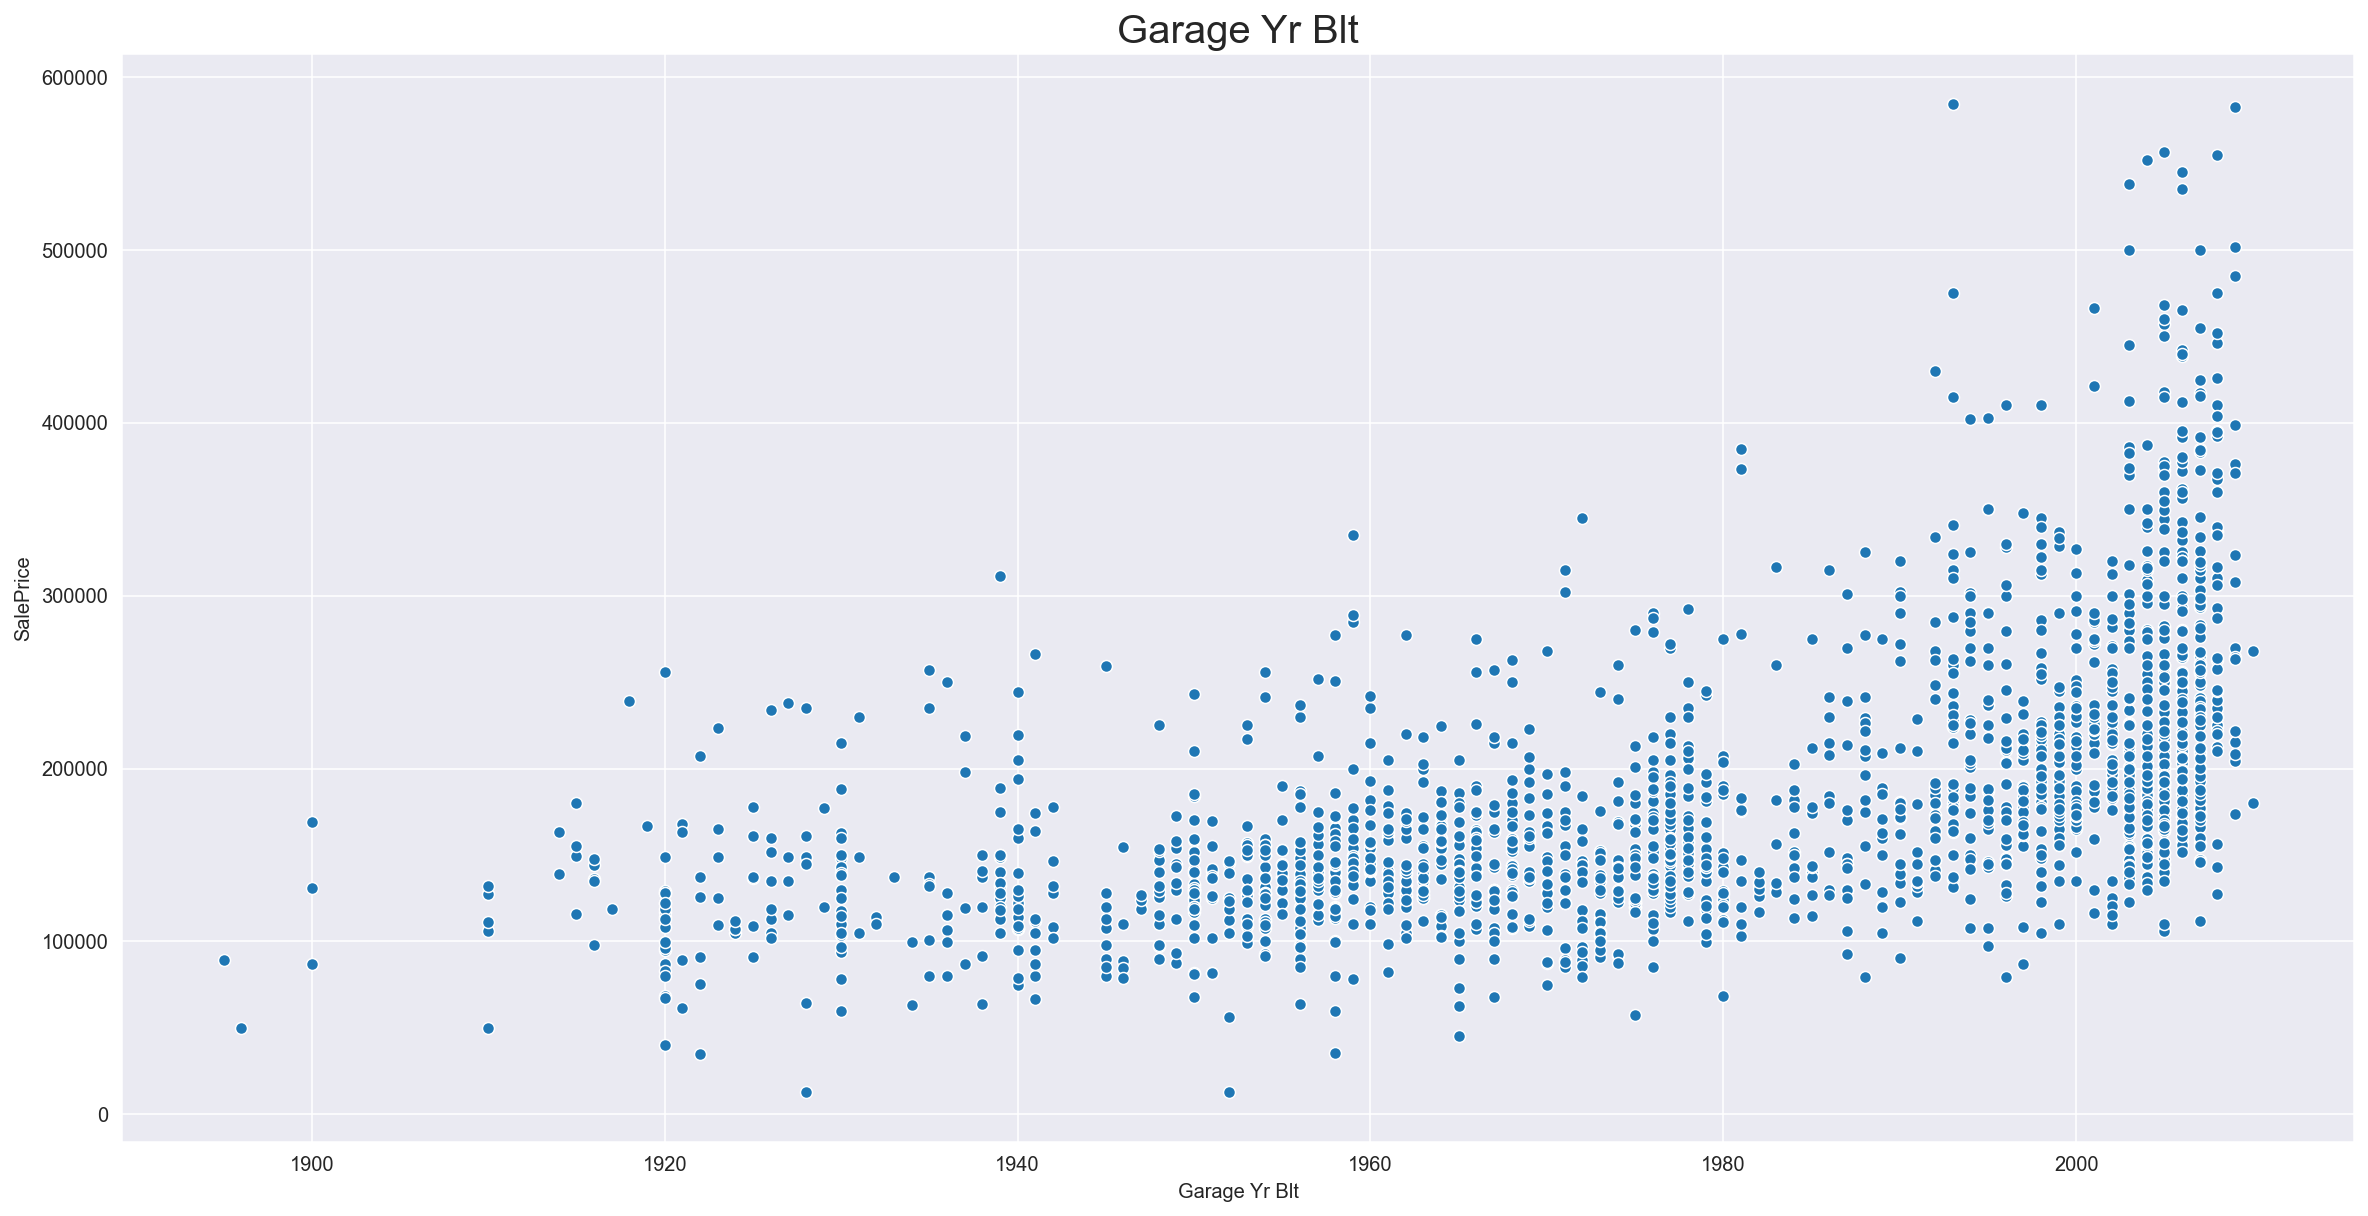

In [71]:
columns = ['Garage Yr Blt']
plt.figure(figsize=(20,10))
sns.scatterplot(housing['Garage Yr Blt'][housing['Garage Yr Blt']>0], housing['SalePrice'])
plt.title('Garage Yr Blt',size=20)
fig.tight_layout(pad=1.0)

- The newer it was built, the higher price it fetched.

**Porch vs Sales Price**

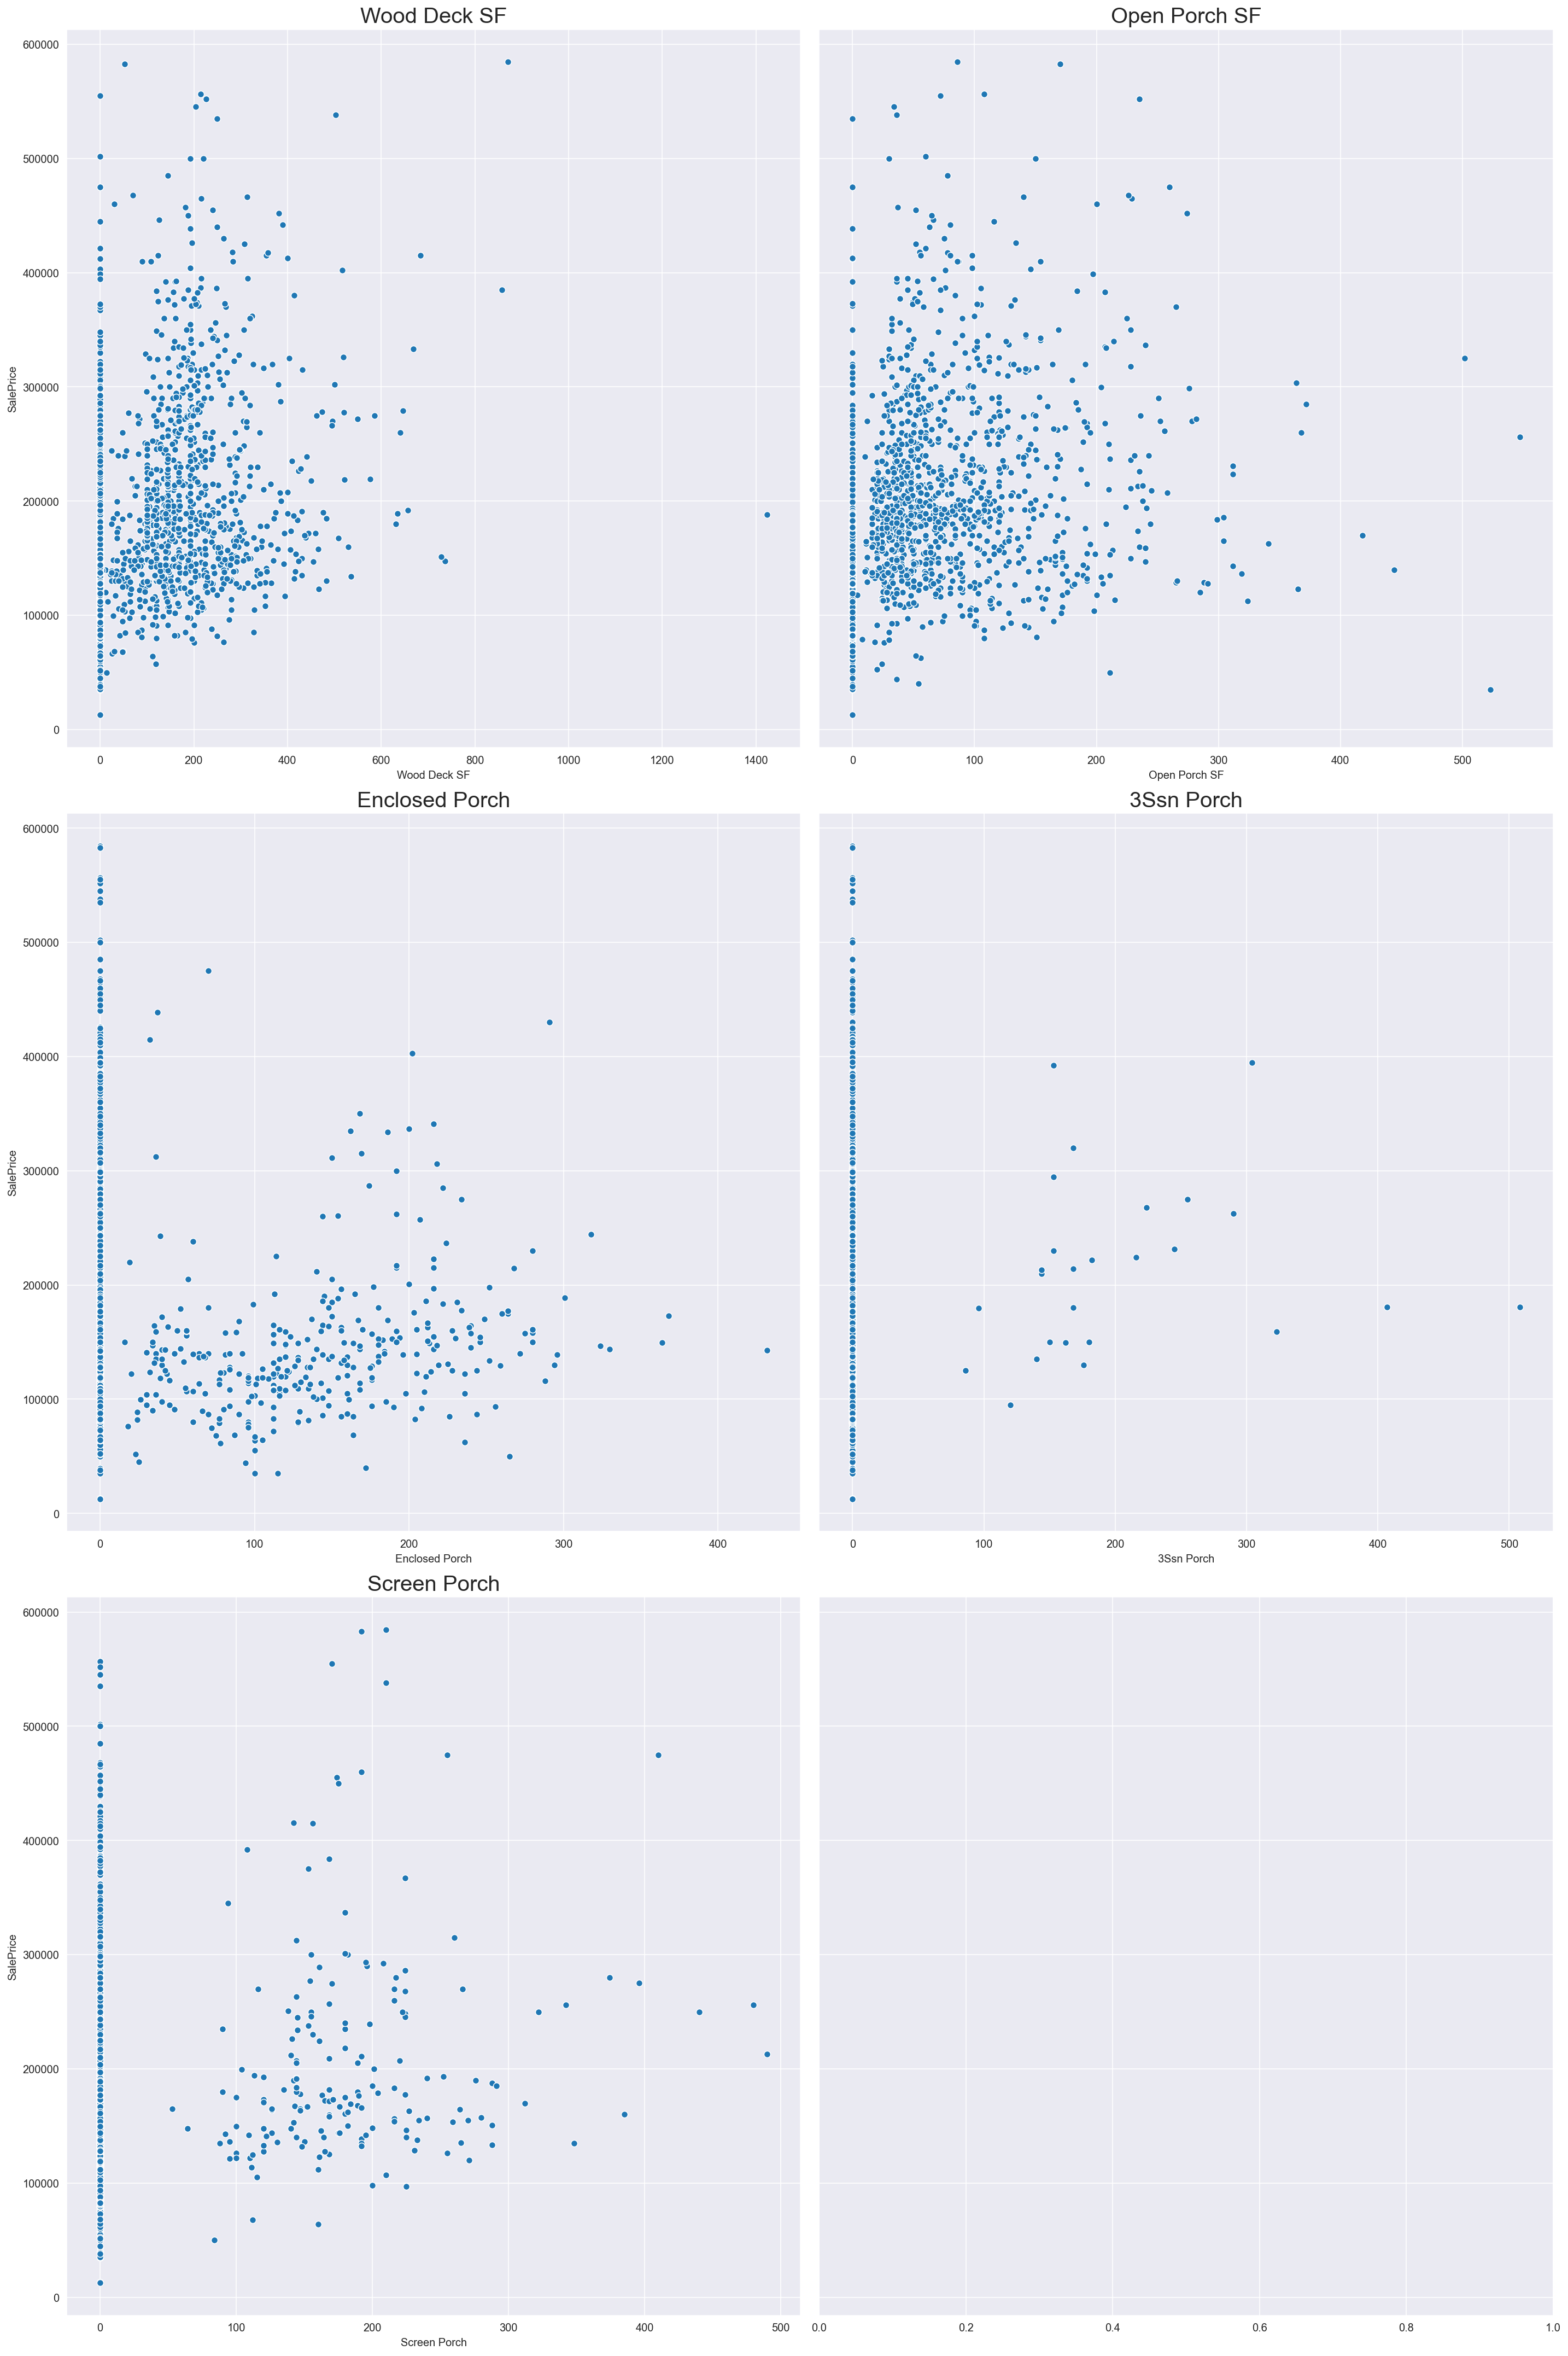

In [72]:
columns = ['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20,30), sharey=True)
ax = ax.ravel()
for i, column in enumerate(columns):
    sns.scatterplot(housing[column], housing['SalePrice'],ax = ax[i])
    ax[i].set_title(column,size=20)
fig.tight_layout(pad=1.0)


The larger the porch, the higher the price it fetched

**Other Feature vs Sales Price**

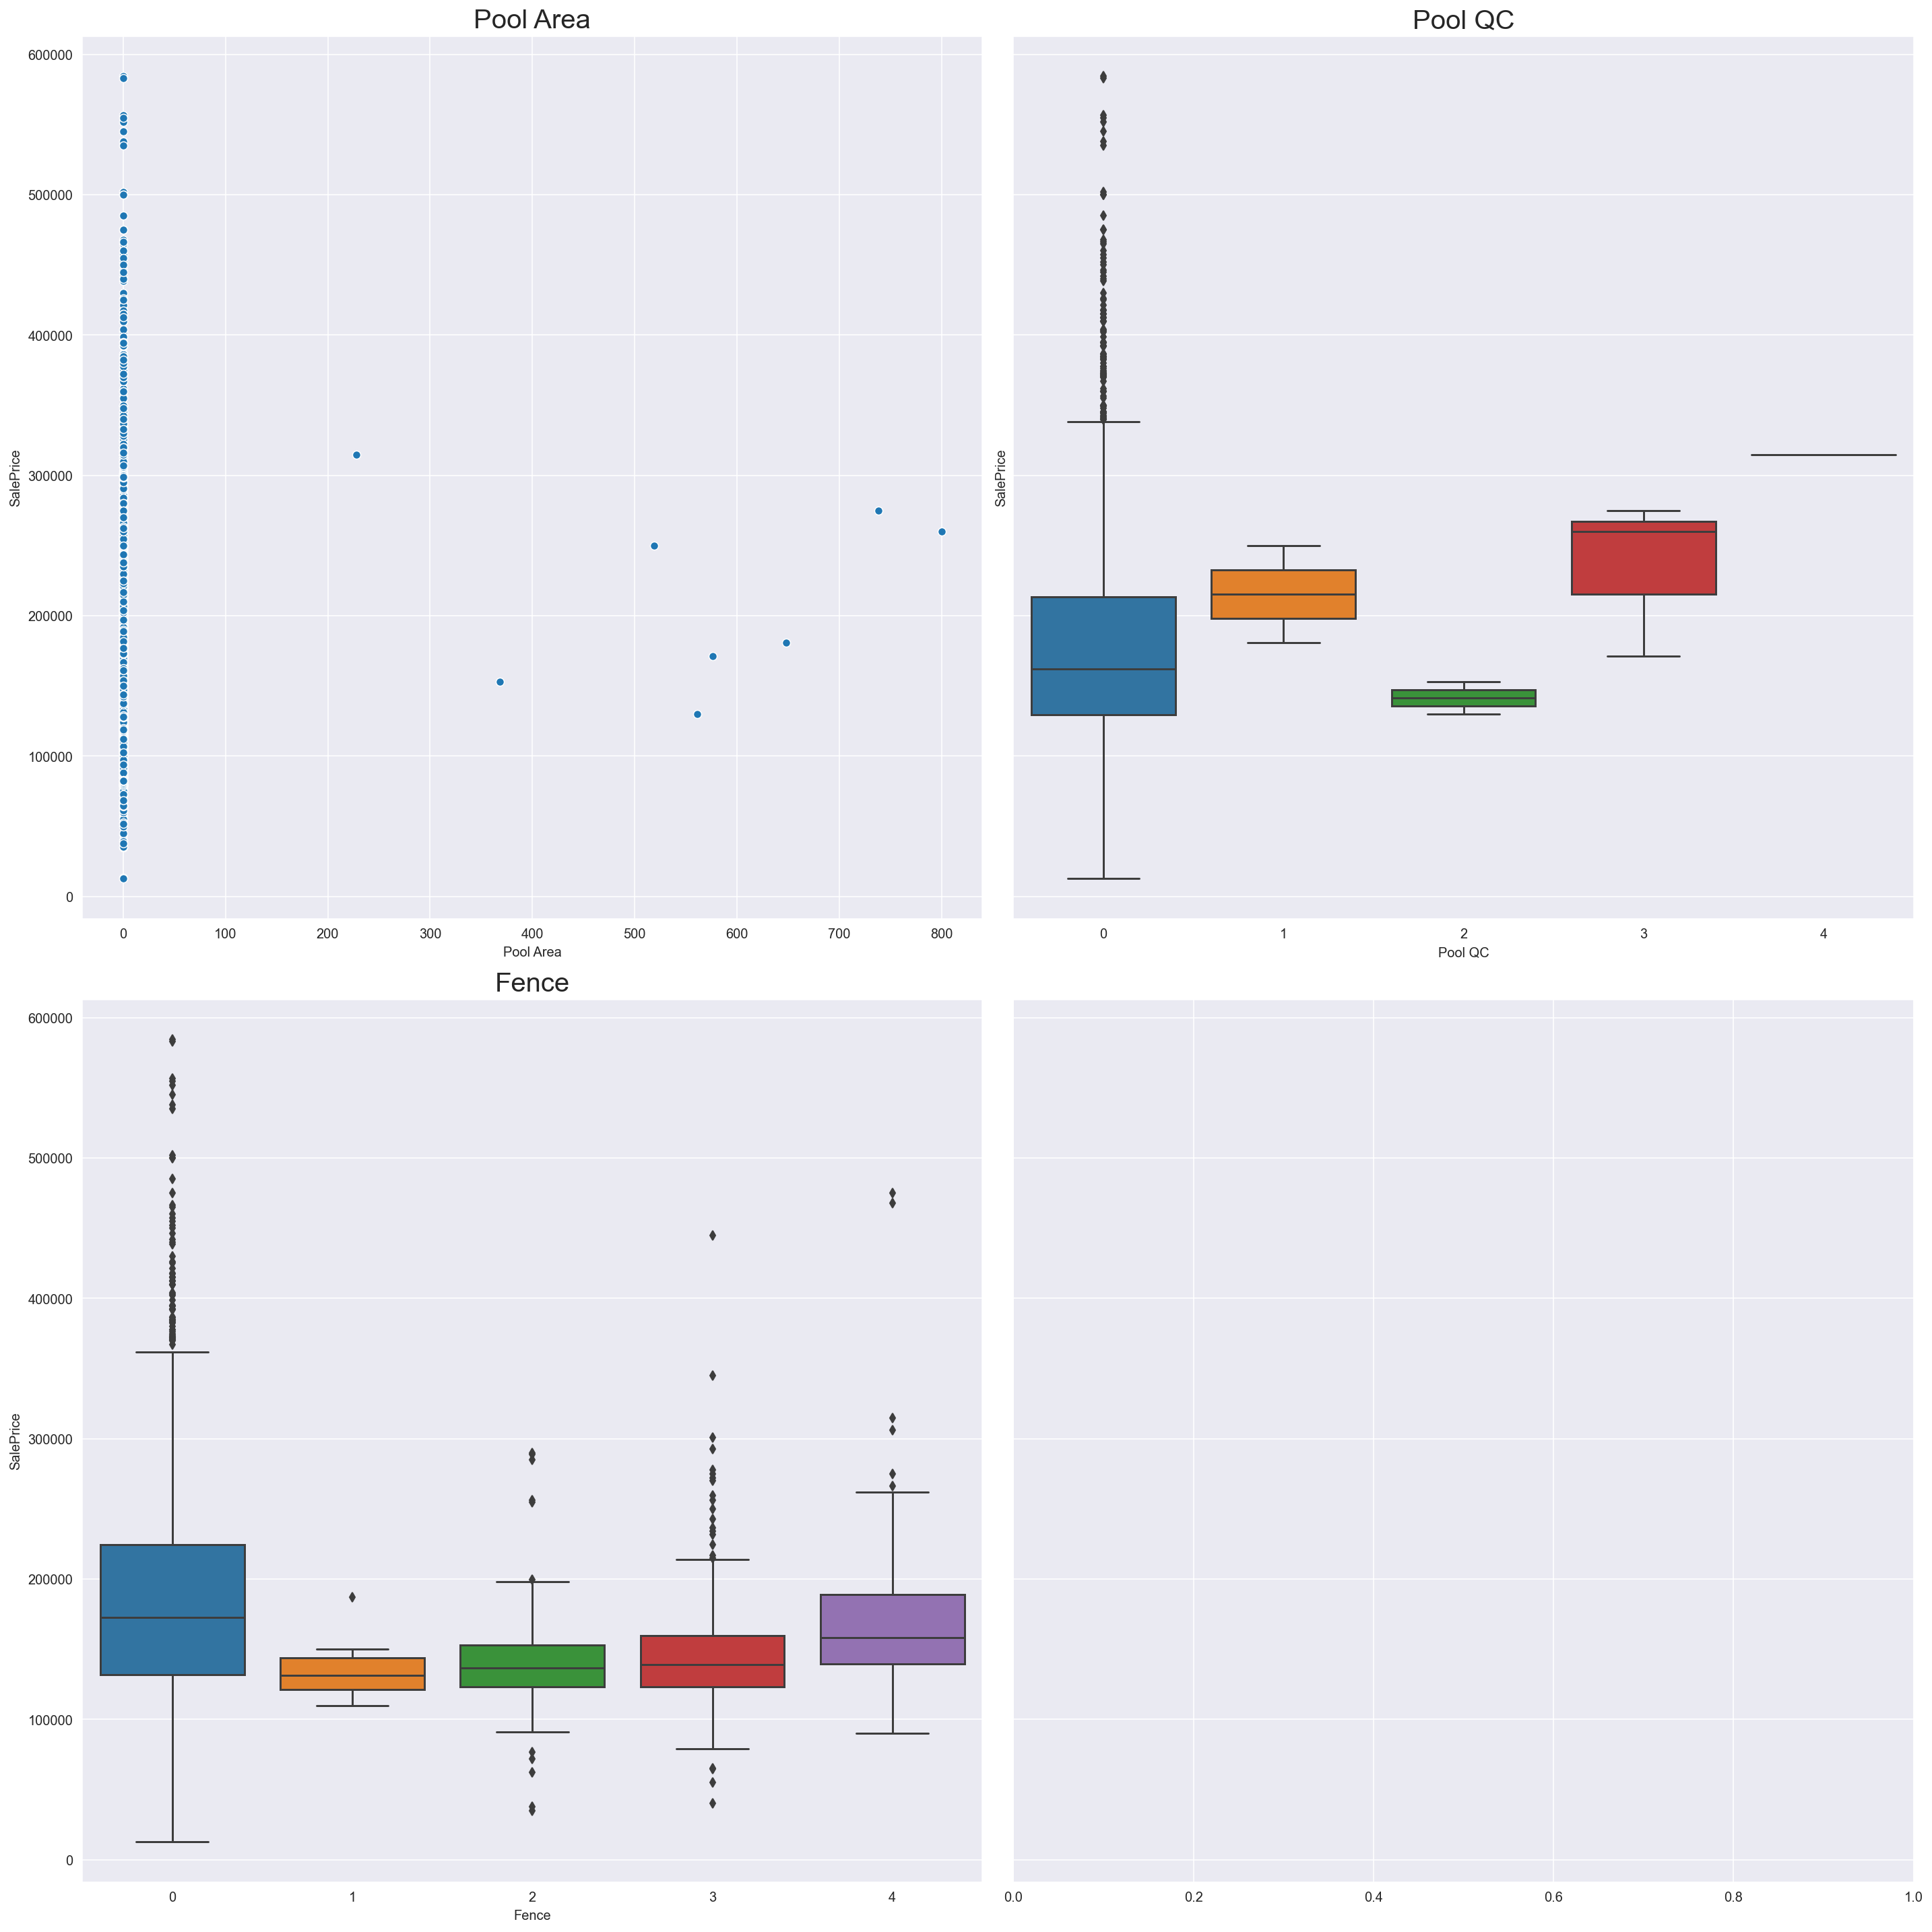

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20), sharey=True)
ax = ax.ravel()

sns.scatterplot(housing['Pool Area'], housing['SalePrice'],ax = ax[0])
ax[0].set_title('Pool Area',size=20)
fig.tight_layout(pad=1.0)

sns.boxplot(housing['Pool QC'], housing['SalePrice'],ax = ax[1])
ax[1].set_title('Pool QC',size=20)
fig.tight_layout(pad=1.0)

sns.boxplot(housing['Fence'], housing['SalePrice'],ax = ax[2])
ax[2].set_title('Fence',size=20)
fig.tight_layout(pad=1.0)

- Swimming pool is not a significant determinant of price.
- The better the privacy, the higher the price too. However, no fencing could also fetch high prices.

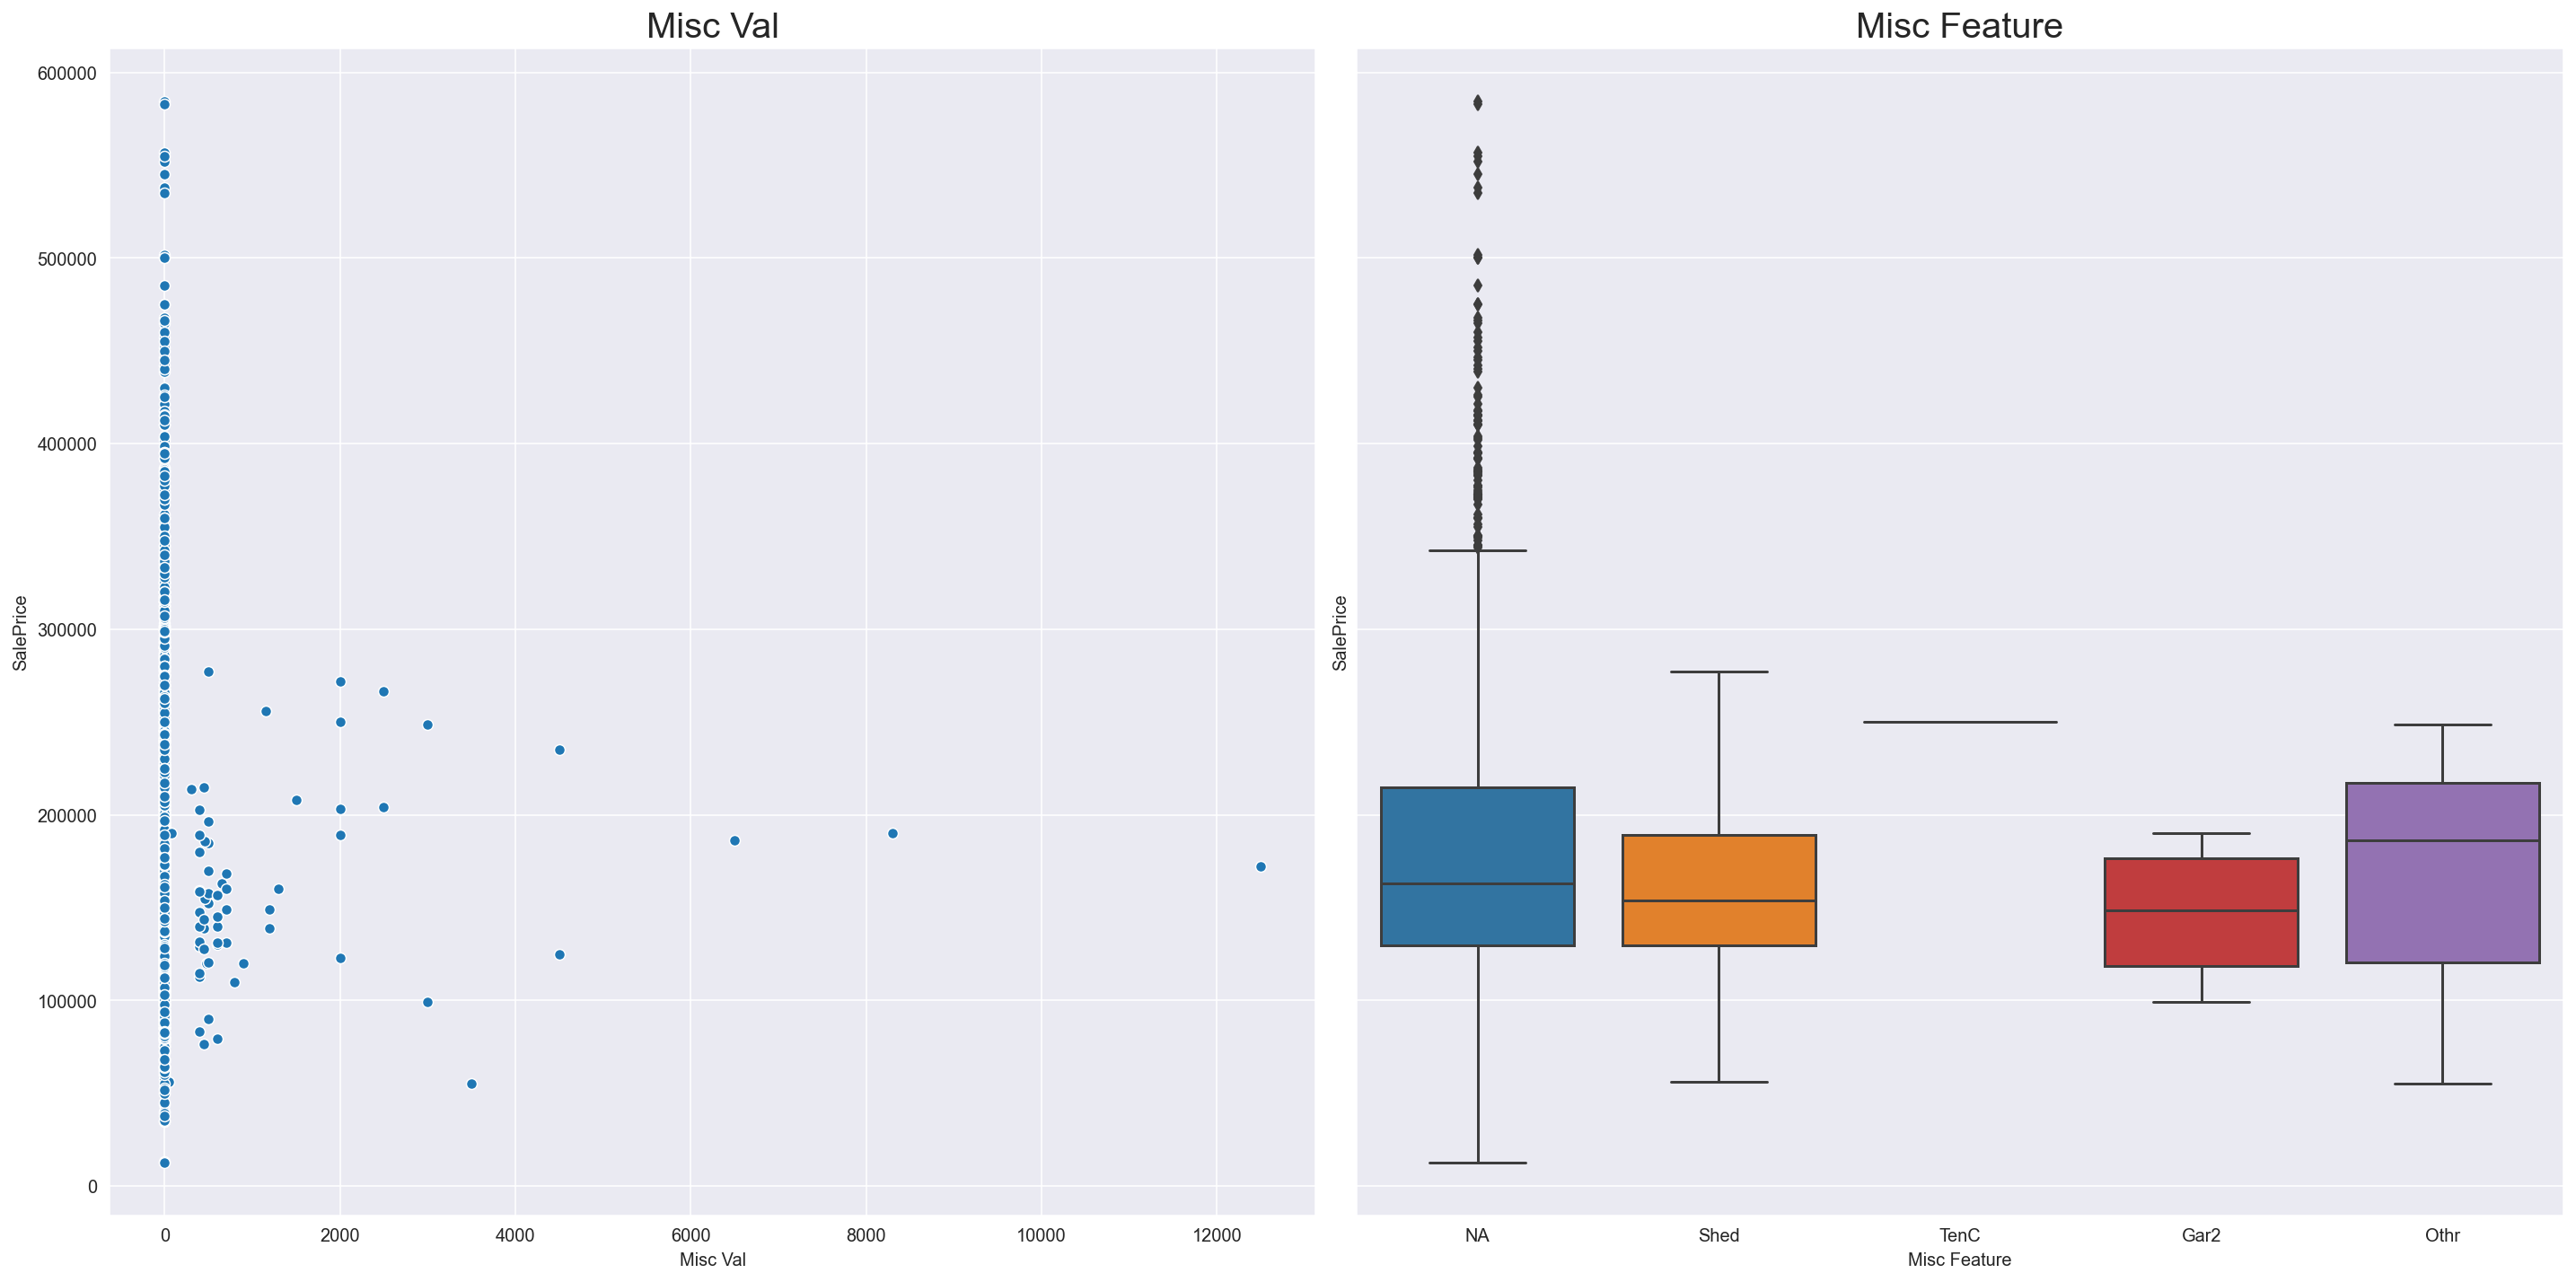

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()

sns.scatterplot(housing['Misc Val'], housing['SalePrice'],ax = ax[0])
ax[0].set_title('Misc Val',size=20)
fig.tight_layout(pad=1.0)

sns.boxplot(housing['Misc Feature'], housing['SalePrice'],ax = ax[1])
ax[1].set_title('Misc Feature',size=20)
fig.tight_layout(pad=1.0)

- The more expensive the Misc item, the higher price it could fetch. However, it also depends on what the item is.

**Sale Condition vs Sale Price**

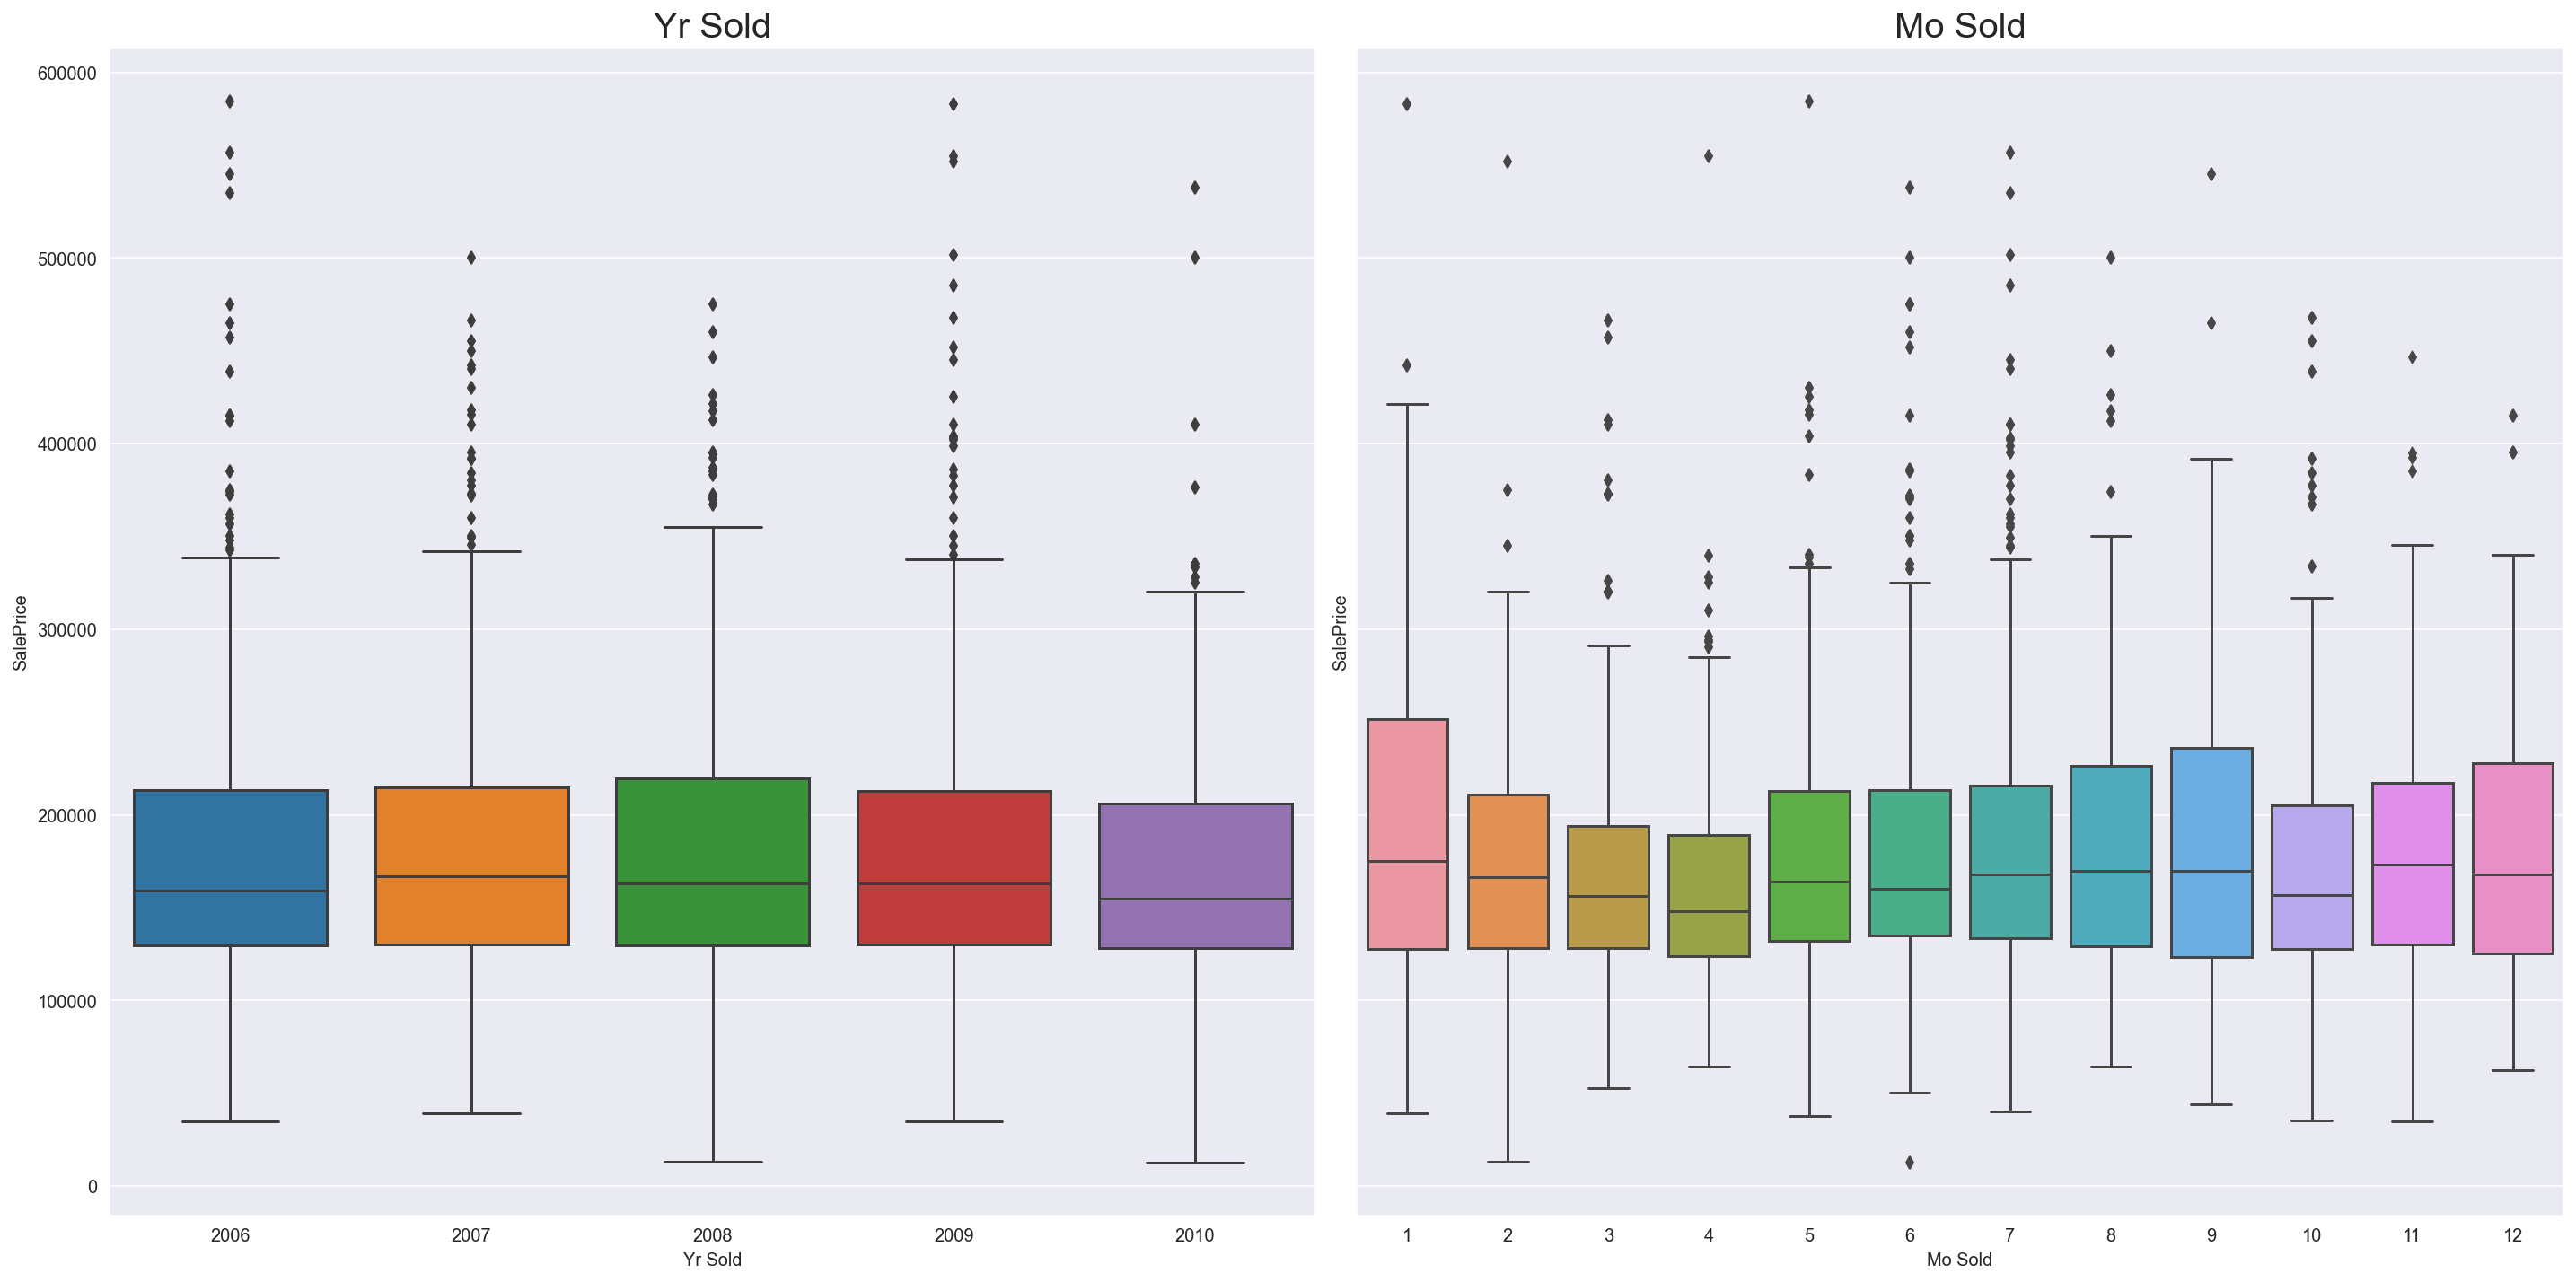

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)
ax = ax.ravel()

sns.boxplot(housing['Yr Sold'], housing['SalePrice'],ax = ax[0])
ax[0].set_title('Yr Sold',size=20)
fig.tight_layout(pad=1.0)

sns.boxplot(housing['Mo Sold'], housing['SalePrice'],ax = ax[1])
ax[1].set_title('Mo Sold',size=20)
fig.tight_layout(pad=1.0)

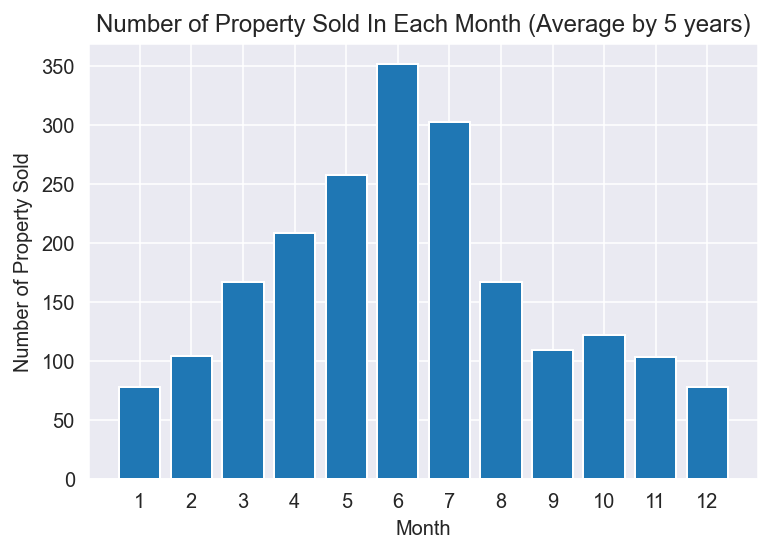

In [167]:
plt.bar(housing.groupby(by= 'Mo Sold')['SalePrice'].count().index,housing.groupby(by= 'Mo Sold')['SalePrice'].count())
plt.title('Number of Property Sold In Each Month (Average by 5 years)')
plt.xlabel("Month")
plt.ylabel("Number of Property Sold")
plt.xticks(housing.groupby(by= 'Mo Sold')['SalePrice'].count().index);

- It seems that the year it was sold does not affect the sale price. Perhaps we could explore the age during feature engineering
- There are some months with higher sale volume than others, for example, June, July and May has the top 3 highest sales volume respectively.

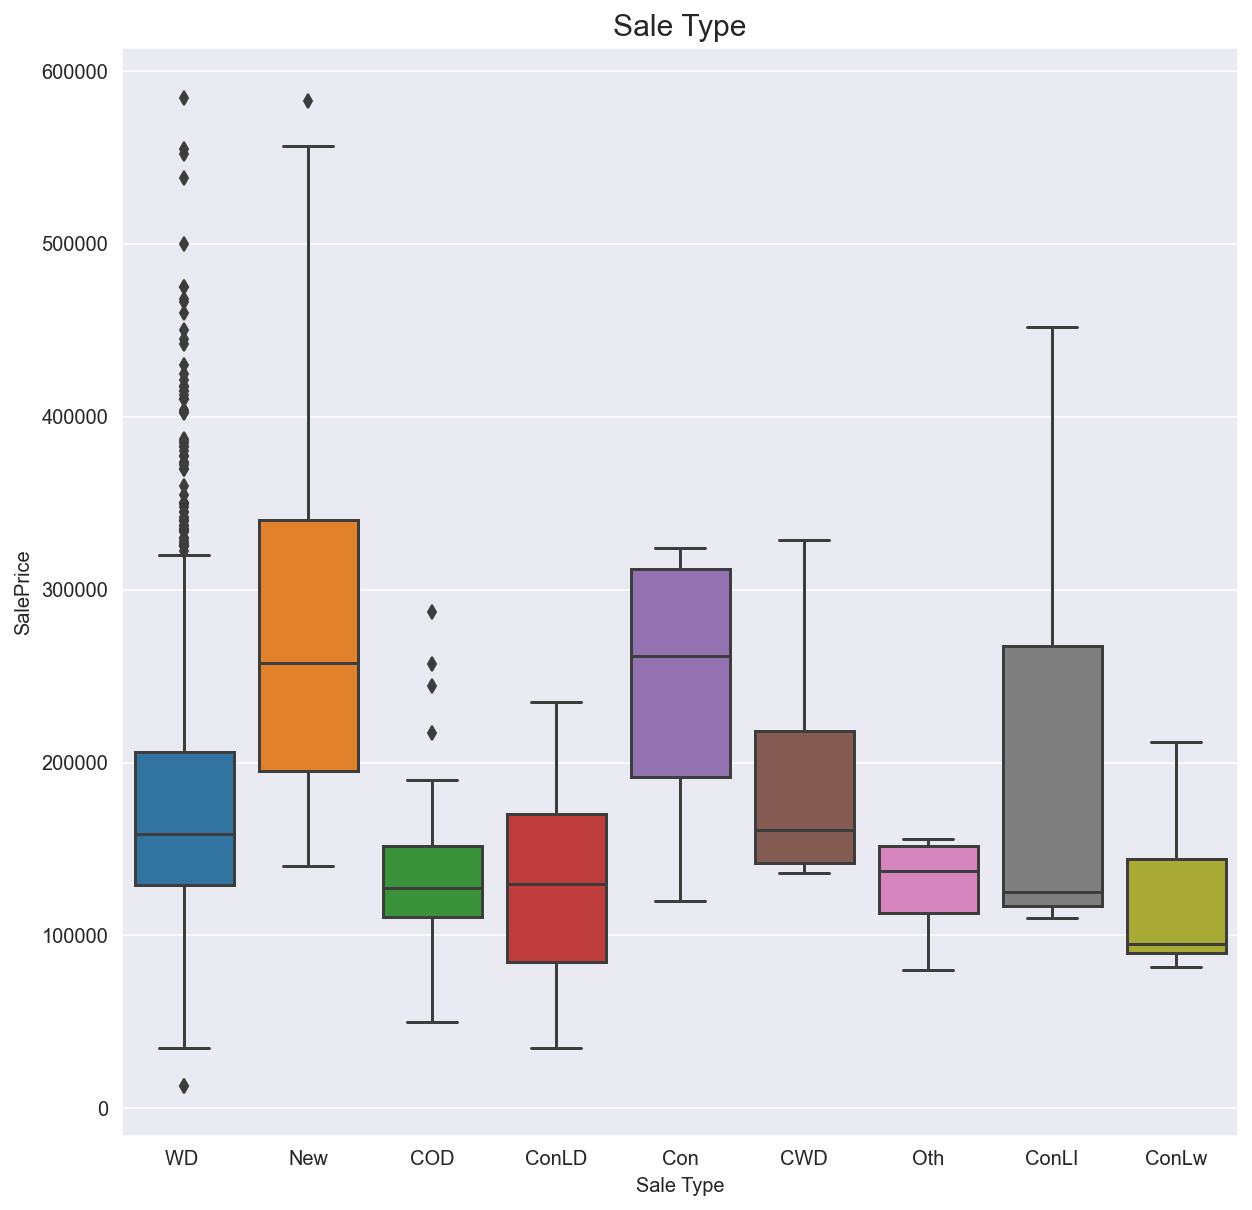

In [76]:
plt.figure(figsize=(10,10))
sns.boxplot(housing['Sale Type'], housing['SalePrice'])
plt.title('Sale Type',size=15)
fig.tight_layout(pad=1.0)

Newly constructed houses, Contract with low interest and warranty deed (cash) had higher average and mininum sale prices.

**Comments On Dataset**

The dataset seems to be comprehensive enough to build a strong prediction model and to identify the strongest positive and negative correlation and coefficient. However, there are evidences of outliers and multicollinearity which needs to be addressed. This can be partly resolved through feature engineering as well.

## Data Preparation and Feature Engineering

**Get Dummy Variables**

In [77]:
housing = pd.get_dummies(housing, drop_first = True)

In [78]:
housing.head()

MS SubClass  Lot Frontage  Lot Area  Lot Shape  Utilities  Land Slope  \
0           60     48.137738     13517          1          4           1   
1           60     43.000000     11492          1          4           1   
2           20     68.000000      7922          0          4           1   
3           60     73.000000      9802          0          4           1   
4           50     82.000000     14235          1          4           1   

   Overall Qual  Overall Cond  Year Built  Year Remod/Add  ...  \
0             6             8        1976            2005  ...   
1             7             5        1996            1997  ...   
2             5             7        1953            2007  ...   
3             5             5        2006            2007  ...   
4             6             8        1900            1993  ...   

   Misc Feature_Shed  Misc Feature_TenC  Sale Type_CWD  Sale Type_Con  \
0                  0                  0              0              0   
1                  0                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
0                0                0                0              0   
1                0                0                0              0   
2                0                0                0              0   
3                0                0                0              0   
4                0                0                0              0   

   Sale Type_Oth  Sale Type_WD   
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 195 columns]

**Create New Variables and Interactions**

`total_sf` is obtained by adding the total above grade living space and the total basement squarefeet. This will get rid of the zeroes in `Total Bsmt SF` as well.

In [79]:
housing['total_sf'] = housing['Total Bsmt SF'] + housing['Gr Liv Area']
housing['total_sf']

0       2204.0
1       3035.0
2       2114.0
3       1828.0
4       2121.0
         ...  
2046    3612.0
2047    1722.0
2048    2809.0
2049    2400.0
2050    2798.0
Name: total_sf, Length: 2046, dtype: float64

`property_age` is determines how old the property was.

In [80]:
housing['property_age'] = housing['Yr Sold'] - housing['Year Built']

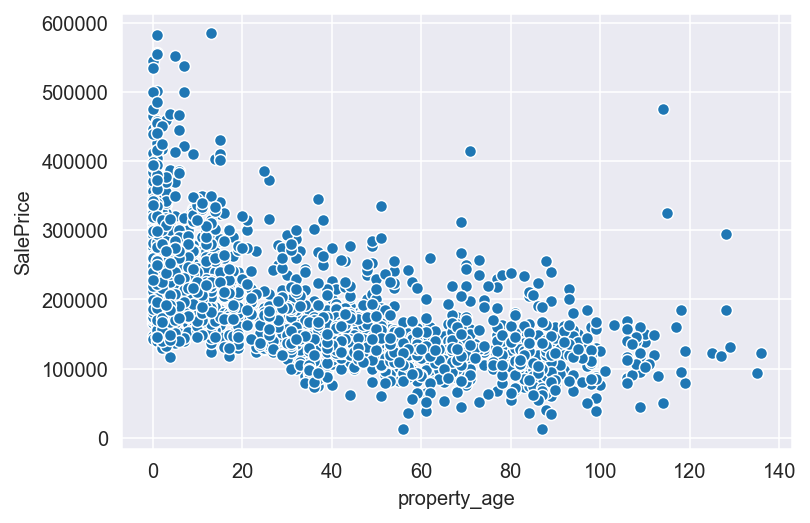

In [81]:
sns.scatterplot(housing['property_age'], housing['SalePrice'])

In [82]:
housing.corr()['SalePrice'].sort_values(ascending=False)['property_age']

-0.5746773828978933

- The younger the property, the higher the price. A negative correlation exists.

`garage_int` is the interaction between various related variables

In [83]:
# identifying collinear variables
housing.corr()['Garage Area'].sort_values(ascending=False).head(10)

Garage Area      1.000000
Garage Cars      0.897404
SalePrice        0.654236
total_sf         0.567031
Garage Qual      0.562970
Garage Yr Blt    0.560067
Overall Qual     0.558136
Garage Cond      0.548263
Garage Finish    0.514931
Exter Qual       0.506624
Name: Garage Area, dtype: float64

In [84]:
# interaction between these 3 variables. Garage quality was not chosen to maintain its own correlation

housing['garage_int'] = housing['Garage Area']*housing['Garage Cond']*housing['Garage Finish']

**Preparing the Model**

In [85]:
# highest negative correlation
housing.corr()['SalePrice'].sort_values(ascending=True)[0:10]

property_age           -0.574677
Mas Vnr Type_None      -0.411491
Garage Type_Detchd     -0.372325
Foundation_CBlock      -0.356283
MS Zoning_RM           -0.283695
Roof Style_Gable       -0.243938
Garage Type_NA         -0.232822
Neighborhood_OldTown   -0.209751
Sale Type_WD           -0.203768
Exterior 1st_Wd Sdng   -0.192354
Name: SalePrice, dtype: float64

In [86]:
# highest positive correlation
housing.corr()['SalePrice'].sort_values(ascending=False)[1:10]

total_sf         0.825316
Overall Qual     0.805649
garage_int       0.738278
Gr Liv Area      0.721374
Exter Qual       0.713343
Kitchen Qual     0.697051
Total Bsmt SF    0.660674
Garage Area      0.654236
Garage Cars      0.649702
Name: SalePrice, dtype: float64

In [87]:
# 78 columns with the highest positive correlation and 30 columns which have the highest negative correlation as features.
features = housing.corr()['SalePrice'].sort_values(ascending=False)[1:80].index.append(housing.corr()['SalePrice'].sort_values(ascending=True)[0:35].index)

In [88]:
# dropping numerical features which are highly collinear

features = features.drop(['1st Flr SF','2nd Flr SF', 'Garage Area' ,'Garage Cars',
                          'Garage Cond', 'Garage Finish', 'Total Bsmt SF','BsmtFin SF 1', 'Gr Liv Area','Year Built'])

Based on first Lasso regression, the features below shows the coefs which are irrelevant to the model. Hence, these features would also be dropped
![](./assets/Unimportant%20Coef.PNG)

In [89]:
# dropping features which are irrelevant for the model
features = features.drop(['Bsmt Qual',
 'Garage Type_Attchd',
 'Exterior 1st_VinylSd',
 'Exterior 2nd_VinylSd',
 'Garage Qual',
 'Central Air_Y',
 'Garage Yr Blt',
 'Mas Vnr Type_BrkFace',
 'Electrical',
 'MS Zoning_RL',
 'Exterior 2nd_CmentBd',
 'MS Zoning_FV',
 'Condition 2_PosN',
 'Neighborhood_CollgCr',
 'Land Slope',
 'Foundation_CBlock',
 'Roof Style_Gable',
 'Neighborhood_IDOTRR',
 'Exterior 2nd_MetalSd',
 'Enclosed Porch',
 'Neighborhood_MeadowV',
 'Exterior 2nd_HdBoard',
 'Land Contour_Lvl'])

## Model Preparation and Selection

In [90]:
# create features and target vector

X = housing[features]
y = housing['SalePrice']

In [91]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state = 42)

In [92]:
# scale model for Lasso, Ridge and Elastic Net

ss = StandardScaler()

# fit
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [93]:
# instantiate

lr = LinearRegression()
ridge = RidgeCV(alphas = np.linspace(10,50,200))
lasso = LassoCV(n_alphas=200)
enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas=200)

In [94]:
# Comparing the Models with Cross Validation

lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.9102406728279027

In [95]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv= 5)
ridge_scores.mean()

0.9103822758810646

In [96]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv= 5)
lasso_scores.mean()

0.9109037630601075

In [97]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv =5)
enet_scores.mean()

0.9109037630601075

## Model Fitting and Evaluation

Based on the above score, Lasso has the best score. However, we will compare `Linear Regression`, `Ridge` and `Lasso` based on regression metrics Median Absolute Error and R2 Score. `ElasticNet` will not be evaluated below since it has the same cross-validation-score as lasso.

**LINEAR REGRESSION**

In [98]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [99]:
lr.score(X_train_ss, y_train)

0.9248777168432045

In [100]:
# prediction based on scaled X_test
ypred_lr = lr.predict(X_test_ss)

In [101]:
lr_rmse =  np.sqrt(mean_squared_error(y_test, ypred_lr))
lr_mae = median_absolute_error(y_test, ypred_lr)
lr_r2 = r2_score(y_test, ypred_lr)
print(f"Linear Regression has an R2 score of {lr_r2}, Median Absolute Error score of {lr_mae} and a Root Mean Squared Error of {lr_rmse}")

Linear Regression has an R2 score of 0.9004621826185661, Median Absolute Error score of 13165.232306274862 and a Root Mean Squared Error of 24891.55473919708


**RIDGE**

In [102]:
ridge.fit(X_train_ss, y_train)

RidgeCV(alphas=array([10.        , 10.20100503, 10.40201005, 10.60301508, 10.8040201 ,
       11.00502513, 11.20603015, 11.40703518, 11.6080402 , 11.80904523,
       12.01005025, 12.21105528, 12.4120603 , 12.61306533, 12.81407035,
       13.01507538, 13.2160804 , 13.41708543, 13.61809045, 13.81909548,
       14.0201005 , 14.22110553, 14.42211055, 14.62311558, 14.8241206 ,
       15.02512563, 15.22613065, 15.42713568, 15.628...
       43.16582915, 43.36683417, 43.5678392 , 43.76884422, 43.96984925,
       44.17085427, 44.3718593 , 44.57286432, 44.77386935, 44.97487437,
       45.1758794 , 45.37688442, 45.57788945, 45.77889447, 45.9798995 ,
       46.18090452, 46.38190955, 46.58291457, 46.7839196 , 46.98492462,
       47.18592965, 47.38693467, 47.5879397 , 47.78894472, 47.98994975,
       48.19095477, 48.3919598 , 48.59296482, 48.79396985, 48.99497487,
       49.1959799 , 49.39698492, 49.59798995, 49.79899497, 50.        ]))

In [103]:
ridge.score(X_train_ss, y_train)

0.9247545997525733

In [104]:
ridge.alpha_

16.633165829145728

In [105]:
# optimise alpha
ridge_model = Ridge(alpha=ridge.alpha_)

In [106]:
ridge_model.fit(X_train_ss, y_train)

Ridge(alpha=16.633165829145728)

In [107]:
# prediction based on scaled X_test
ypred_ridge = ridge_model.predict(X_test_ss)

In [108]:
ridge_rmse =  np.sqrt(mean_squared_error(y_test, ypred_ridge))
ridge_mae = median_absolute_error(y_test, ypred_ridge)
ridge_r2 = r2_score(y_test, ypred_ridge)
print(f"Ridge has an R2 score of {ridge_r2}, a Median Absolute Error score of {ridge_mae} and a Root Mean Squared Error of {ridge_rmse}")

Ridge has an R2 score of 0.9002339550333558, a Median Absolute Error score of 12874.979822901078 and a Root Mean Squared Error of 24920.074988531658


**LASSO**

In [109]:
lasso.fit(X_train_ss, y_train)

LassoCV(n_alphas=200)

In [110]:
lasso.score(X_train_ss, y_train)

0.9245090793945082

In [111]:
lasso.alpha_

138.1039635830815

In [112]:
# optimise alpha for lasso

lasso_model = Lasso(alpha=lasso.alpha_)

In [113]:
lasso_model.fit(X_train_ss, y_train)

Lasso(alpha=138.1039635830815)

In [114]:
# prediction based on scaled X_test
ypred_lasso = lasso_model.predict(X_test_ss)

In [115]:
lasso_rmse =  np.sqrt(mean_squared_error(y_test, ypred_lasso))
lasso_mae = median_absolute_error(y_test, ypred_lasso)
lasso_r2 = r2_score(y_test, ypred_lasso)
print(f"Lasso has an R2 score of {lasso_r2}, a Median Absolute Error score of {lasso_mae} and a Root Mean Squared Error of {lasso_rmse}")

Lasso has an R2 score of 0.9005544993047828, a Median Absolute Error score of 13040.961085760217 and a Root Mean Squared Error of 24880.009183165574


**Evaluation**

The Lasso Model will be the choice of production model based on the metrics and the goals of this project. Based on R2 score, they all did equally well. However, Lasso returned the lowest RMSE, indicating its predictive strength. Even though the Median Absolute Error is higher than ridge. Despite having a slightly higher Median Squared Error, the feature selection which comes with it is more important for this purpose - to find the determinants for sales price. Lasso allows us to quickly which variables have strong influence over the sales price, filtering out insignificant ones quickly.

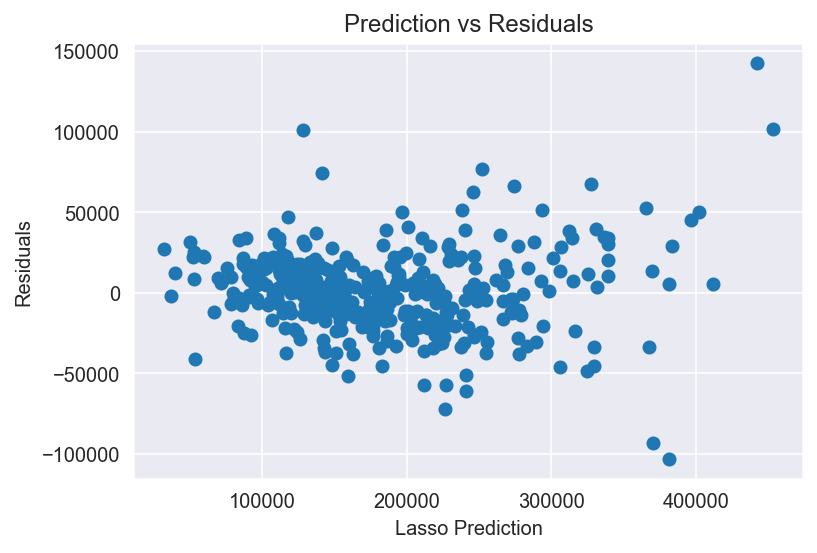

In [116]:
residuals = y_test - ypred_lasso
plt.scatter(ypred_lasso, residuals)
plt.title('Prediction vs Residuals')
plt.xlabel('Lasso Prediction')
plt.ylabel('Residuals');

Predictions mostly give low residuals. There are a few predictions which quite off.

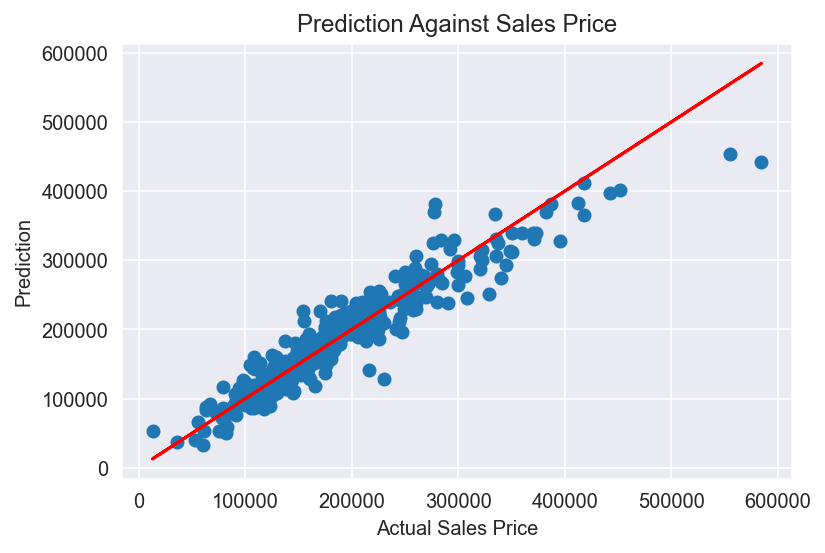

In [117]:
plt.scatter(y_test, ypred_lasso)
plt.title('Prediction Against Sales Price')
plt.ylabel('Prediction')
plt.xlabel('Actual Sales Price')
plt.plot(y_test, y_test, c='r');

Predictions and actual sales price converging into a line. It means that most predictions were quite accurate.

## Implementing to Test Data

**Data Import and Cleaning**

In [118]:
housing_test = pd.read_csv('datasets/test.csv')

In [119]:
housing_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [120]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [121]:
# This should be an error, as he does not have a garage.
housing_test.at[865, 'Garage Type'] = np.nan

In [122]:
# Applying the same treatment to the training data

# Alley
housing_test['Alley'].fillna('NA', inplace = True)

# Mas Vnr Type
# Mas Vnr Area
housing_test['Mas Vnr Type'].fillna(value = 'None', inplace=True)
housing_test['Mas Vnr Area'].fillna(value = 0.0, inplace= True)

# Electrical by mode
housing_test["Electrical"].fillna("SBrkr",inplace=True)

# Bsmt Qual
# Bsmt Cond
# Bsmt Exposure
# BsmtFin Type 1
# BsmtFin Type 2
housing_test['Bsmt Qual'].fillna("NA",inplace=True)
housing_test['Bsmt Cond'].fillna("NA",inplace=True)
housing_test['Bsmt Exposure'].fillna("NA",inplace=True)
housing_test["BsmtFin Type 1"].fillna("NA",inplace=True)
housing_test["BsmtFin Type 2"].fillna("NA",inplace=True)

# Fireplace Qu
housing_test['Fireplace Qu'].fillna('NA', inplace = True)

# Garage Type
# Garage Yr Blt
# Garage Finish
# Garage Qual
# Garage Cond
housing_test["Garage Type"].fillna('NA',inplace=True)
housing_test['Garage Yr Blt'].fillna(0,inplace=True)
housing_test['Garage Finish'].fillna('NA',inplace=True)
housing_test['Garage Qual'].fillna('NA',inplace=True)
housing_test['Garage Cond'].fillna('NA',inplace=True)

# Pool QC
housing_test['Pool QC'].fillna('NA', inplace = True)

# Fence
housing_test['Fence'].fillna('NA', inplace = True)

# Misc Feature
housing_test['Misc Feature'].fillna('NA',inplace=True)

*Lot Frontage*

In [123]:
# imputing lot frontage, using the same model as the training data
frontage_test_df = pd.DataFrame({"Lot Frontage" : housing_test['Lot Frontage'], "Lot Area" : housing_test['Lot Area'],
                            'Lot Config' : housing_test['Lot Config']})

In [124]:
frontage_test_dummy = pd.get_dummies(data= frontage_test_df, drop_first=True)

In [125]:
frontage_test_dummy.shape

(879, 6)

In [126]:
X = frontage_test_dummy[frontage_test_dummy['Lot Frontage'].isnull()].drop(columns='Lot Frontage')

In [127]:
y_pred = lr_frontage.predict(X)

In [128]:
# get a list of frontage including predictions

lot_frontage = []
n = 0
for i in frontage_test_df['Lot Frontage']:
    if i >= 0 :
        lot_frontage.append(i)
    else:
        lot_frontage.append(y_pred[n])
        n = n + 1

In [129]:
# update the series

housing_test['Lot Frontage'] = lot_frontage

**Encoding**

In [130]:
# applying same treatment as training data, converting ordinal variables into numerical

housing_test.replace({'Lot Shape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'Land Slope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'Exter Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Exter Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Bsmt Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Bsmt Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Bsmt Exposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
                'BsmtFin Type 1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
                'BsmtFin Type 2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0},
                'Heating QC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'Kitchen Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'Fireplace Qu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Garage Finish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' : 0},
                'Garage Qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Garage Cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0},
                'Paved Drive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'Pool QC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'NA' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'NA' : 0},
                }, inplace=True)

In [131]:
# get dummy all dummy variables, so drop_first is false

housing_test = pd.get_dummies(housing_test, drop_first = False)

In [132]:
# checking if the dummy variables are successful
housing_test.columns[-50:]

Index(['Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd', 'Exterior 2nd_HdBoard',
       'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Other',
       'Exterior 2nd_Plywood', 'Exterior 2nd_PreCast', 'Exterior 2nd_Stucco',
       'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng',
       'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_CBlock',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_Floor', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Central Air_N', 'Central Air_Y',
       'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NA', 'Misc Feature_Gar2', 'Misc Feature_NA',
       'Misc Feature_Othr', 'Misc Feature_Shed', 'Sale Type_COD',
       'Sale Type_CWD', 'Sale Type_Con', 

**Feature Engineering**

In [133]:
# applying same feature engineering as training data

housing_test['total_sf'] = housing_test['Total Bsmt SF'] + housing_test['Gr Liv Area']
housing_test['garage_int'] = housing_test['Garage Area']*housing_test['Garage Cond']*housing_test['Garage Finish']
housing_test['property_age'] = housing_test['Yr Sold'] - housing_test['Year Built']

In [134]:
# setting features as X

X = housing_test[features]

In [135]:
# Scale it to prevent overfitting
ss_testing = StandardScaler()

# fit
ss_testing.fit(X)

# transform
X_testing_ss = ss_testing.transform(X)

**Prediction**

In [136]:
# prediction

salesprice_predict = lasso_model.predict(X_testing_ss)

In [137]:
# creating a separate dataframe of predictions and saving it to CSV.

output = pd.DataFrame({'Id':housing_test['Id'], 'SalePrice': salesprice_predict})
output

Id      SalePrice
0    2658  133601.063273
1    2718  165448.269084
2    2414  216080.149076
3    1989  110304.532095
4     625  177300.182328
..    ...            ...
874  1662  199402.602587
875  1234  220456.117281
876  1373  132016.130819
877  1672  109405.266892
878  1939  119658.784485

[879 rows x 2 columns]

In [138]:
output.to_csv("output.csv", index = False)

## Conclusions and Recommendations

In general, property prices are highly determined by the condition of the house, the quality of the materials and the area of the property. These generally influences the number of rooms, the size of the garage and other factors. Below are some other findings and recommendations to help sellers increase the value of their property based on the model.

**Features that Increases Value**

In [139]:
coef = lasso_model.coef_

In [140]:
# Create a dataframe of to identify how much the feature increase or decrease the value of the home
coef_list = pd.DataFrame(features)
coef_list['coef'] = coef

In [141]:
coef_list.sort_values(by = 'coef', ascending = False).head(10)

0          coef
0               total_sf  33653.808136
1           Overall Qual  11038.131552
13  Neighborhood_NridgHt   7799.831415
28  Neighborhood_StoneBr   5973.547253
2             garage_int   5456.664880
78          Overall Cond   5169.476984
10          Mas Vnr Area   5161.602393
3             Exter Qual   4949.175296
22              Lot Area   4924.965053
4           Kitchen Qual   4843.429372

`#1` Based on the model, the total area of basement and above grade (including 2nd floor) increases the value of the home the largest.

`#2` The quality of the home in general also affect the prices. For example, the overall quality, the kitchen quality and the functionality of the home

`#3` Being in the neighbourhood of Northridge Heights and Stone Brook also yield high sale prices

`#4` New sales tend to fetch higher prices

**Features that Decreases Value**

In [142]:
coef_list.sort_values(by = 'coef', ascending = True).head(5)

0         coef
33       Bsmt Unf SF -8218.751758
54      property_age -6055.391025
49  Bldg Type_TwnhsE -4147.621116
29         Bsmt Cond -3079.518001
70     Kitchen AbvGr -2481.682188

`#1` Unfinished Basement hurts the value of the home the most.

`#2` Townhouse building types also decreases the value of the home.

`#3` The older the property, the less value it fetches.

**For Sellers: Ensure High Sale Prices**

Based on the predictive model, here are some concerete recommendations to ensure sellers get the optimal sale price (in order of priority and highest returns):

- Refurbish the house (including rooms and kitchens) to improve the quality and the materials of the house.
- Conduct restorative works to improve and maintain the condition of the house and the materials.
- Sell the house as soon as possible, remodel or renovate the home if the home is too old.
- Finish all unfinished areas as they would decrease the value of the home.
- Sell properties during the month of May, June and July, the high volume of sales indicates the higher probability of selling it.


**For Buyers: Good Investment Opportunities**

- Neighbourhoods in Northridge Heights and Stone Brook tend to have higher values. Consider buying a poorer condition home and then refurbishing it or expanding it.

- Avoid Townhouse building types as they hurt the value of houseprices. However, buyers can also consider buying up townhouses and then building a more valuable building type.

- Buy properties at the end of the year which has lower sale volume, lower demand would mean lower prices as well

**Suggestions for Next Steps**

The model may not generalise as well to other locations or state due to how specific the features were. If we are looking at predicting the sale price in another state, similar data should be collected.

However, if the goal is to predict sale prices with higher accuracy, more years of data could be used to train the model. Another way is to expand the model with Logistic Regression to predict the likelihood of a property being sold.  